In [173]:
# Heart Disease Prediction - Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('heart.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (918, 12)

First few rows:


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [174]:
# Basic dataset information
print("Dataset Info:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("\nDataset Statistics:")
print("=" * 50)
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dataset Statistics:


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [175]:
# Check for missing values
print("Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "=" * 50)
print("\nTarget Variable Distribution:")
print("=" * 50)
print(df['HeartDisease'].value_counts())
print(f"\nPercentage:")
print(df['HeartDisease'].value_counts(normalize=True) * 100)


Missing Values:
No missing values found!


Target Variable Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Percentage:
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


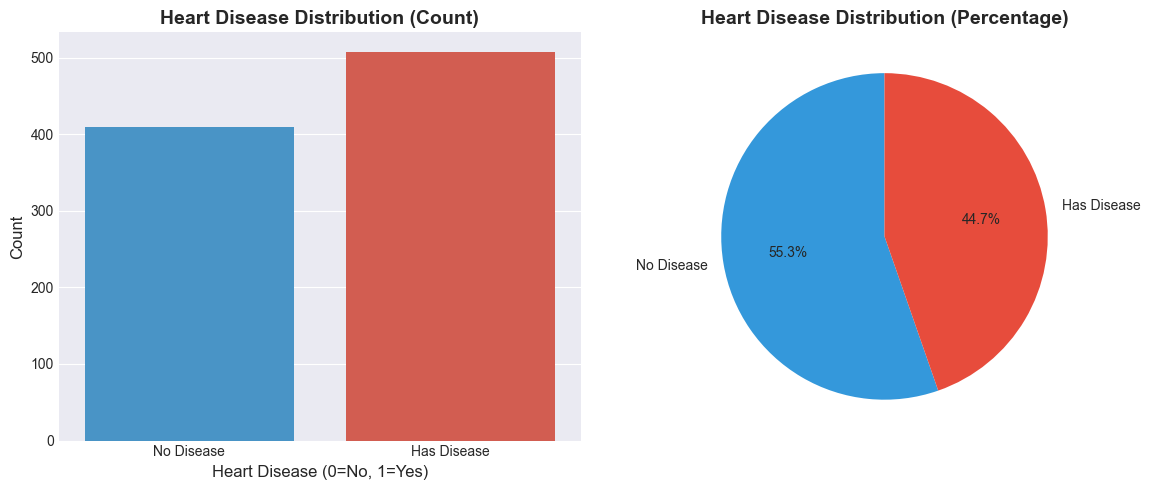

In [176]:
# Target variable distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(data=df, x='HeartDisease', ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Heart Disease Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Disease', 'Has Disease'])

# Pie chart
heart_disease_counts = df['HeartDisease'].value_counts()
axes[1].pie(heart_disease_counts.values, labels=['No Disease', 'Has Disease'], 
            autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c'])
axes[1].set_title('Heart Disease Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [177]:
# Examine categorical features
print("Categorical Features:")
print("=" * 50)
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print("-" * 30)


Categorical Features:

Sex:
Sex
M    725
F    193
Name: count, dtype: int64
------------------------------

ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
------------------------------

RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
------------------------------

ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
------------------------------

ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
------------------------------


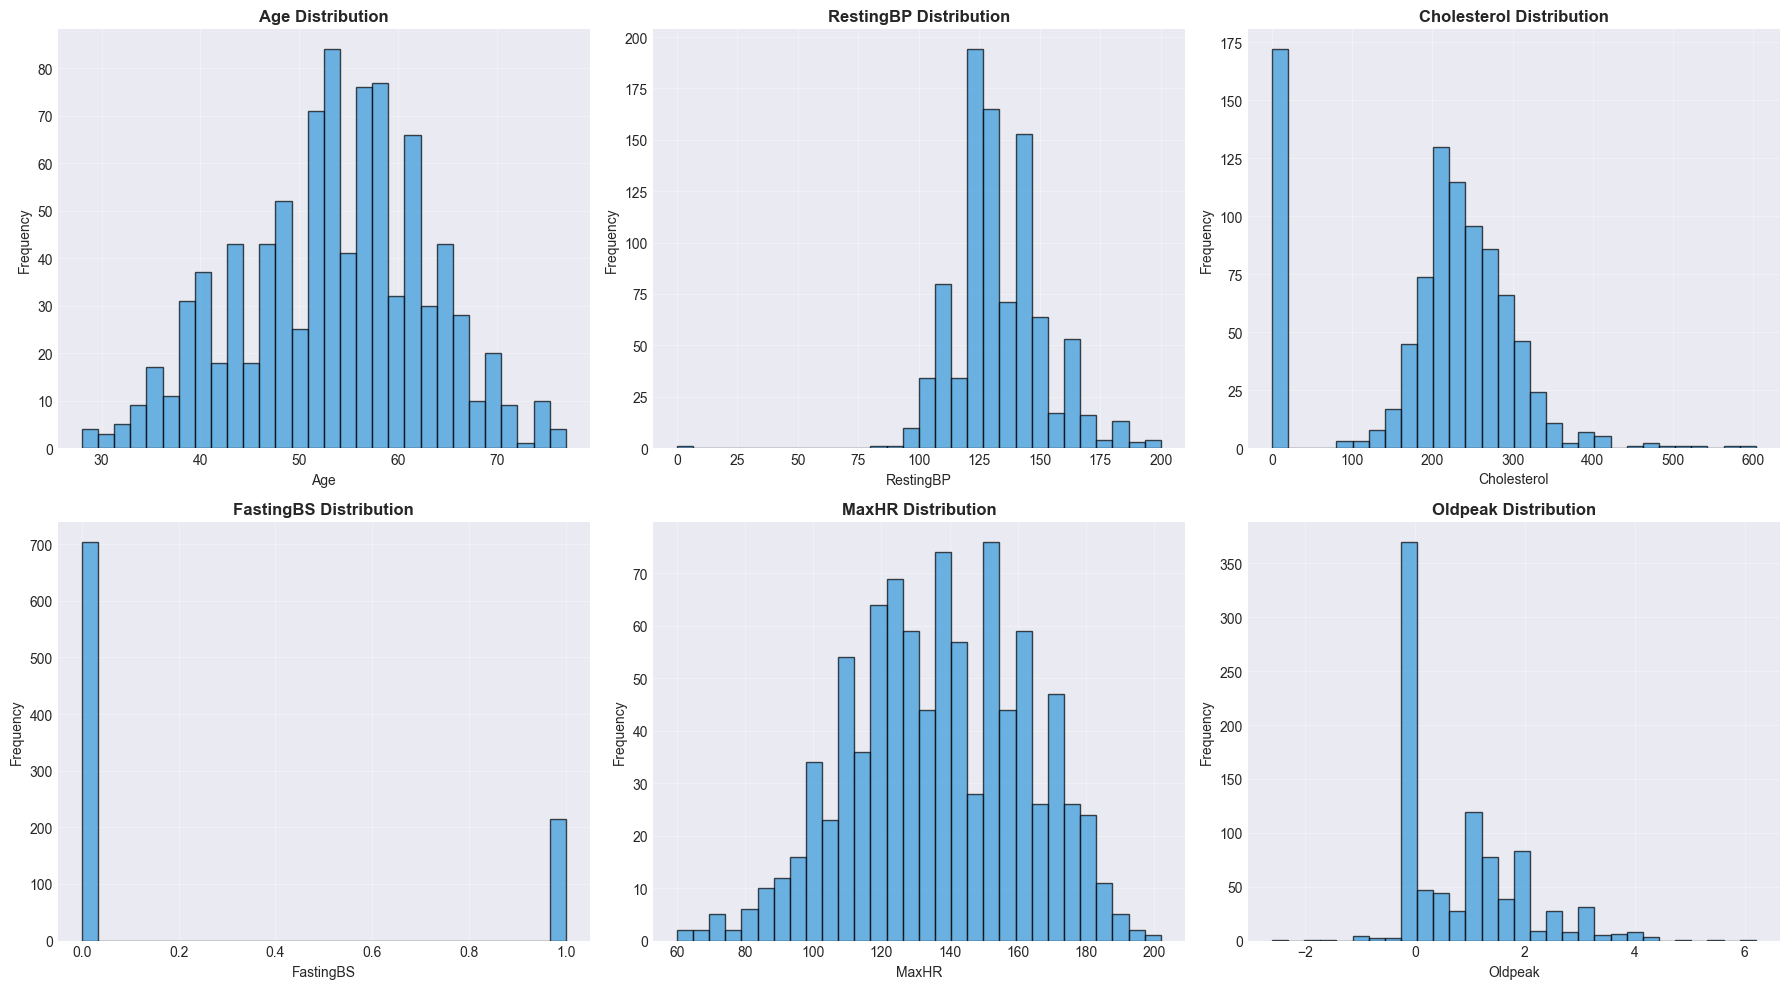

In [178]:
# Distribution of numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


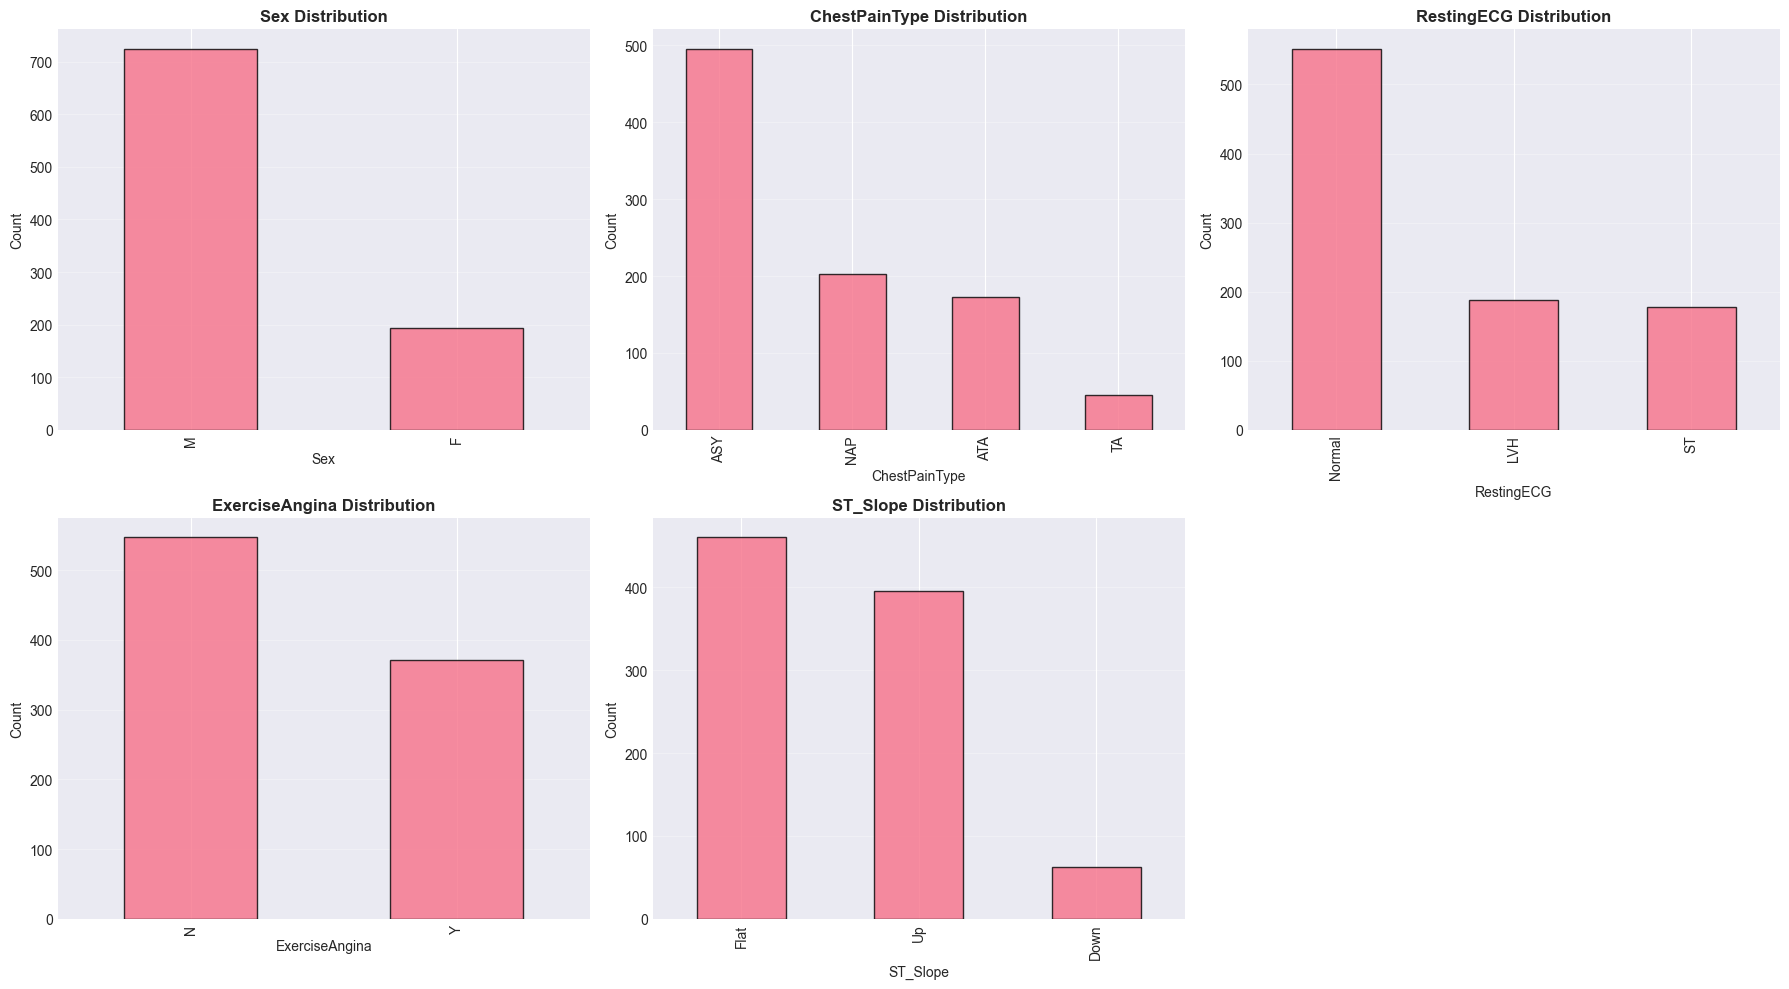

In [179]:
# Distribution of categorical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(
        kind='bar',
        ax=axes[i],
        edgecolor='black',
        alpha=0.8
    )
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

# Turn off unused subplot (2x3 grid but only 5 plots)
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

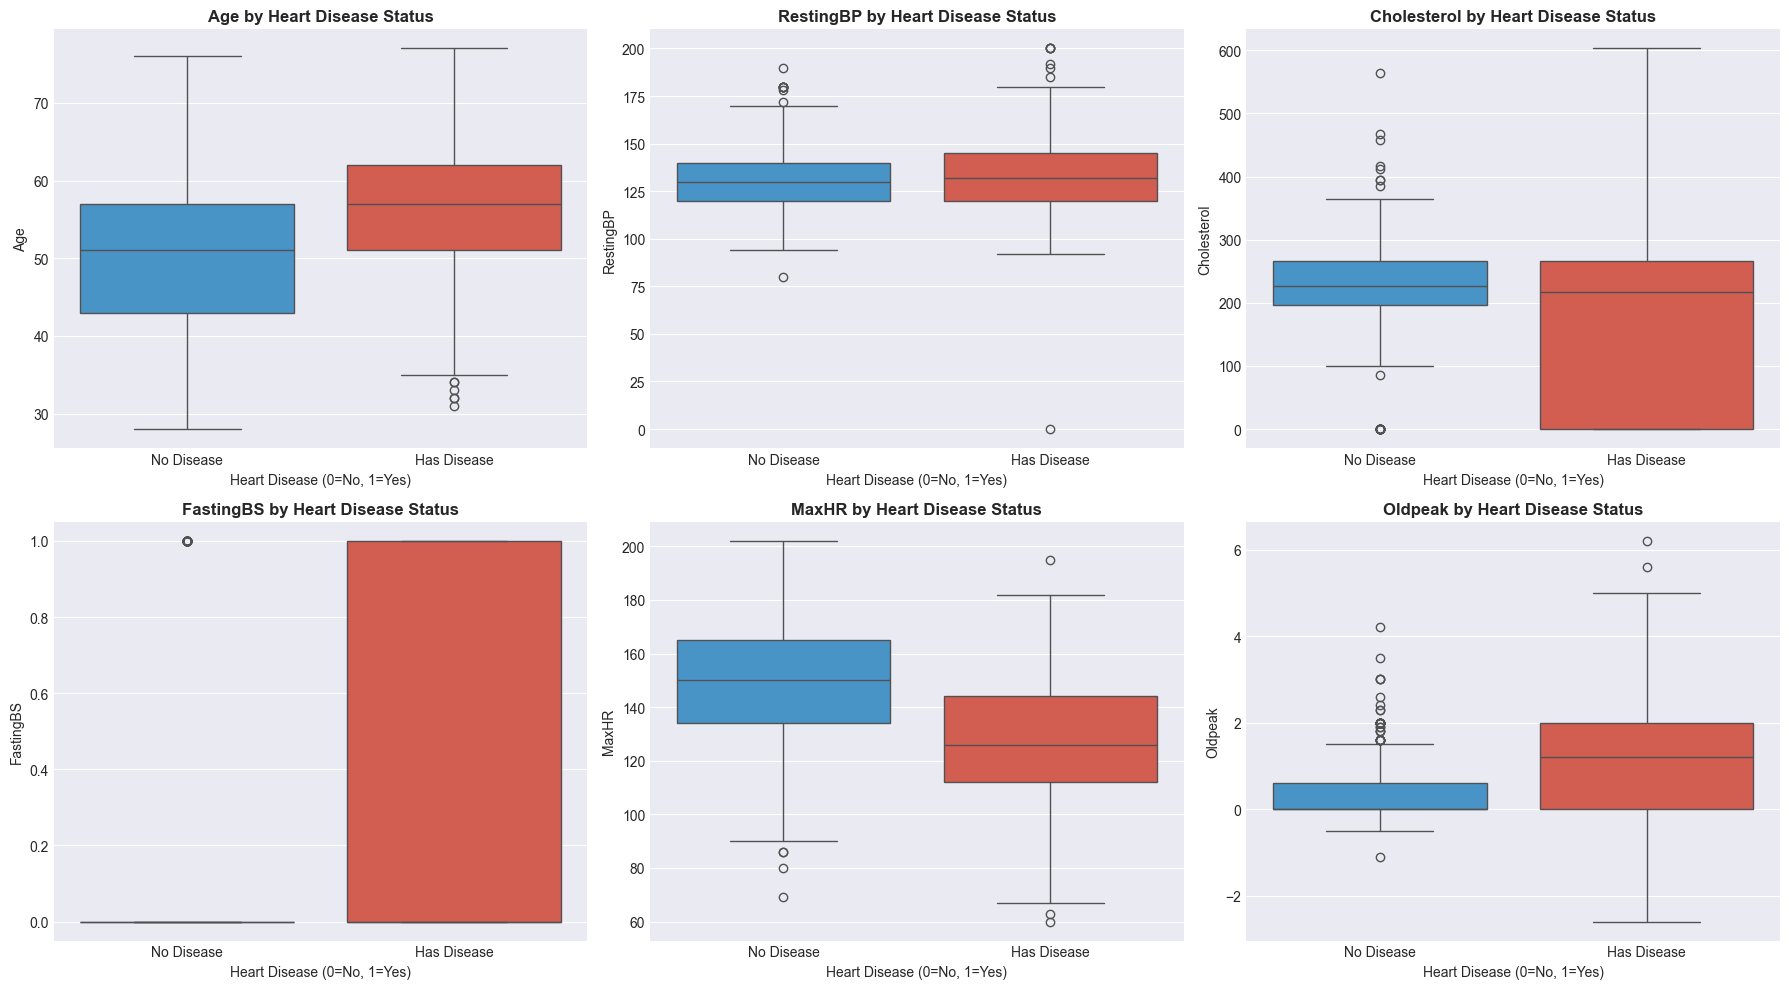

In [180]:
# Box plots for numerical features by Heart Disease status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='HeartDisease', y=col, ax=axes[i], palette=['#3498db', '#e74c3c'])
    axes[i].set_title(f'{col} by Heart Disease Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xticklabels(['No Disease', 'Has Disease'])

plt.tight_layout()
plt.show()


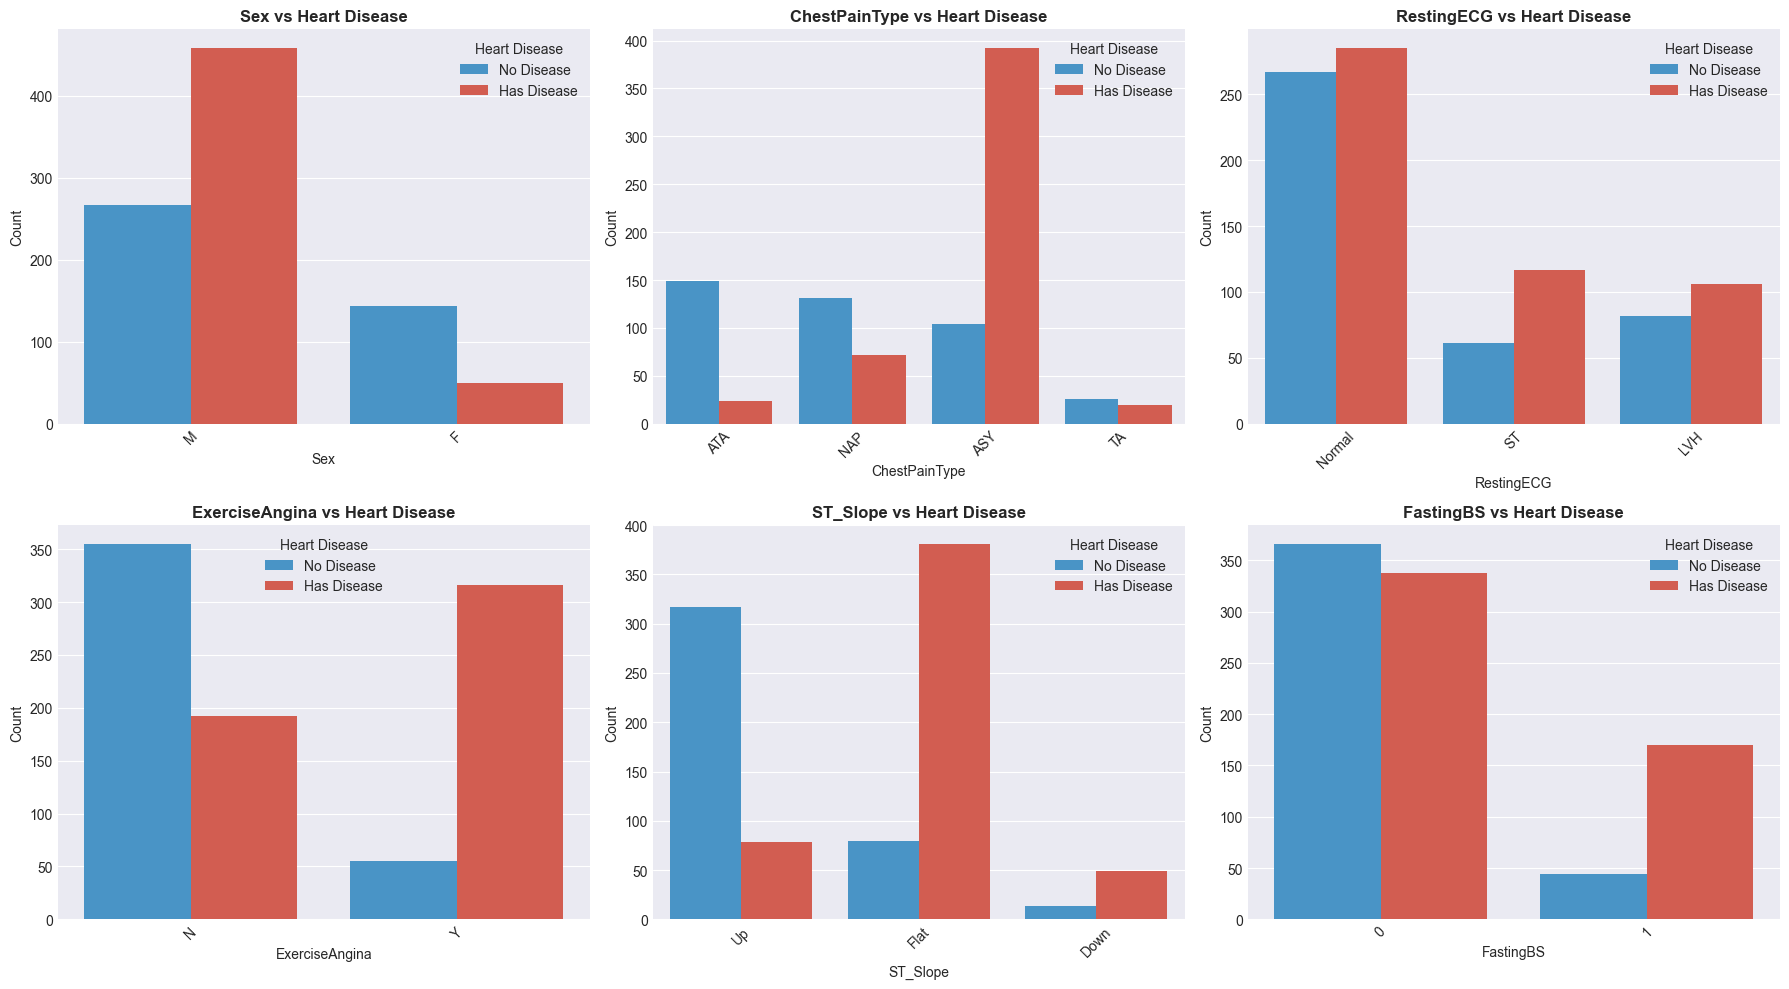

In [181]:
# Categorical features vs Heart Disease
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

for i, col in enumerate(categorical_cols):
    # Create a count plot with hue
    if col == 'FastingBS':
        # FastingBS is already binary (0/1)
        sns.countplot(data=df, x=col, hue='HeartDisease', ax=axes[i], palette=['#3498db', '#e74c3c'])
    else:
        sns.countplot(data=df, x=col, hue='HeartDisease', ax=axes[i], palette=['#3498db', '#e74c3c'])
    axes[i].set_title(f'{col} vs Heart Disease', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].legend(title='Heart Disease', labels=['No Disease', 'Has Disease'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


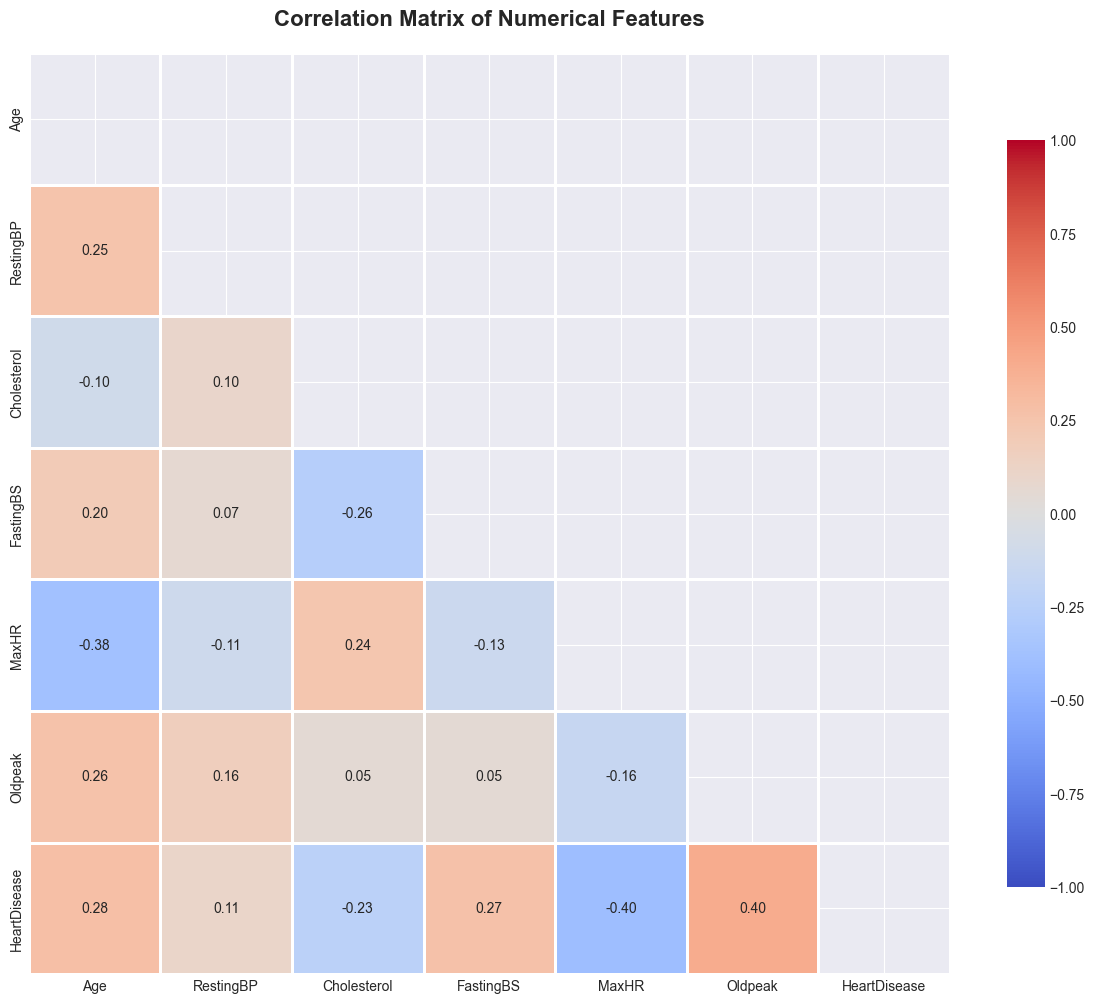


Correlation with Heart Disease:
Oldpeak        :  0.404
Age            :  0.282
FastingBS      :  0.267
RestingBP      :  0.108
Cholesterol    : -0.233
MaxHR          : -0.400


In [182]:
# Correlation Analysis
# Select numerical columns for correlation
numerical_cols_for_corr = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlations with target variable
print("\nCorrelation with Heart Disease:")
print("=" * 50)
correlations_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
for feature, corr in correlations_with_target.items():
    if feature != 'HeartDisease':
        print(f"{feature:15s}: {corr:6.3f}")


In [183]:
# Detailed analysis: Mean values by Heart Disease status
print("Mean Values by Heart Disease Status:")
print("=" * 60)
comparison_df = df.groupby('HeartDisease')[numerical_cols].mean()
comparison_df.index = ['No Disease', 'Has Disease']
print(comparison_df.round(2))

print("\n" + "=" * 60)
print("\nStatistical Significance Test (t-test):")
print("=" * 60)

for col in numerical_cols:
    no_disease = df[df['HeartDisease'] == 0][col]
    has_disease = df[df['HeartDisease'] == 1][col]
    t_stat, p_value = stats.ttest_ind(no_disease, has_disease)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{col:15s}: t-stat={t_stat:7.3f}, p-value={p_value:.4f} {significance}")


Mean Values by Heart Disease Status:
               Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak
No Disease   50.55     130.18       227.12       0.11  148.15     0.41
Has Disease  55.90     134.19       175.94       0.33  127.66     1.27


Statistical Significance Test (t-test):
Age            : t-stat= -8.897, p-value=0.0000 ***
RestingBP      : t-stat= -3.275, p-value=0.0011 **
Cholesterol    : t-stat=  7.243, p-value=0.0000 ***
FastingBS      : t-stat= -8.395, p-value=0.0000 ***
MaxHR          : t-stat= 13.225, p-value=0.0000 ***
Oldpeak        : t-stat=-13.365, p-value=0.0000 ***


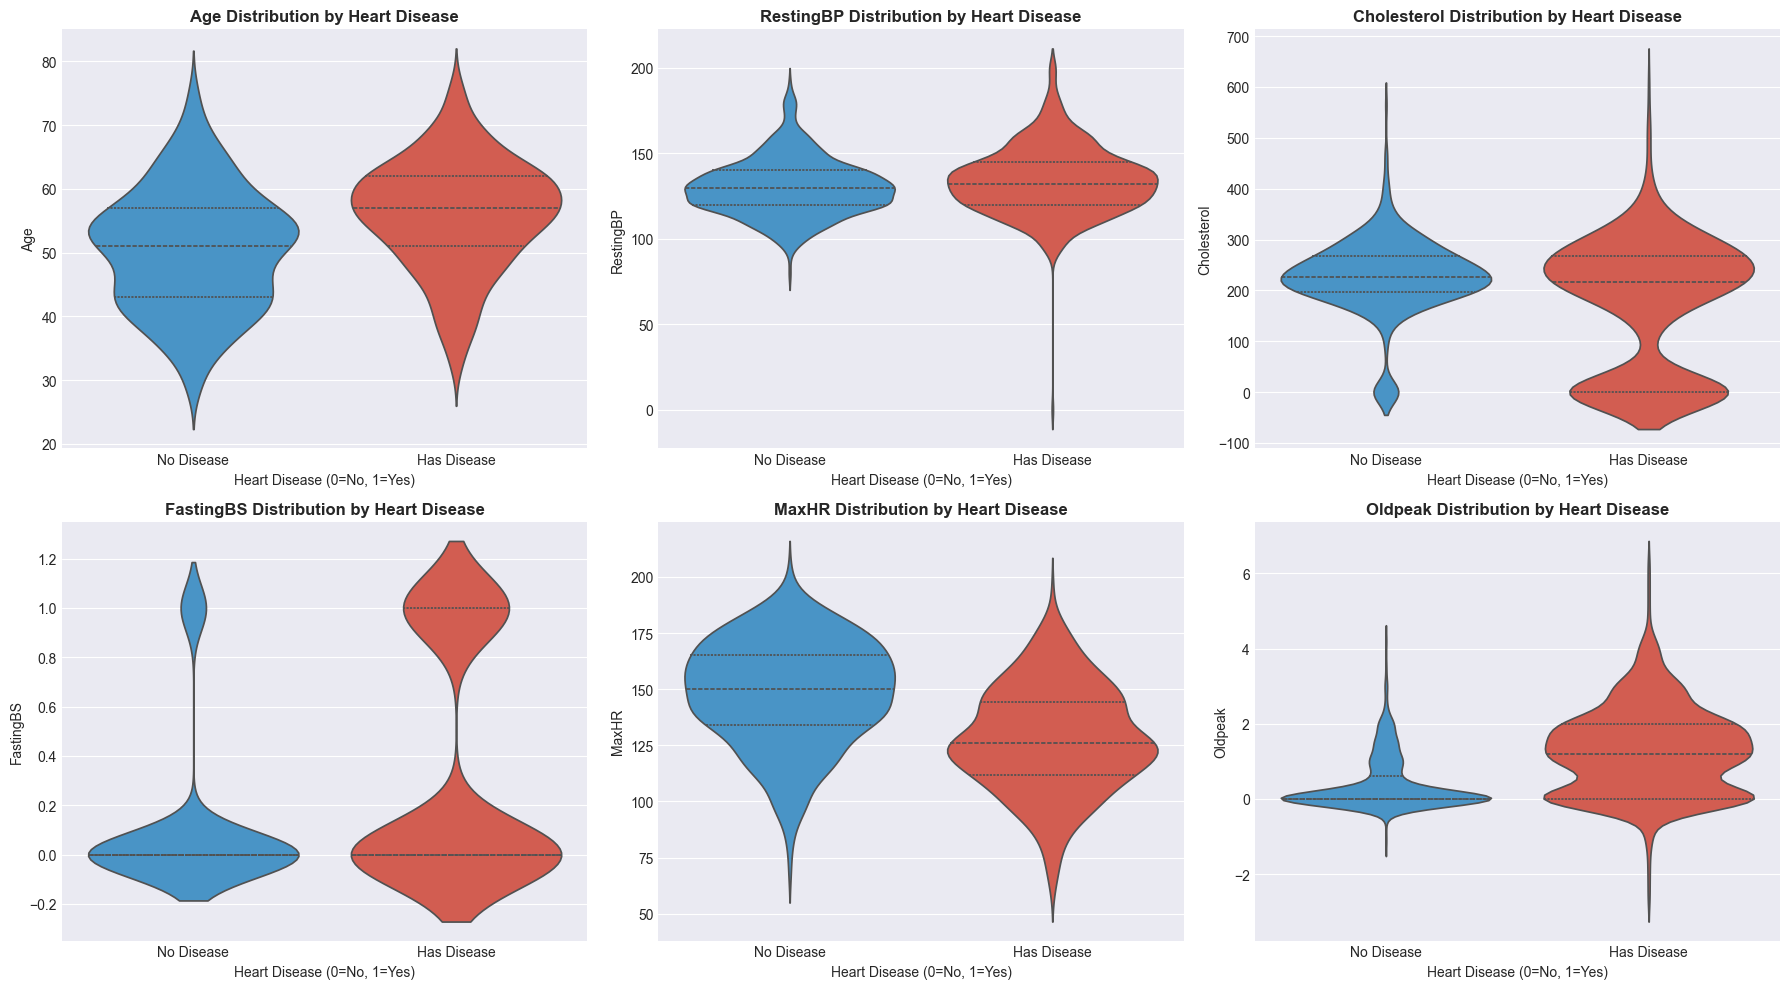

In [184]:
# Violin plots for numerical features (shows distribution shape)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.violinplot(data=df, x='HeartDisease', y=col, ax=axes[i], 
                   palette=['#3498db', '#e74c3c'], inner='quart')
    axes[i].set_title(f'{col} Distribution by Heart Disease', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].set_xticklabels(['No Disease', 'Has Disease'])

plt.tight_layout()
plt.show()


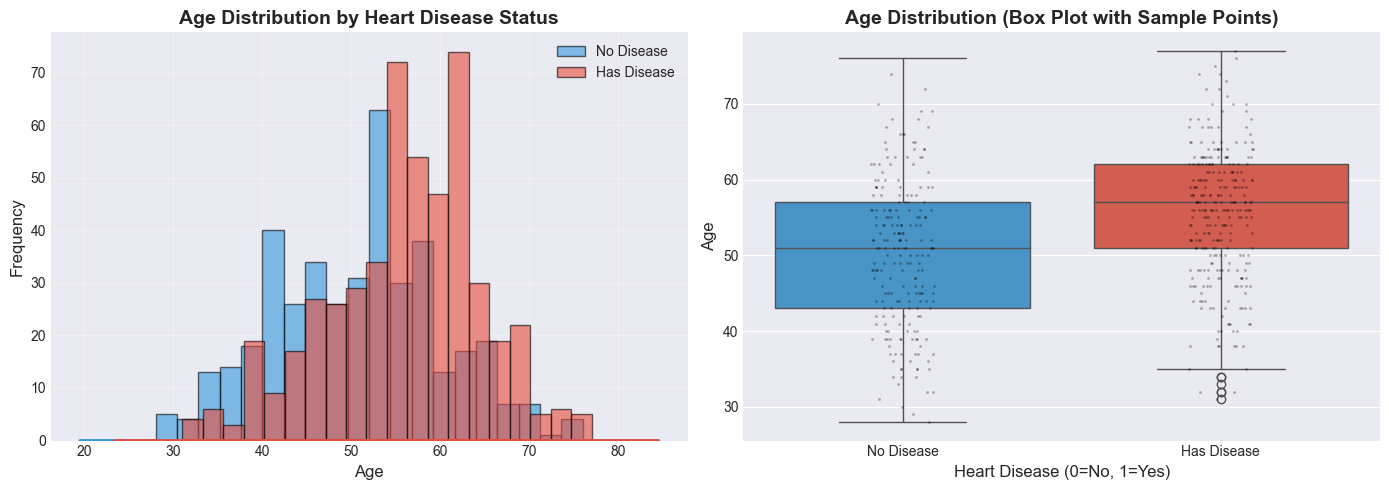

In [185]:
# Age distribution by Heart Disease with KDE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with KDE
for disease_status in [0, 1]:
    subset = df[df['HeartDisease'] == disease_status]['Age']
    label = 'No Disease' if disease_status == 0 else 'Has Disease'
    color = '#3498db' if disease_status == 0 else '#e74c3c'
    axes[0].hist(subset, bins=20, alpha=0.6, label=label, color=color, edgecolor='black')
    sns.kdeplot(data=subset, ax=axes[0], color=color, linewidth=2)

axes[0].set_title('Age Distribution by Heart Disease Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot with swarm overlay (sample for performance)
sample_df = df.sample(min(500, len(df)), random_state=42)
sns.boxplot(data=df, x='HeartDisease', y='Age', ax=axes[1], palette=['#3498db', '#e74c3c'])
sns.stripplot(data=sample_df, x='HeartDisease', y='Age', ax=axes[1], 
              color='black', alpha=0.3, size=2)
axes[1].set_title('Age Distribution (Box Plot with Sample Points)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].set_xticklabels(['No Disease', 'Has Disease'])

plt.tight_layout()
plt.show()


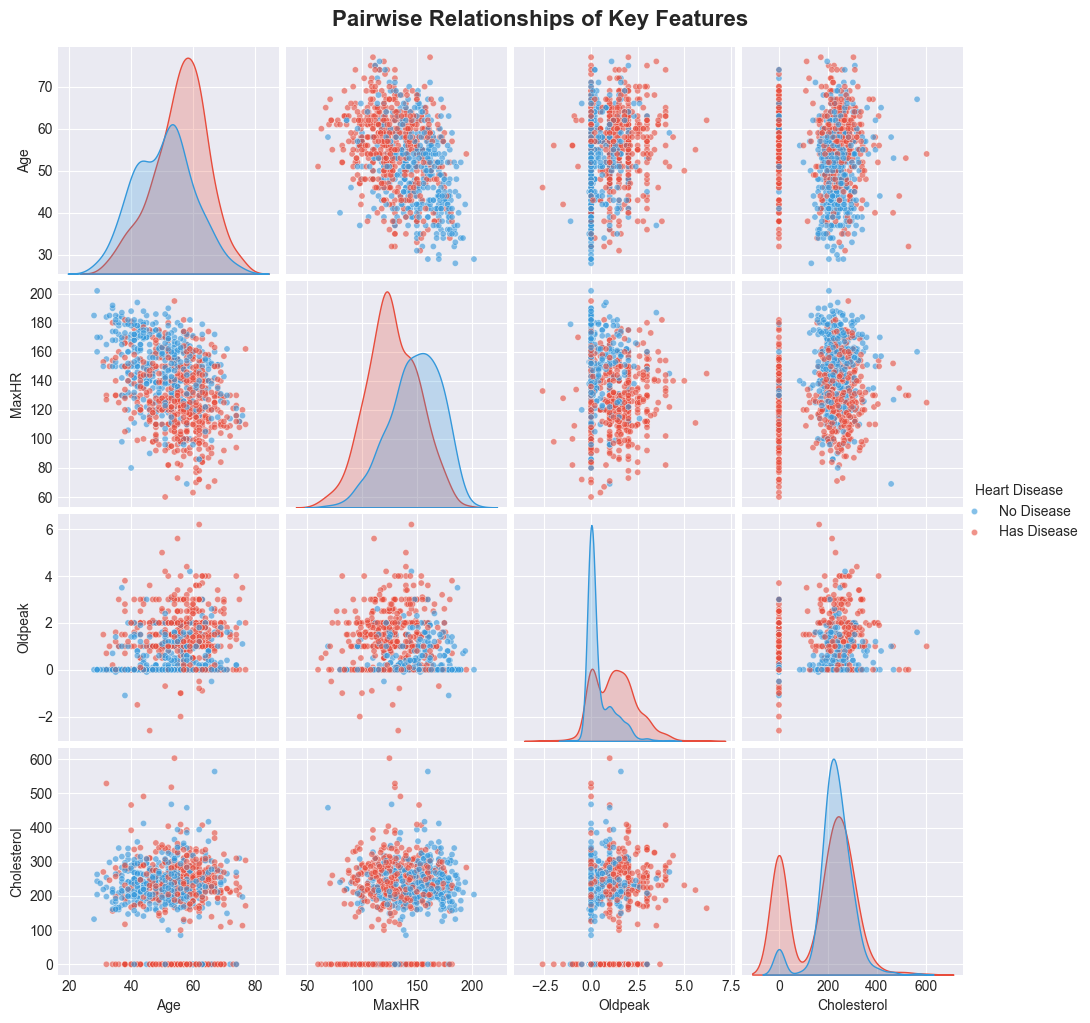

In [186]:
# Scatter plot matrix for key numerical features
key_features = ['Age', 'MaxHR', 'Oldpeak', 'Cholesterol']
pair_df = df[key_features + ['HeartDisease']]

# Create pair plot
g = sns.pairplot(pair_df, hue='HeartDisease', palette=['#3498db', '#e74c3c'], 
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
g.fig.suptitle('Pairwise Relationships of Key Features', fontsize=16, fontweight='bold', y=1.02)
g._legend.set_title('Heart Disease')
for t, l in zip(g._legend.texts, ['No Disease', 'Has Disease']):
    t.set_text(l)
plt.show()


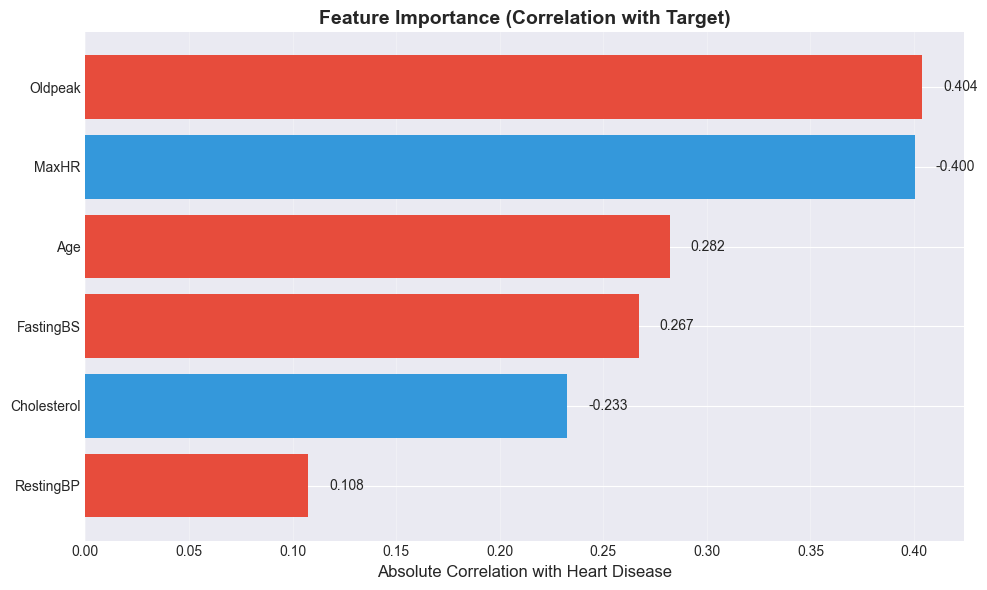

In [187]:
# Feature importance based on correlation with target
correlations_with_target = correlation_matrix['HeartDisease'].drop('HeartDisease').abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlation_matrix['HeartDisease'].drop('HeartDisease').loc[correlations_with_target.index]]
bars = plt.barh(range(len(correlations_with_target)), correlations_with_target.values, color=colors)
plt.yticks(range(len(correlations_with_target)), correlations_with_target.index)
plt.xlabel('Absolute Correlation with Heart Disease', fontsize=12)
plt.title('Feature Importance (Correlation with Target)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, val) in enumerate(correlations_with_target.items()):
    corr_val = correlation_matrix['HeartDisease'].loc[idx]
    plt.text(val + 0.01, i, f'{corr_val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [188]:
# Summary insights
print("=" * 70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 70)

print("\n1. TARGET VARIABLE DISTRIBUTION:")
print(f"   - Total samples: {len(df)}")
print(f"   - Heart Disease: {df['HeartDisease'].sum()} ({df['HeartDisease'].mean()*100:.1f}%)")
print(f"   - No Heart Disease: {(df['HeartDisease']==0).sum()} ({(df['HeartDisease']==0).mean()*100:.1f}%)")

print("\n2. STRONGEST CORRELATIONS WITH HEART DISEASE:")
top_correlations = correlation_matrix['HeartDisease'].drop('HeartDisease').abs().nlargest(5)
for feature, corr_abs in top_correlations.items():
    corr_val = correlation_matrix['HeartDisease'].loc[feature]
    direction = "positive" if corr_val > 0 else "negative"
    print(f"   - {feature:15s}: {corr_val:6.3f} ({direction} correlation)")

print("\n3. CATEGORICAL FEATURES WITH HIGHEST DISEASE RATES:")
for col in ['Sex', 'ExerciseAngina', 'ST_Slope', 'ChestPainType']:
    rates = df.groupby(col)['HeartDisease'].mean() * 100
    max_rate_cat = rates.idxmax()
    max_rate = rates.max()
    print(f"   - {col:15s}: {max_rate_cat} has {max_rate:.1f}% disease rate")

print("\n4. NUMERICAL FEATURES - MEAN DIFFERENCES:")
for col in numerical_cols:
    mean_diff = df[df['HeartDisease']==1][col].mean() - df[df['HeartDisease']==0][col].mean()
    print(f"   - {col:15s}: {mean_diff:+.2f} (disease vs no disease)")

print("\n" + "=" * 70)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. TARGET VARIABLE DISTRIBUTION:
   - Total samples: 918
   - Heart Disease: 508 (55.3%)
   - No Heart Disease: 410 (44.7%)

2. STRONGEST CORRELATIONS WITH HEART DISEASE:
   - Oldpeak        :  0.404 (positive correlation)
   - MaxHR          : -0.400 (negative correlation)
   - Age            :  0.282 (positive correlation)
   - FastingBS      :  0.267 (positive correlation)
   - Cholesterol    : -0.233 (negative correlation)

3. CATEGORICAL FEATURES WITH HIGHEST DISEASE RATES:
   - Sex            : M has 63.2% disease rate
   - ExerciseAngina : Y has 85.2% disease rate
   - ST_Slope       : Flat has 82.8% disease rate
   - ChestPainType  : ASY has 79.0% disease rate

4. NUMERICAL FEATURES - MEAN DIFFERENCES:
   - Age            : +5.35 (disease vs no disease)
   - RestingBP      : +4.00 (disease vs no disease)
   - Cholesterol    : -51.18 (disease vs no disease)
   - FastingBS      : +0.23 (disease vs no disease)
   - MaxHR          : -20.

# K-Means Clustering Analysis

This section applies K-means clustering to uncover natural grouping structure in the data and examines how well the clusters align with the target classes (heart disease).


In [189]:
# Import clustering and preprocessing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches

print("Libraries imported successfully!")


Libraries imported successfully!


In [190]:
# Prepare data for clustering
# Create a copy of the dataframe
df_cluster = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    le = LabelEncoder()
    df_cluster[col + '_encoded'] = le.fit_transform(df_cluster[col])
    label_encoders[col] = le

# Select features for clustering (all numerical + encoded categorical)
feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'] + \
               [col + '_encoded' for col in categorical_cols]

X_cluster = df_cluster[feature_cols].copy()

# Handle any missing values (if any)
X_cluster = X_cluster.fillna(X_cluster.mean())

# Scale the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"Data prepared for clustering:")
print(f"  - Number of samples: {X_scaled.shape[0]}")
print(f"  - Number of features: {X_scaled.shape[1]}")
print(f"  - Features used: {feature_cols}")


Data prepared for clustering:
  - Number of samples: 918
  - Number of features: 11
  - Features used: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_encoded', 'ChestPainType_encoded', 'RestingECG_encoded', 'ExerciseAngina_encoded', 'ST_Slope_encoded']


In [191]:
# Determine optimal number of clusters using Elbow Method and Silhouette Score
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Evaluating different numbers of clusters...")
print("=" * 60)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"k={k:2d}: Inertia={inertia:10.2f}, Silhouette Score={sil_score:.4f}")

print("=" * 60)


Evaluating different numbers of clusters...
k= 2: Inertia=   8178.53, Silhouette Score=0.1850
k= 3: Inertia=   7429.94, Silhouette Score=0.1775
k= 4: Inertia=   6830.68, Silhouette Score=0.1579
k= 5: Inertia=   6468.63, Silhouette Score=0.1593
k= 6: Inertia=   6181.71, Silhouette Score=0.1552
k= 7: Inertia=   5985.58, Silhouette Score=0.1270
k= 8: Inertia=   5745.21, Silhouette Score=0.1401
k= 9: Inertia=   5576.99, Silhouette Score=0.1508
k=10: Inertia=   5391.20, Silhouette Score=0.1222


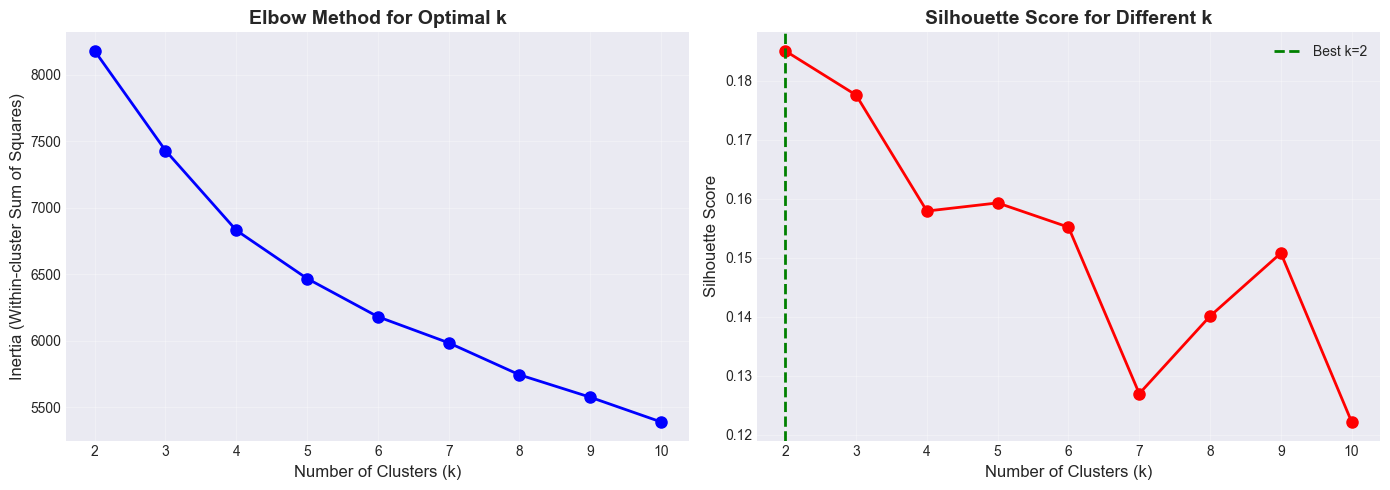


Optimal number of clusters based on Silhouette Score: k=2
Best Silhouette Score: 0.1850


In [192]:
# Visualize Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Scores
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

# Highlight best k
best_k = k_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_k, color='green', linestyle='--', linewidth=2, label=f'Best k={best_k}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nOptimal number of clusters based on Silhouette Score: k={best_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")


In [193]:
# Apply K-means with optimal k (and also with k=2 to compare with target classes)
optimal_k = best_k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)

cluster_labels_optimal = kmeans_optimal.fit_predict(X_scaled)
cluster_labels_2 = kmeans_2.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_cluster['Cluster_Optimal'] = cluster_labels_optimal
df_cluster['Cluster_2'] = cluster_labels_2

print(f"K-means clustering completed:")
print(f"  - Optimal clusters (k={optimal_k}): {len(np.unique(cluster_labels_optimal))} clusters")
print(f"  - 2 clusters: {len(np.unique(cluster_labels_2))} clusters")
print(f"\nCluster distribution (k={optimal_k}):")
print(df_cluster['Cluster_Optimal'].value_counts().sort_index())
print(f"\nCluster distribution (k=2):")
print(df_cluster['Cluster_2'].value_counts().sort_index())


K-means clustering completed:
  - Optimal clusters (k=2): 2 clusters
  - 2 clusters: 2 clusters

Cluster distribution (k=2):
Cluster_Optimal
0    471
1    447
Name: count, dtype: int64

Cluster distribution (k=2):
Cluster_2
0    471
1    447
Name: count, dtype: int64


In [194]:
# Compare clusters with target variable (Heart Disease)
print("=" * 70)
print("CLUSTER ALIGNMENT WITH TARGET VARIABLE (Heart Disease)")
print("=" * 70)

# For k=2 clusters
print("\n1. K=2 CLUSTERS vs HEART DISEASE:")
print("-" * 70)
crosstab_2 = pd.crosstab(df_cluster['Cluster_2'], df_cluster['HeartDisease'], margins=True)
print(crosstab_2)
print("\nPercentage distribution:")
crosstab_2_pct = pd.crosstab(df_cluster['Cluster_2'], df_cluster['HeartDisease'], normalize='index') * 100
print(crosstab_2_pct.round(2))

# Calculate metrics for k=2
ari_2 = adjusted_rand_score(df_cluster['HeartDisease'], df_cluster['Cluster_2'])
homogeneity_2 = homogeneity_score(df_cluster['HeartDisease'], df_cluster['Cluster_2'])
completeness_2 = completeness_score(df_cluster['HeartDisease'], df_cluster['Cluster_2'])

print(f"\nMetrics for k=2:")
print(f"  - Adjusted Rand Index: {ari_2:.4f}")
print(f"  - Homogeneity Score: {homogeneity_2:.4f}")
print(f"  - Completeness Score: {completeness_2:.4f}")

# For optimal k clusters
print(f"\n2. K={optimal_k} CLUSTERS vs HEART DISEASE:")
print("-" * 70)
crosstab_optimal = pd.crosstab(df_cluster['Cluster_Optimal'], df_cluster['HeartDisease'], margins=True)
print(crosstab_optimal)
print("\nPercentage distribution:")
crosstab_optimal_pct = pd.crosstab(df_cluster['Cluster_Optimal'], df_cluster['HeartDisease'], normalize='index') * 100
print(crosstab_optimal_pct.round(2))

# Calculate metrics for optimal k
ari_optimal = adjusted_rand_score(df_cluster['HeartDisease'], df_cluster['Cluster_Optimal'])
homogeneity_optimal = homogeneity_score(df_cluster['HeartDisease'], df_cluster['Cluster_Optimal'])
completeness_optimal = completeness_score(df_cluster['HeartDisease'], df_cluster['Cluster_Optimal'])

print(f"\nMetrics for k={optimal_k}:")
print(f"  - Adjusted Rand Index: {ari_optimal:.4f}")
print(f"  - Homogeneity Score: {homogeneity_optimal:.4f}")
print(f"  - Completeness Score: {completeness_optimal:.4f}")
print("=" * 70)


CLUSTER ALIGNMENT WITH TARGET VARIABLE (Heart Disease)

1. K=2 CLUSTERS vs HEART DISEASE:
----------------------------------------------------------------------
HeartDisease    0    1  All
Cluster_2                  
0             362  109  471
1              48  399  447
All           410  508  918

Percentage distribution:
HeartDisease      0      1
Cluster_2                 
0             76.86  23.14
1             10.74  89.26

Metrics for k=2:
  - Adjusted Rand Index: 0.4323
  - Homogeneity Score: 0.3547
  - Completeness Score: 0.3519

2. K=2 CLUSTERS vs HEART DISEASE:
----------------------------------------------------------------------
HeartDisease       0    1  All
Cluster_Optimal               
0                362  109  471
1                 48  399  447
All              410  508  918

Percentage distribution:
HeartDisease         0      1
Cluster_Optimal              
0                76.86  23.14
1                10.74  89.26

Metrics for k=2:
  - Adjusted Rand Index: 0.43

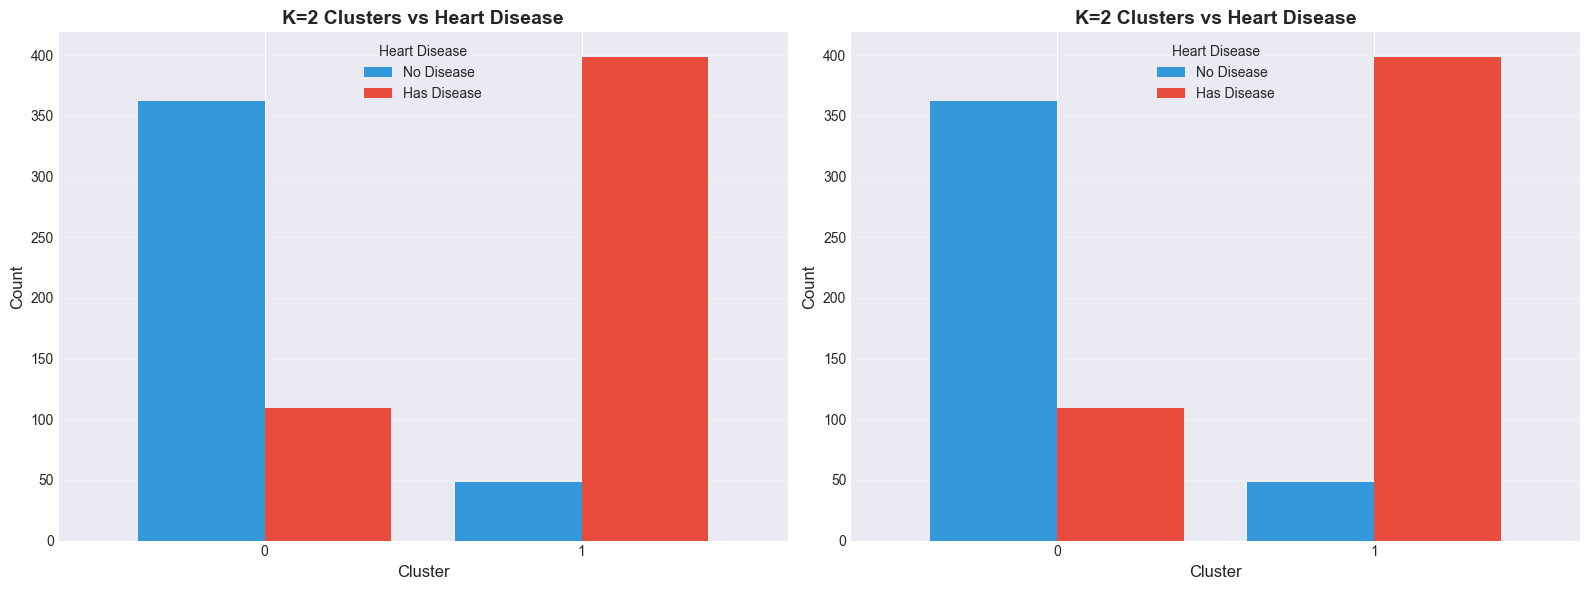

In [195]:
# Visualize cluster alignment with target variable
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K=2 clusters
crosstab_2_viz = pd.crosstab(df_cluster['Cluster_2'], df_cluster['HeartDisease'])
crosstab_2_viz.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'], width=0.8)
axes[0].set_title('K=2 Clusters vs Heart Disease', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Heart Disease', labels=['No Disease', 'Has Disease'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Optimal k clusters
crosstab_optimal_viz = pd.crosstab(df_cluster['Cluster_Optimal'], df_cluster['HeartDisease'])
crosstab_optimal_viz.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'], width=0.8)
axes[1].set_title(f'K={optimal_k} Clusters vs Heart Disease', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Heart Disease', labels=['No Disease', 'Has Disease'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


PCA explained variance ratio: [0.25139665 0.1330889 ]
Total variance explained: 0.3845


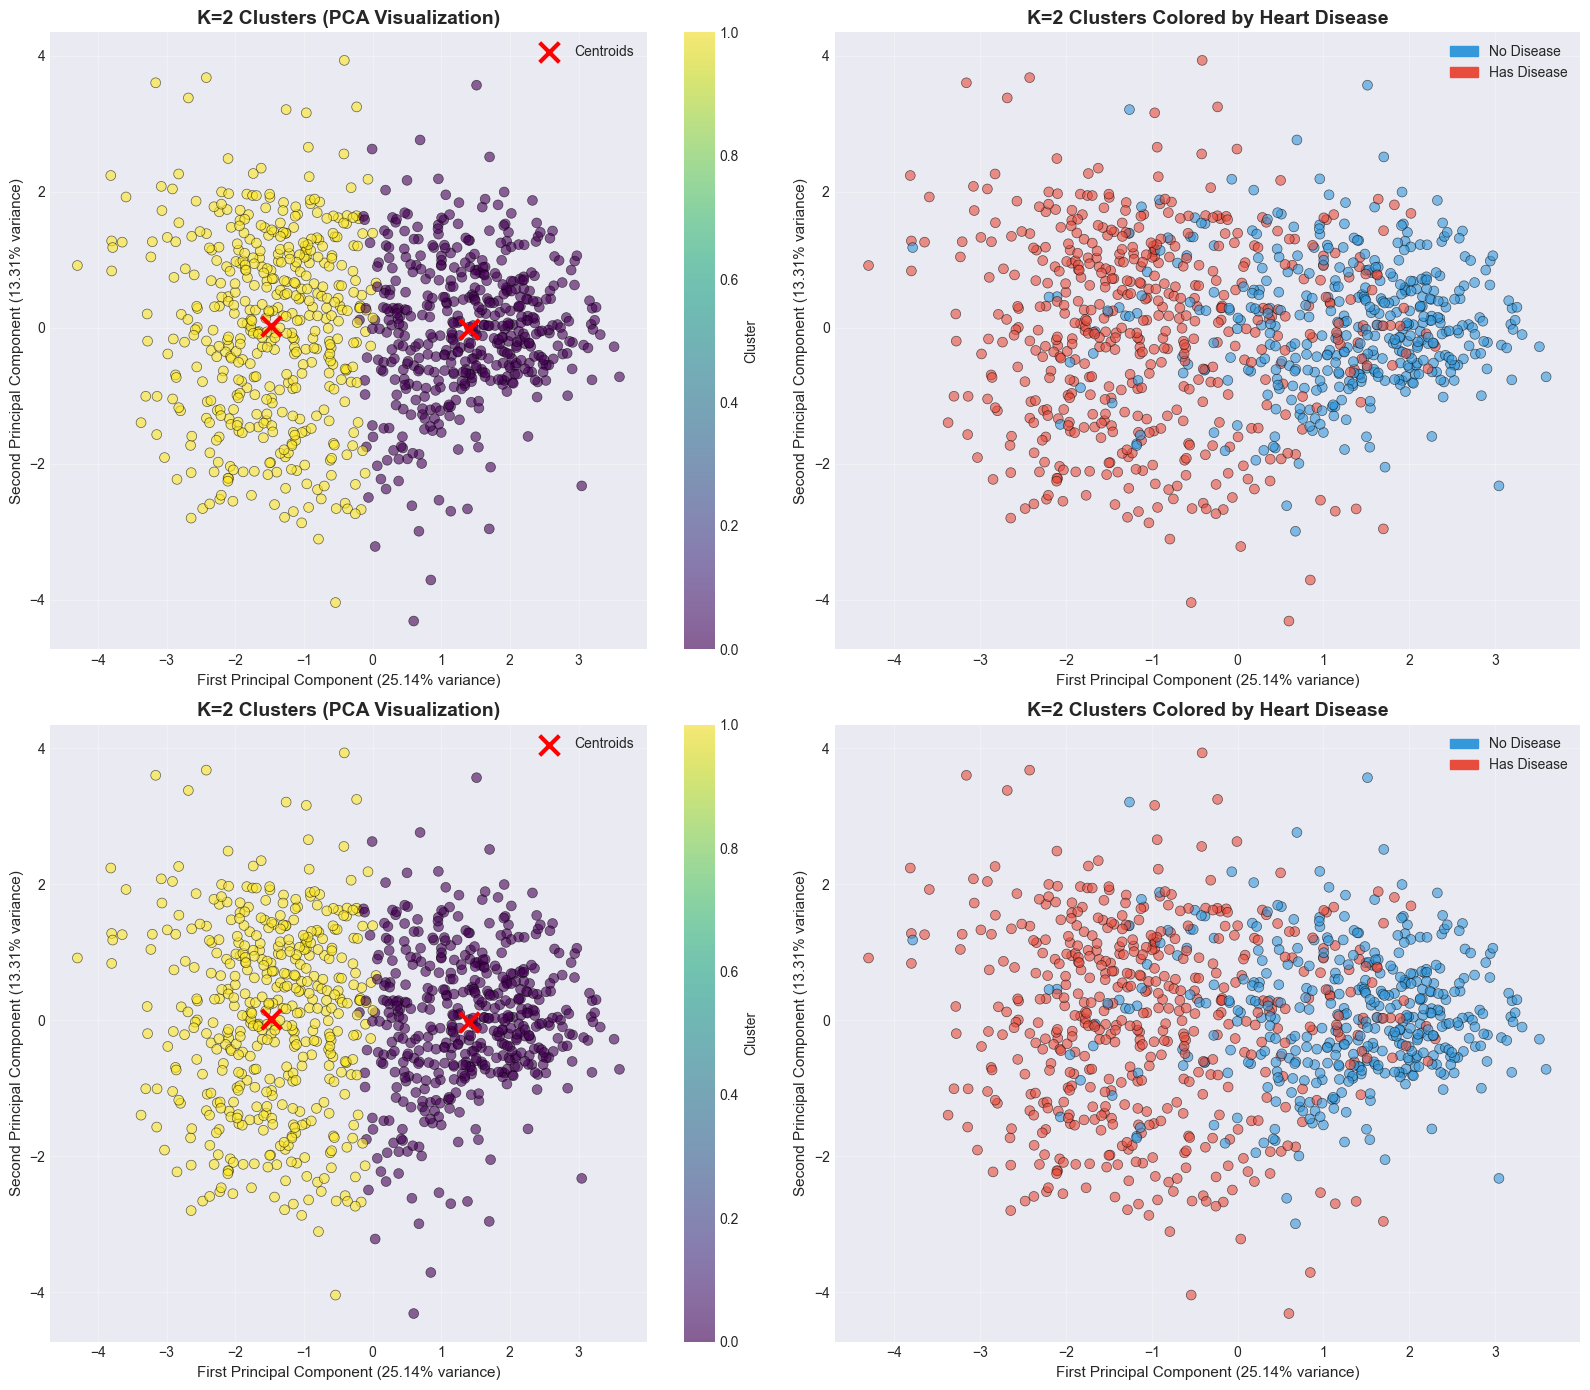

In [196]:
# Visualize clusters using PCA (Principal Component Analysis)
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: K=2 clusters colored by cluster
scatter1 = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_2, 
                              cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
# Project cluster centers to PCA space
centers_pca_2 = pca.transform(kmeans_2.cluster_centers_)
axes[0, 0].scatter(centers_pca_2[:, 0], centers_pca_2[:, 1], c='red', marker='x', 
                   s=200, linewidths=3, label='Centroids')
axes[0, 0].set_title('K=2 Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[0, 0].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0], label='Cluster')

# Plot 2: K=2 clusters colored by Heart Disease
colors_target = ['#3498db' if x == 0 else '#e74c3c' for x in df_cluster['HeartDisease']]
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=colors_target, alpha=0.6, s=50, 
                   edgecolors='black', linewidth=0.5)
axes[0, 1].set_title('K=2 Clusters Colored by Heart Disease', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[0, 1].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
no_disease_patch = mpatches.Patch(color='#3498db', label='No Disease')
has_disease_patch = mpatches.Patch(color='#e74c3c', label='Has Disease')
axes[0, 1].legend(handles=[no_disease_patch, has_disease_patch])
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Optimal k clusters colored by cluster
scatter3 = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_optimal, 
                              cmap='viridis', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
# Project cluster centers to PCA space
centers_pca = pca.transform(kmeans_optimal.cluster_centers_)
axes[1, 0].scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', 
                   s=200, linewidths=3, label='Centroids')
axes[1, 0].set_title(f'K={optimal_k} Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[1, 0].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0], label='Cluster')

# Plot 4: Optimal k clusters colored by Heart Disease
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=colors_target, alpha=0.6, s=50, 
                   edgecolors='black', linewidth=0.5)
axes[1, 1].set_title(f'K={optimal_k} Clusters Colored by Heart Disease', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=11)
axes[1, 1].set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=11)
axes[1, 1].legend(handles=[no_disease_patch, has_disease_patch])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [197]:
# Analyze cluster characteristics (mean values for each cluster)
print("=" * 70)
print("CLUSTER CHARACTERISTICS (Mean Values)")
print("=" * 70)

# For k=2
print("\n1. K=2 CLUSTERS:")
print("-" * 70)
cluster_means_2 = df_cluster.groupby('Cluster_2')[feature_cols].mean()
print(cluster_means_2.round(2))

# For optimal k
print(f"\n2. K={optimal_k} CLUSTERS:")
print("-" * 70)
cluster_means_optimal = df_cluster.groupby('Cluster_Optimal')[feature_cols].mean()
print(cluster_means_optimal.round(2))

# Heart Disease rate by cluster
print("\n3. HEART DISEASE RATE BY CLUSTER:")
print("-" * 70)
print("K=2 Clusters:")
disease_rate_2 = df_cluster.groupby('Cluster_2')['HeartDisease'].mean() * 100
print(disease_rate_2.round(2))

print(f"\nK={optimal_k} Clusters:")
disease_rate_optimal = df_cluster.groupby('Cluster_Optimal')['HeartDisease'].mean() * 100
print(disease_rate_optimal.round(2))
print("=" * 70)


CLUSTER CHARACTERISTICS (Mean Values)

1. K=2 CLUSTERS:
----------------------------------------------------------------------
             Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
Cluster_2                                                              
0          49.88     128.86       222.93       0.12  151.15     0.36   
1          57.34     136.12       173.37       0.35  121.70     1.45   

           Sex_encoded  ChestPainType_encoded  RestingECG_encoded  \
Cluster_2                                                           
0                 0.69                   1.21                0.90   
1                 0.90                   0.33                1.08   

           ExerciseAngina_encoded  ST_Slope_encoded  
Cluster_2                                            
0                            0.07              1.74  
1                            0.75              0.97  

2. K=2 CLUSTERS:
----------------------------------------------------------------------
  

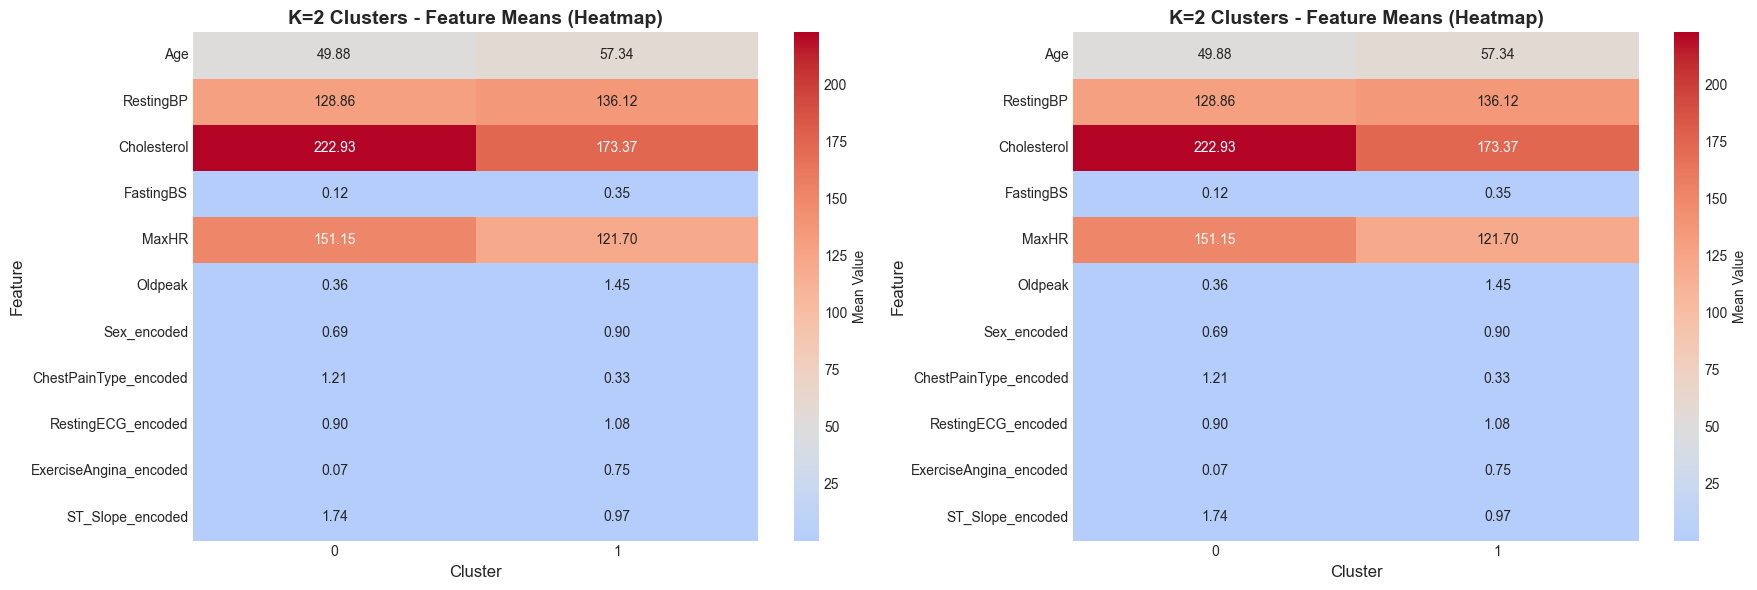

In [198]:
# Visualize cluster characteristics - Heatmap of mean values
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# K=2 clusters
cluster_means_2_viz = df_cluster.groupby('Cluster_2')[feature_cols].mean()
sns.heatmap(cluster_means_2_viz.T, annot=True, fmt='.2f', cmap='coolwarm', 
            center=cluster_means_2_viz.values.mean(), ax=axes[0], cbar_kws={'label': 'Mean Value'})
axes[0].set_title('K=2 Clusters - Feature Means (Heatmap)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

# Optimal k clusters
cluster_means_optimal_viz = df_cluster.groupby('Cluster_Optimal')[feature_cols].mean()
sns.heatmap(cluster_means_optimal_viz.T, annot=True, fmt='.2f', cmap='coolwarm', 
            center=cluster_means_optimal_viz.values.mean(), ax=axes[1], cbar_kws={'label': 'Mean Value'})
axes[1].set_title(f'K={optimal_k} Clusters - Feature Means (Heatmap)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()


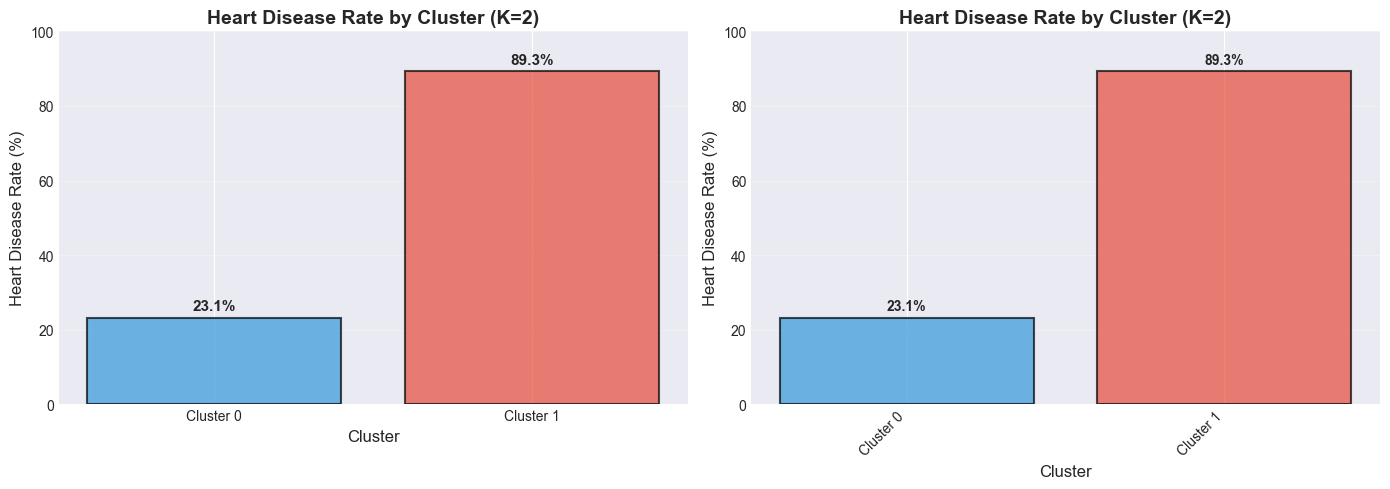

In [199]:
# Visualize heart disease rate by cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K=2 clusters
disease_rate_2_viz = df_cluster.groupby('Cluster_2')['HeartDisease'].mean() * 100
bars1 = axes[0].bar(range(len(disease_rate_2_viz)), disease_rate_2_viz.values, 
                    color=['#3498db', '#e74c3c'], alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_title('Heart Disease Rate by Cluster (K=2)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Heart Disease Rate (%)', fontsize=12)
axes[0].set_xticks(range(len(disease_rate_2_viz)))
axes[0].set_xticklabels([f'Cluster {i}' for i in disease_rate_2_viz.index])
axes[0].set_ylim(0, 100)
axes[0].grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for i, (idx, val) in enumerate(disease_rate_2_viz.items()):
    axes[0].text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Optimal k clusters
disease_rate_optimal_viz = df_cluster.groupby('Cluster_Optimal')['HeartDisease'].mean() * 100
colors_optimal = ['#e74c3c' if rate > 50 else '#3498db' for rate in disease_rate_optimal_viz.values]
bars2 = axes[1].bar(range(len(disease_rate_optimal_viz)), disease_rate_optimal_viz.values, 
                    color=colors_optimal, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_title(f'Heart Disease Rate by Cluster (K={optimal_k})', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Heart Disease Rate (%)', fontsize=12)
axes[1].set_xticks(range(len(disease_rate_optimal_viz)))
axes[1].set_xticklabels([f'Cluster {i}' for i in disease_rate_optimal_viz.index], rotation=45, ha='right')
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for i, (idx, val) in enumerate(disease_rate_optimal_viz.items()):
    axes[1].text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Supervised Machine Learning - Model Training and Evaluation

This section implements a comprehensive machine learning pipeline:
1. Logistic Regression with hyperparameter tuning
2. Four feature transformations: Original (baseline) + Polynomial degrees 2, 3, and 4
3. Hyperparameter tuning with grid search (6 C values)
4. Train/Validation/Test split
5. Model evaluation and comparison
6. Bias/Variance analysis


In [200]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import time
from itertools import product

print("Machine learning libraries imported successfully!")


Machine learning libraries imported successfully!


In [201]:
# ============================================================================
# 1. SET UP DATA AND ENVIRONMENT
# ============================================================================

# 1.1 Load the dataset into a DataFrame
df_ml = df.copy()
print("Dataset loaded.")
print(f"Shape: {df_ml.shape}")

# 1.2 Separate features X and target y
X = df_ml.drop('HeartDisease', axis=1)
y = df_ml['HeartDisease']

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# 1.3 Split the data into training, validation, and test sets (60% / 20% / 20%)
# First split: 60% train+val, 40% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Second split: 60% train, 20% val (of the 60% train+val, which is 60% of total)
# To get 20% of total for val, we need test_size = 0.2/0.6 = 0.333
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42, stratify=y_temp
)

print("\n" + "=" * 70)
print("Data Split Complete")
print("=" * 70)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining target: {y_train.value_counts().to_dict()}")
print(f"Validation target: {y_val.value_counts().to_dict()}")
print(f"Test target: {y_test.value_counts().to_dict()}")

# 1.4 Build a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identify feature types
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# 1.5 Fit the preprocessing pipeline on training set only, and transform train/val/test
print("\n" + "=" * 70)
print("Fitting Preprocessing Pipeline on Training Set")
print("=" * 70)

# Fit on training set
preprocessor.fit(X_train)

# Transform all sets
X_train_preprocessed = preprocessor.transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names (for reference)
feature_names = (numeric_features + 
                list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

print(f"Preprocessed training shape: {X_train_preprocessed.shape}")
print(f"Preprocessed validation shape: {X_val_preprocessed.shape}")
print(f"Preprocessed test shape: {X_test_preprocessed.shape}")
print("=" * 70)


Dataset loaded.
Shape: (918, 12)

Features shape: (918, 11)
Target distribution: {1: 508, 0: 410}

Data Split Complete
Training set: 366 samples (39.9%)
Validation set: 184 samples (20.0%)
Test set: 368 samples (40.1%)

Training target: {1: 202, 0: 164}
Validation target: {1: 102, 0: 82}
Test target: {1: 204, 0: 164}

Fitting Preprocessing Pipeline on Training Set
Preprocessed training shape: (366, 15)
Preprocessed validation shape: (184, 15)
Preprocessed test shape: (368, 15)


In [209]:
# ============================================================================
# 2. DEFINE LOGISTIC REGRESSION SETTINGS
# ============================================================================

# 2.1 Choose Logistic Regression as the model type
model_type = "LogisticRegression"

# 2.2 Define penalties and corresponding solvers
# L1 penalty requires 'liblinear' or 'saga' solver
# L2 penalty can use 'lbfgs', 'liblinear', or 'saga'
penalties = ['l1', 'l2', None]
penalty_solvers = {
    None: 'lbfgs',
    'l1': 'liblinear',  # liblinear supports L1
    'l2': 'lbfgs'       # lbfgs supports L2 (faster for L2)
}

# 2.3 Define a list of six C values
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# 2.4 Decide on four feature spaces (Z-spaces)
# Z0: preprocessed original features (no extra transform)
# Z1: degree-2 polynomial features
# Z2: degree-3 polynomial features
# Z3: degree-4 polynomial features

Z_spaces = ['Z0', 'Z1', 'Z2', 'Z3']

print("=" * 70)
print("Logistic Regression Settings")
print("=" * 70)
print(f"Model Type: {model_type}")
print(f"Penalties: {penalties}")
print(f"Solvers: L1 -> {penalty_solvers['l1']}, L2 -> {penalty_solvers['l2']}")
print(f"C values: {C_values}")
print(f"Z-spaces: {Z_spaces}")
print(f"Total configurations: {len(Z_spaces)} Z-spaces × {len(penalties)} penalties × {len(C_values)} C values = {len(Z_spaces) * len(penalties) * len(C_values)}")
print("=" * 70)


Logistic Regression Settings
Model Type: LogisticRegression
Penalties: ['l1', 'l2', None]
Solvers: L1 -> liblinear, L2 -> lbfgs
C values: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Z-spaces: ['Z0', 'Z1', 'Z2', 'Z3']
Total configurations: 4 Z-spaces × 3 penalties × 6 C values = 72


In [210]:
# ============================================================================
# 3. PREPARE TRANSFORMED FEATURE SPACES
# ============================================================================

# Store transformed feature spaces
Z_space_data = {}

print("=" * 70)
print("Preparing Transformed Feature Spaces")
print("=" * 70)

# For each Z-space
for Z_name in Z_spaces:
    print(f"\nProcessing {Z_name}...")
    
    if Z_name == 'Z0':
        # Z0: Use preprocessed features as they are (no extra transform)
        Z_space_data[Z_name] = {
            'X_train': X_train_preprocessed,
            'X_val': X_val_preprocessed,
            'X_test': X_test_preprocessed,
            'transformer': None
        }
        print(f"  Using original preprocessed features")
        
    elif Z_name == 'Z1':
        # Z1: Degree-2 polynomial features
        poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
        Z_space_data[Z_name] = {
            'X_train': poly_transformer.fit_transform(X_train_preprocessed),
            'X_val': poly_transformer.transform(X_val_preprocessed),
            'X_test': poly_transformer.transform(X_test_preprocessed),
            'transformer': poly_transformer
        }
        print(f"  Polynomial degree 2: {Z_space_data[Z_name]['X_train'].shape[1]} features")
        
    elif Z_name == 'Z2':
        # Z2: Degree-3 polynomial features
        poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
        Z_space_data[Z_name] = {
            'X_train': poly_transformer.fit_transform(X_train_preprocessed),
            'X_val': poly_transformer.transform(X_val_preprocessed),
            'X_test': poly_transformer.transform(X_test_preprocessed),
            'transformer': poly_transformer
        }
        print(f"  Polynomial degree 3: {Z_space_data[Z_name]['X_train'].shape[1]} features")
        
    elif Z_name == 'Z3':
        # Z3: Degree-4 polynomial features
        poly_transformer = PolynomialFeatures(degree=4, include_bias=False)
        Z_space_data[Z_name] = {
            'X_train': poly_transformer.fit_transform(X_train_preprocessed),
            'X_val': poly_transformer.transform(X_val_preprocessed),
            'X_test': poly_transformer.transform(X_test_preprocessed),
            'transformer': poly_transformer
        }
        print(f"  Polynomial degree 4: {Z_space_data[Z_name]['X_train'].shape[1]} features")

print("\n" + "=" * 70)
print("Feature Spaces Summary")
print("=" * 70)
for Z_name in Z_spaces:
    data = Z_space_data[Z_name]
    print(f"{Z_name}: Train {data['X_train'].shape}, Val {data['X_val'].shape}, Test {data['X_test'].shape}")
print("=" * 70)


Preparing Transformed Feature Spaces

Processing Z0...
  Using original preprocessed features

Processing Z1...
  Polynomial degree 2: 135 features

Processing Z2...
  Polynomial degree 3: 815 features

Processing Z3...
  Polynomial degree 4: 3875 features

Feature Spaces Summary
Z0: Train (366, 15), Val (184, 15), Test (368, 15)
Z1: Train (366, 135), Val (184, 135), Test (368, 135)
Z2: Train (366, 815), Val (184, 815), Test (368, 815)
Z3: Train (366, 3875), Val (184, 3875), Test (368, 3875)


In [212]:
# ============================================================================
# 4. RUN LOGISTIC REGRESSION EXPERIMENTS (48 runs total: 4 Z-spaces × 2 penalties × 6 C values)
# ============================================================================

results = []

print("=" * 70)
print("Running Logistic Regression Experiments")
print("=" * 70)
print(f"Total runs: {len(Z_spaces)} Z-spaces × {len(penalties)} penalties × {len(C_values)} C values = {len(Z_spaces) * len(penalties) * len(C_values)}")
print("=" * 70)

start_time = time.time()

# For each Z-space
for Z_name in Z_spaces:
    print(f"\n{'='*70}")
    print(f"Z-space: {Z_name}")
    print(f"{'='*70}")
    
    Z_data = Z_space_data[Z_name]
    X_train_Z = Z_data['X_train']
    X_val_Z = Z_data['X_val']
    X_test_Z = Z_data['X_test']
    # For each penalty type
    for penalty in penalties:
        solver = penalty_solvers[penalty]
        
        pen_label = "none" if penalty is None else penalty
        
        print(f"\n  Penalty: {pen_label.upper()} (solver: {solver})")
        
        if penalty is None:
            C_list = [None]
        else:
            C_list = C_values
        # For each C value
        for C in C_list:
            # Create a LogisticRegression instance
            if penalty is None:
                model = LogisticRegression(
                    penalty=None,
                    solver=solver,
                    max_iter=1000,
                    random_state=42
                )
            else:
                model = LogisticRegression(
                    C=C,
                    penalty=penalty,
                    solver=solver,
                    max_iter=1000,
                    random_state=42
                )
            
            # Train the model
            train_start = time.time()
            model.fit(X_train_Z, y_train)
            train_time = time.time() - train_start
            
            # Predict on validation set
            y_val_pred = model.predict(X_val_Z)
            y_val_proba = model.predict_proba(X_val_Z)[:, 1]
            
            # Predict on training set (for comparison)
            y_train_pred = model.predict(X_train_Z)
            y_train_proba = model.predict_proba(X_train_Z)[:, 1]
            
            # Predict on test set
            y_test_pred = model.predict(X_test_Z)
            y_test_proba = model.predict_proba(X_test_Z)[:, 1]
            
            # Compute validation metrics
            val_accuracy = accuracy_score(y_val, y_val_pred)
            val_precision = precision_score(y_val, y_val_pred)
            val_recall = recall_score(y_val, y_val_pred)
            val_f1 = f1_score(y_val, y_val_pred)
            val_auc = roc_auc_score(y_val, y_val_proba)
            
            # Compute training metrics (for comparison)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            train_f1 = f1_score(y_train, y_train_pred)
            
            # Compute test metrics
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_f1 = f1_score(y_test, y_test_pred)
            
            # Save result record
            result = {
                'model': model_type,
                'Z_space': Z_name,
                'penalty': penalty,
                'solver': solver,
                'C': C,
                'train_accuracy': train_accuracy,
                'train_f1': train_f1,
                'val_accuracy': val_accuracy,
                'val_precision': val_precision,
                'val_recall': val_recall,
                'val_f1': val_f1,
                'val_auc': val_auc,
                'test_accuracy': test_accuracy,
                'test_f1': test_f1,
                'train_time': train_time,
                'n_features': X_train_Z.shape[1]
            }
            results.append(result)
            if C is None:
                C_str = "None"
            else:
                C_str = f"{C:6.3f}"
            
            print(f"    C={C_str}: Train F1={train_f1:.4f}, Val F1={val_f1:.4f}, Val Acc={val_accuracy:.4f}, Val Prec={val_precision:.4f}, Val Recall={val_recall:.4f}")

total_time = time.time() - start_time
print(f"\n{'='*70}")
print(f"Experiments Complete! Total time: {total_time:.2f} seconds")
print(f"Total runs: {len(results)}")
print("=" * 70)


Running Logistic Regression Experiments
Total runs: 4 Z-spaces × 3 penalties × 6 C values = 72

Z-space: Z0

  Penalty: L1 (solver: liblinear)
    C= 0.001: Train F1=0.0000, Val F1=0.0000, Val Acc=0.4457, Val Prec=0.0000, Val Recall=0.0000
    C= 0.010: Train F1=0.0000, Val F1=0.0000, Val Acc=0.4457, Val Prec=0.0000, Val Recall=0.0000
    C= 0.100: Train F1=0.8592, Val F1=0.8670, Val Acc=0.8533, Val Prec=0.8713, Val Recall=0.8627
    C= 1.000: Train F1=0.8765, Val F1=0.8768, Val Acc=0.8641, Val Prec=0.8812, Val Recall=0.8725
    C=10.000: Train F1=0.8668, Val F1=0.8627, Val Acc=0.8478, Val Prec=0.8627, Val Recall=0.8627
    C=100.000: Train F1=0.8668, Val F1=0.8627, Val Acc=0.8478, Val Prec=0.8627, Val Recall=0.8627

  Penalty: L2 (solver: lbfgs)
    C= 0.001: Train F1=0.7683, Val F1=0.8031, Val Acc=0.7283, Val Prec=0.6711, Val Recall=1.0000
    C= 0.010: Train F1=0.8633, Val F1=0.8558, Val Acc=0.8370, Val Prec=0.8396, Val Recall=0.8725
    C= 0.100: Train F1=0.8696, Val F1=0.8768, Val

In [213]:
# ============================================================================
# 5. ANALYZE LOGISTIC REGRESSION RESULTS
# ============================================================================

# 5.1 Convert results list into a DataFrame
results_df = pd.DataFrame(results)

print("=" * 70)
print("Results Analysis")
print("=" * 70)

# 5.2 For each Z-space separately: Find best configuration and plot
print("\nBest Configuration for Each Z-space:")
print("-" * 70)

best_by_Z = {}
for Z_name in Z_spaces:
    Z_results = results_df[results_df['Z_space'] == Z_name]
    best_idx = Z_results['val_f1'].idxmax()
    best_config = Z_results.loc[best_idx]
    best_by_Z[Z_name] = best_config
    
    print(f"{Z_name}:")
    print(f"  Best Penalty: {best_config['penalty'].upper()}")
    print(f"  Best C: {best_config['C']:.3f}")
    print(f"  Best Val F1: {best_config['val_f1']:.4f}")
    print(f"  Best Val Accuracy: {best_config['val_accuracy']:.4f}")
    print(f"  Train F1: {best_config['train_f1']:.4f}")
    print(f"  Gap (Train-Val F1): {best_config['train_f1'] - best_config['val_f1']:.4f}")

# 5.3 Across all Z-spaces: Find overall best configuration
overall_best_idx = results_df['val_f1'].idxmax()
overall_best = results_df.loc[overall_best_idx]

print("\n" + "=" * 70)
print("Overall Best Configuration")
print("=" * 70)
print(f"Best Z-space: {overall_best['Z_space']}")
print(f"Best Penalty: {overall_best['penalty'].upper()}")
print(f"Best C value: {overall_best['C']:.3f}")
print(f"Best Validation F1: {overall_best['val_f1']:.4f}")
print(f"Best Validation Accuracy: {overall_best['val_accuracy']:.4f}")
print(f"Best Validation AUC: {overall_best['val_auc']:.4f}")
print(f"Number of features: {overall_best['n_features']}")
print("=" * 70)

# Display top 10 configurations
print("\nTop 10 Configurations by Validation F1 Score:")
print("-" * 70)
top_10 = results_df.nlargest(10, 'val_f1')[['Z_space', 'penalty', 'C', 'train_f1', 'val_f1', 'val_accuracy', 'val_auc']]
print(top_10.to_string(index=False))
print("=" * 70)


Results Analysis

Best Configuration for Each Z-space:
----------------------------------------------------------------------
Z0:
  Best Penalty: L1
  Best C: 1.000
  Best Val F1: 0.8768
  Best Val Accuracy: 0.8641
  Train F1: 0.8765
  Gap (Train-Val F1): -0.0003
Z1:
  Best Penalty: L1
  Best C: 0.100
  Best Val F1: 0.8835
  Best Val Accuracy: 0.8696
  Train F1: 0.8694
  Gap (Train-Val F1): -0.0141
Z2:
  Best Penalty: L2
  Best C: 0.010
  Best Val F1: 0.8824
  Best Val Accuracy: 0.8696
  Train F1: 0.9148
  Gap (Train-Val F1): 0.0325
Z3:
  Best Penalty: L2
  Best C: 0.001
  Best Val F1: 0.8571
  Best Val Accuracy: 0.8478
  Train F1: 0.9069
  Gap (Train-Val F1): 0.0497

Overall Best Configuration
Best Z-space: Z1
Best Penalty: L1
Best C value: 0.100
Best Validation F1: 0.8835
Best Validation Accuracy: 0.8696
Best Validation AUC: 0.9329
Number of features: 135

Top 10 Configurations by Validation F1 Score:
----------------------------------------------------------------------
Z_space pena

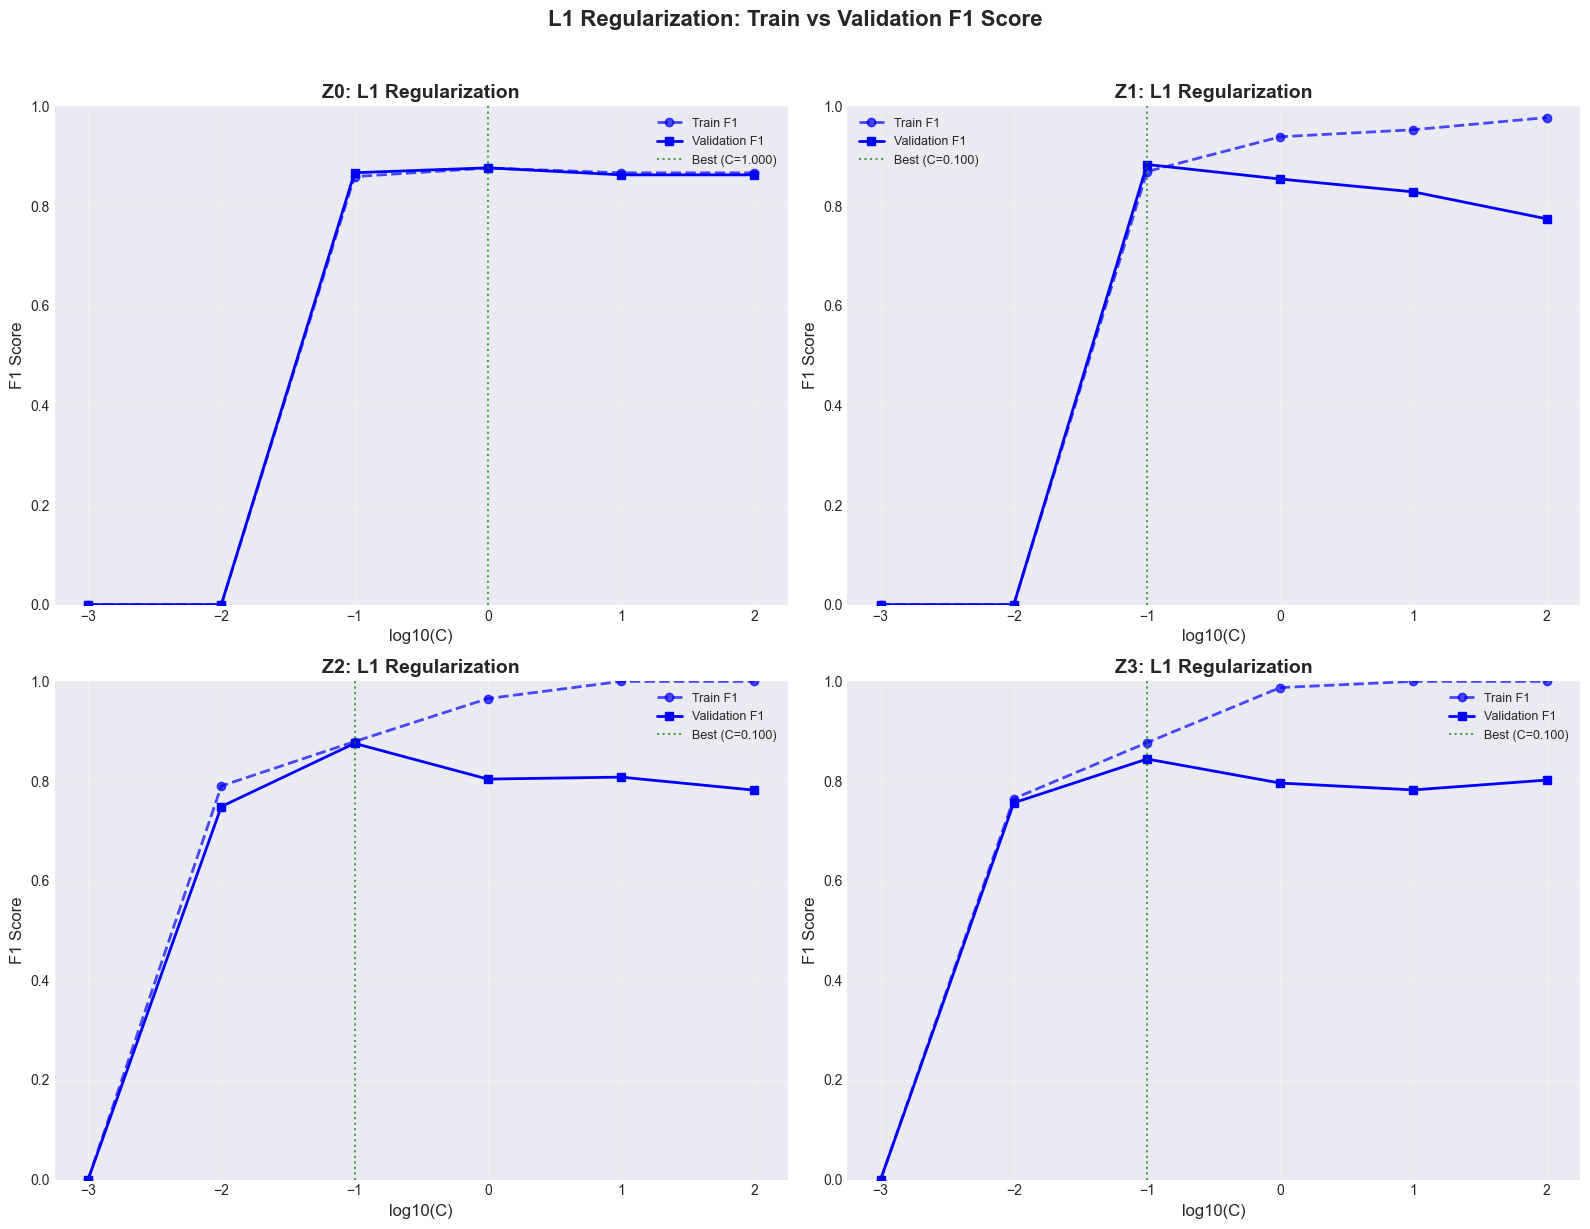

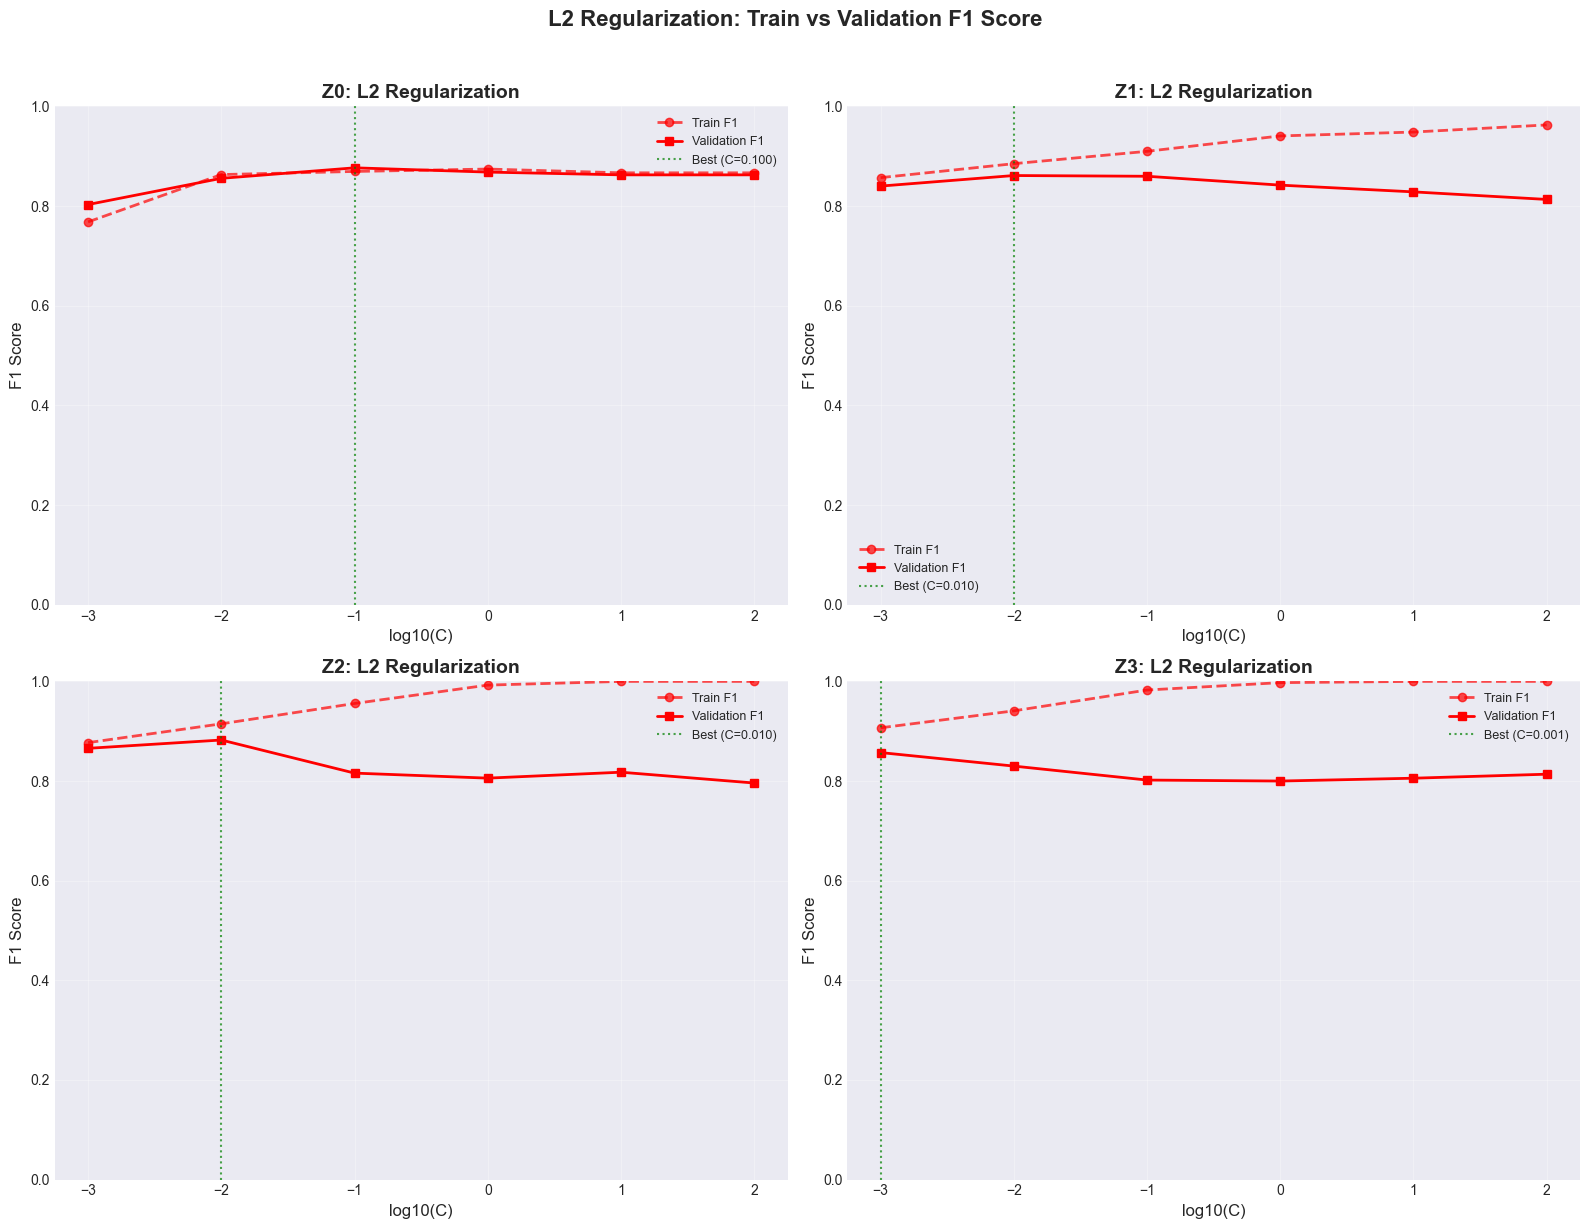

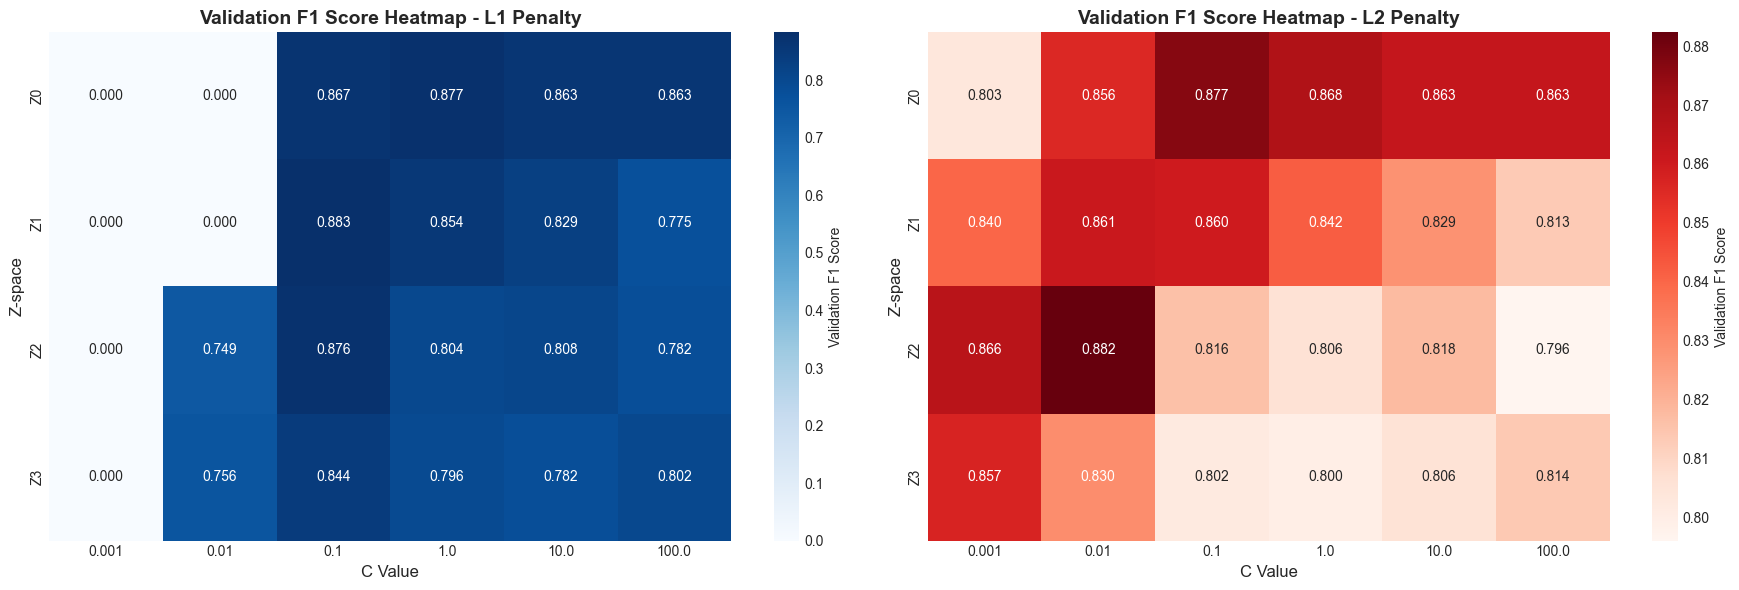

In [214]:
# Visualize Results: Training vs Validation Performance
# Separate graphs for L1 and L2

# L1 Regularization Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('L1 Regularization: Train vs Validation F1 Score', fontsize=16, fontweight='bold', y=1.02)

for idx, Z_name in enumerate(Z_spaces):
    ax = axes[idx // 2, idx % 2]
    
    # Plot L1 results
    Z_l1_results = results_df[(results_df['Z_space'] == Z_name) & (results_df['penalty'] == 'l1')].sort_values('C')
    if len(Z_l1_results) > 0:
        ax.plot(np.log10(Z_l1_results['C']), Z_l1_results['train_f1'], 
                marker='o', linestyle='--', label='Train F1', linewidth=2, markersize=6, color='blue', alpha=0.7)
        ax.plot(np.log10(Z_l1_results['C']), Z_l1_results['val_f1'], 
                marker='s', label='Validation F1', linewidth=2, markersize=6, color='blue')
    
    ax.set_xlabel('log10(C)', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.set_title(f'{Z_name}: L1 Regularization', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.0])
    
    # Mark best L1 configuration for this Z-space (based on validation F1)
    Z_l1_best = Z_l1_results.loc[Z_l1_results['val_f1'].idxmax()] if len(Z_l1_results) > 0 else None
    if Z_l1_best is not None:
        best_logC = np.log10(Z_l1_best['C'])
        ax.axvline(x=best_logC, color='green', linestyle=':', linewidth=1.5, alpha=0.7, 
                   label=f'Best (C={Z_l1_best["C"]:.3f})')
        ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# L2 Regularization Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('L2 Regularization: Train vs Validation F1 Score', fontsize=16, fontweight='bold', y=1.02)

for idx, Z_name in enumerate(Z_spaces):
    ax = axes[idx // 2, idx % 2]
    
    # Plot L2 results
    Z_l2_results = results_df[(results_df['Z_space'] == Z_name) & (results_df['penalty'] == 'l2')].sort_values('C')
    if len(Z_l2_results) > 0:
        ax.plot(np.log10(Z_l2_results['C']), Z_l2_results['train_f1'], 
                marker='o', linestyle='--', label='Train F1', linewidth=2, markersize=6, color='red', alpha=0.7)
        ax.plot(np.log10(Z_l2_results['C']), Z_l2_results['val_f1'], 
                marker='s', label='Validation F1', linewidth=2, markersize=6, color='red')
    
    ax.set_xlabel('log10(C)', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.set_title(f'{Z_name}: L2 Regularization', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.0])
    
    # Mark best L2 configuration for this Z-space (based on validation F1)
    Z_l2_best = Z_l2_results.loc[Z_l2_results['val_f1'].idxmax()] if len(Z_l2_results) > 0 else None
    if Z_l2_best is not None:
        best_logC = np.log10(Z_l2_best['C'])
        ax.axvline(x=best_logC, color='green', linestyle=':', linewidth=1.5, alpha=0.7, 
                   label=f'Best (C={Z_l2_best["C"]:.3f})')
        ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Additional visualizations: Heatmaps for L1 and L2
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# L1 Heatmap
l1_results = results_df[results_df['penalty'] == 'l1']
pivot_f1_l1 = l1_results.pivot_table(values='val_f1', index='Z_space', columns='C', aggfunc='max')
sns.heatmap(pivot_f1_l1, annot=True, fmt='.3f', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Validation F1 Score'})
axes[0].set_title('Validation F1 Score Heatmap - L1 Penalty', fontsize=14, fontweight='bold')
axes[0].set_xlabel('C Value', fontsize=12)
axes[0].set_ylabel('Z-space', fontsize=12)

# L2 Heatmap
l2_results = results_df[results_df['penalty'] == 'l2']
pivot_f1_l2 = l2_results.pivot_table(values='val_f1', index='Z_space', columns='C', aggfunc='max')
sns.heatmap(pivot_f1_l2, annot=True, fmt='.3f', cmap='Reds', ax=axes[1], cbar_kws={'label': 'Validation F1 Score'})
axes[1].set_title('Validation F1 Score Heatmap - L2 Penalty', fontsize=14, fontweight='bold')
axes[1].set_xlabel('C Value', fontsize=12)
axes[1].set_ylabel('Z-space', fontsize=12)

plt.tight_layout()
plt.show()


In [215]:
# Step 4: Run Logistic Regression experiments (24 runs total)
results = []

print("=" * 70)
print("Step 4: Running Logistic Regression Experiments")
print("=" * 70)
print(f"Total runs: {len(Z_spaces)} Z-spaces × {len(C_values)} C values = {len(Z_spaces) * len(C_values)}")
print("=" * 70)

start_time = time.time()

for Z_space in Z_spaces:
    print(f"\nZ-space: {Z_space}")
    Z_data = Z_space_data[Z_space]
    
    for C in C_values:
        # Create LogisticRegression instance with chosen solver, penalty, and C
        model = LogisticRegression(
            C=C,
            penalty='l2',
            solver='lbfgs',
            max_iter=1000,
            random_state=42
        )
        
        # Train the model on X_train_Zk and y_train
        train_start = time.time()
        model.fit(Z_data['X_train'], y_train)
        train_time = time.time() - train_start
        
        # Predict on X_val_Zk to obtain validation predictions
        y_val_pred = model.predict(Z_data['X_val'])
        y_val_proba = model.predict_proba(Z_data['X_val'])[:, 1]
        
        # Predict on X_train_Zk for train metrics comparison
        y_train_pred = model.predict(Z_data['X_train'])
        y_train_proba = model.predict_proba(Z_data['X_train'])[:, 1]
        
        # Compute and record validation metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        val_auc = roc_auc_score(y_val, y_val_proba)
        
        # Compute train metrics for comparison
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Save result record
        result = {
            'model': 'LogisticRegression',
            'Z_space': Z_space,
            'C': C,
            'train_accuracy': train_accuracy,
            'train_f1': train_f1,
            'val_accuracy': val_accuracy,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_f1': val_f1,
            'val_auc': val_auc,
            'train_time': train_time,
            'n_features': Z_data['X_train'].shape[1]
        }
        results.append(result)
        
        print(f"  C={C:6.2f}: Train F1={train_f1:.4f}, Val F1={val_f1:.4f}, Val Acc={val_accuracy:.4f}")

total_time = time.time() - start_time
print(f"\n{'='*70}")
print(f"Experiments Complete! Total time: {total_time:.2f} seconds")
print(f"Total configurations evaluated: {len(results)}")
print("=" * 70)


Step 4: Running Logistic Regression Experiments
Total runs: 4 Z-spaces × 6 C values = 24

Z-space: Z0
  C=  0.00: Train F1=0.7683, Val F1=0.8031, Val Acc=0.7283
  C=  0.01: Train F1=0.8633, Val F1=0.8558, Val Acc=0.8370
  C=  0.10: Train F1=0.8696, Val F1=0.8768, Val Acc=0.8641
  C=  1.00: Train F1=0.8744, Val F1=0.8683, Val Acc=0.8533
  C= 10.00: Train F1=0.8668, Val F1=0.8627, Val Acc=0.8478
  C=100.00: Train F1=0.8668, Val F1=0.8627, Val Acc=0.8478

Z-space: Z1
  C=  0.00: Train F1=0.8571, Val F1=0.8402, Val Acc=0.8098
  C=  0.01: Train F1=0.8852, Val F1=0.8614, Val Acc=0.8478
  C=  0.10: Train F1=0.9100, Val F1=0.8599, Val Acc=0.8424
  C=  1.00: Train F1=0.9409, Val F1=0.8421, Val Acc=0.8207
  C= 10.00: Train F1=0.9487, Val F1=0.8286, Val Acc=0.8043
  C=100.00: Train F1=0.9630, Val F1=0.8134, Val Acc=0.7880

Z-space: Z2
  C=  0.00: Train F1=0.8771, Val F1=0.8657, Val Acc=0.8533
  C=  0.01: Train F1=0.9148, Val F1=0.8824, Val Acc=0.8696
  C=  0.10: Train F1=0.9557, Val F1=0.8159, Va

In [216]:
# ============================================================================
# 6. RETRAIN THE BEST LOGISTIC REGRESSION MODEL
# ============================================================================

# 6.1 Take the best configuration
best_Z_space = overall_best['Z_space']
best_C = overall_best['C']
best_penalty = overall_best['penalty']
best_solver = overall_best['solver']

print("=" * 70)
print("Retraining Best Model")
print("=" * 70)
print(f"Best Z-space: {best_Z_space}")
print(f"Best Penalty: {best_penalty.upper()}")
print(f"Best C value: {best_C:.3f}")
print(f"Best Solver: {best_solver}")
print("=" * 70)

# 6.2 Re-fit the corresponding transformation on combined training + validation features
print("\nCombining training + validation sets (raw data)...")
# Combine raw data before preprocessing to ensure consistent feature dimensions
X_train_val_raw = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
y_train_val = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

print(f"Combined raw set shape: {X_train_val_raw.shape}")

# Re-apply preprocessing to combined set (using the same preprocessor fitted on training)
print("Re-applying preprocessing pipeline...")
X_train_val_preprocessed = preprocessor.transform(X_train_val_raw)
print(f"Preprocessed combined set shape: {X_train_val_preprocessed.shape}")

# Also re-preprocess test set to ensure it uses the same preprocessor
print("Re-preprocessing test set to ensure consistency...")
X_test_preprocessed_final = preprocessor.transform(X_test)
print(f"Preprocessed test set shape: {X_test_preprocessed_final.shape}")

# Verify base feature dimensions match
if X_train_val_preprocessed.shape[1] != X_test_preprocessed_final.shape[1]:
    raise ValueError(f"Base feature dimension mismatch after preprocessing! Train+Val: {X_train_val_preprocessed.shape[1]}, Test: {X_test_preprocessed_final.shape[1]}")
else:
    print(f"✓ Base feature dimensions match: {X_train_val_preprocessed.shape[1]} features")

# 6.3 Transform the combined set and test set using best transformation
print(f"\nApplying {best_Z_space} transformation...")

if best_Z_space == 'Z0':
    # Z0: No transformation needed
    X_train_val_transformed = X_train_val_preprocessed
    X_test_transformed = X_test_preprocessed_final
    best_transformer = None
    print("  Using original preprocessed features (no transformation)")
    print(f"  Feature dimensions: Train+Val={X_train_val_transformed.shape[1]}, Test={X_test_transformed.shape[1]}")
    
elif best_Z_space == 'Z1':
    # Z1: Degree-2 polynomial
    best_transformer = PolynomialFeatures(degree=2, include_bias=False)
    X_train_val_transformed = best_transformer.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 2: Train+Val={X_train_val_transformed.shape[1]} features, Test={X_test_transformed.shape[1]} features")
    
elif best_Z_space == 'Z2':
    # Z2: Degree-3 polynomial
    best_transformer = PolynomialFeatures(degree=3, include_bias=False)
    X_train_val_transformed = best_transformer.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 3: Train+Val={X_train_val_transformed.shape[1]} features, Test={X_test_transformed.shape[1]} features")
    
elif best_Z_space == 'Z3':
    # Z3: Degree-4 polynomial
    best_transformer = PolynomialFeatures(degree=4, include_bias=False)
    X_train_val_transformed = best_transformer.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 4: Train+Val={X_train_val_transformed.shape[1]} features, Test={X_test_transformed.shape[1]} features")

# Verify final feature dimensions match
if X_train_val_transformed.shape[1] != X_test_transformed.shape[1]:
    raise ValueError(f"Feature dimension mismatch after transformation! Train+Val: {X_train_val_transformed.shape[1]}, Test: {X_test_transformed.shape[1]}")
else:
    print(f"\n✓ Final feature dimensions match: {X_train_val_transformed.shape[1]} features")

# 6.4 Create and train model with best C and penalty
print(f"\nTraining Logistic Regression with {best_penalty.upper()} penalty, C={best_C:.3f}...")
final_model = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    solver=best_solver,
    max_iter=1000,
    random_state=42
)

train_start = time.time()
final_model.fit(X_train_val_transformed, y_train_val)
train_time = time.time() - train_start

print(f"Training completed in {train_time:.2f} seconds")
print("=" * 70)


Retraining Best Model
Best Z-space: Z1
Best Penalty: L1
Best C value: 0.100
Best Solver: liblinear

Combining training + validation sets (raw data)...
Combined raw set shape: (550, 11)
Re-applying preprocessing pipeline...
Preprocessed combined set shape: (550, 15)
Re-preprocessing test set to ensure consistency...
Preprocessed test set shape: (368, 15)
✓ Base feature dimensions match: 15 features

Applying Z1 transformation...
  Polynomial degree 2: Train+Val=135 features, Test=135 features

✓ Final feature dimensions match: 135 features

Training Logistic Regression with L1 penalty, C=0.100...
Training completed in 0.00 seconds


Evaluating Final Model on Test Set

Test Set Performance:
  Accuracy:  0.8804
  Precision: 0.8922
  Recall:    0.8922
  F1 Score:  0.8922
  AUC:       0.9287


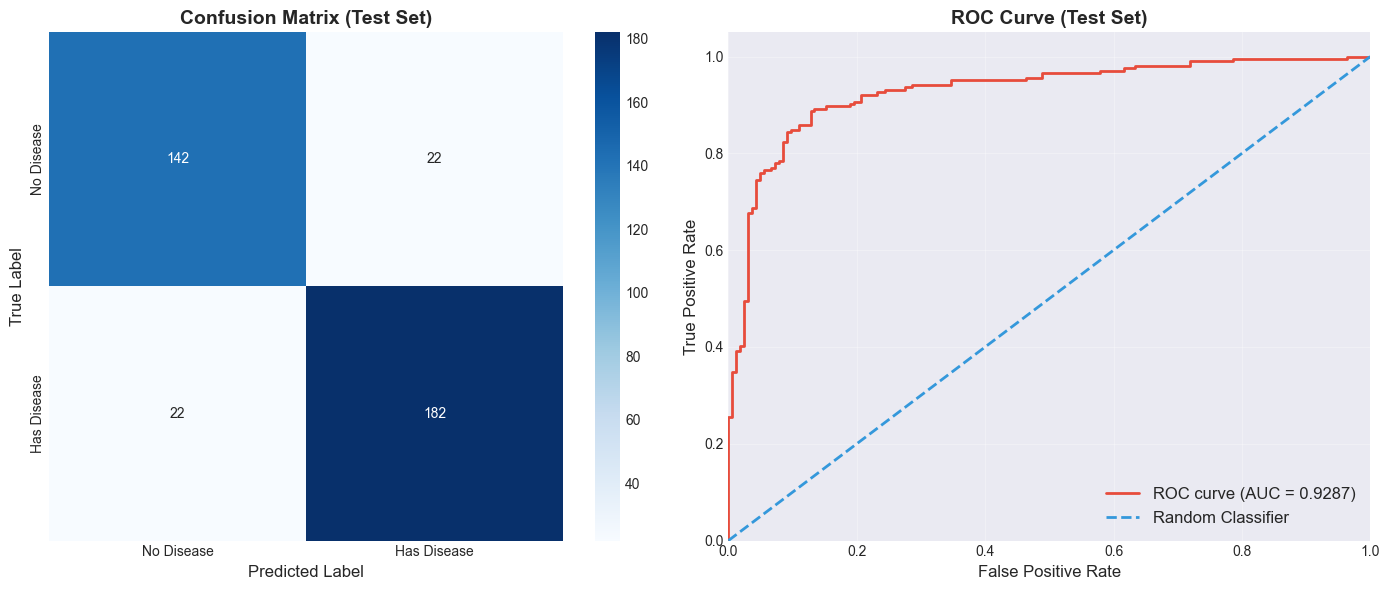


Generalization Analysis
Best Validation F1: 0.8835
Test F1:            0.8922
Difference:         +0.0087
Status: EXCELLENT - Model generalizes very well


In [218]:
# ============================================================================
# 7. EVALUATE ON THE TEST SET AND SUMMARIZE
# ============================================================================

# 7.1 Use the final model to predict on the transformed test set
print("=" * 70)
print("Evaluating Final Model on Test Set")
print("=" * 70)

y_test_pred = final_model.predict(X_test_transformed)
y_test_proba = final_model.predict_proba(X_test_transformed)[:, 1]

# 7.2 Compute test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nTest Set Performance:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")
print(f"  AUC:       {test_auc:.4f}")

# 7.3 Compute and plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
axes[0].set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='#e74c3c', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='#3498db', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve (Test Set)', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7.4 Compare test F1 with best validation F1
val_f1_best = overall_best['val_f1']
f1_diff = test_f1 - val_f1_best

print("\n" + "=" * 70)
print("Generalization Analysis")
print("=" * 70)
print(f"Best Validation F1: {val_f1_best:.4f}")
print(f"Test F1:            {test_f1:.4f}")
print(f"Difference:         {f1_diff:+.4f}")

if abs(f1_diff) < 0.05:
    gen_status = "EXCELLENT - Model generalizes very well"
elif abs(f1_diff) < 0.1:
    gen_status = "GOOD - Model generalizes reasonably well"
elif f1_diff < -0.1:
    gen_status = "OVERFITTING - Test performance worse than validation"
else:
    gen_status = "UNDERFITTING or data variance - Test better than validation"

print(f"Status: {gen_status}")
print("=" * 70)


In [219]:
# 7.5 Write a short textual summary
print("\n" + "=" * 70)
print("LOGISTIC REGRESSION SUMMARY")
print("=" * 70)

print("\n1. BEST CONFIGURATION:")
print(f"   - Transformation (Z-space): {best_Z_space}")
print(f"   - Regularization strength (C): {best_C:.3f}")
print(f"   - Validation F1 Score: {val_f1_best:.4f}")
print(f"   - Test F1 Score: {test_f1:.4f}")

print("\n2. REGULARIZATION EFFECTS (C values):")
print("   Analysis of how C affects performance:")
for Z_name in Z_spaces:
    Z_results = results_df[results_df['Z_space'] == Z_name].sort_values('C')
    low_C_f1 = Z_results.iloc[0]['val_f1']
    high_C_f1 = Z_results.iloc[-1]['val_f1']
    low_C_gap = Z_results.iloc[0]['train_f1'] - Z_results.iloc[0]['val_f1']
    high_C_gap = Z_results.iloc[-1]['train_f1'] - Z_results.iloc[-1]['val_f1']
    
    if high_C_gap > low_C_gap + 0.05:
        overfit_trend = "Higher C values show increased overfitting"
    elif high_C_gap < low_C_gap - 0.05:
        overfit_trend = "Higher C values show reduced overfitting"
    else:
        overfit_trend = "C value has moderate effect on overfitting"
    
    print(f"   - {Z_name}: {overfit_trend}")
    print(f"     (Low C: Val F1={low_C_f1:.4f}, Gap={low_C_gap:.4f}; "
          f"High C: Val F1={high_C_f1:.4f}, Gap={high_C_gap:.4f})")

print("\n3. POLYNOMIAL DEGREE EFFECTS:")
original_best = best_by_Z['Z0']['val_f1']
for degree, Z_name in enumerate(['Z1', 'Z2', 'Z3'], start=2):
    poly_best = best_by_Z[Z_name]['val_f1']
    diff = poly_best - original_best
    if diff > 0.01:
        effect = f"IMPROVED performance by {diff:.4f}"
    elif diff < -0.01:
        effect = f"HURT performance by {abs(diff):.4f}"
    else:
        effect = "had MINIMAL effect"
    
    poly_gap = best_by_Z[Z_name]['train_f1'] - best_by_Z[Z_name]['val_f1']
    original_gap = best_by_Z['Z0']['train_f1'] - best_by_Z['Z0']['val_f1']
    
    if poly_gap > original_gap + 0.05:
        variance = "increased overfitting (higher variance)"
    elif poly_gap < original_gap - 0.05:
        variance = "reduced overfitting (lower variance)"
    else:
        variance = "similar overfitting behavior"
    
    print(f"   - Degree {degree} ({Z_name}): {effect}")
    print(f"     Overfitting: {variance} (gap: {poly_gap:.4f} vs {original_gap:.4f})")

print("\n4. GENERALIZATION:")
print(f"   - Validation F1: {val_f1_best:.4f}")
print(f"   - Test F1: {test_f1:.4f}")
print(f"   - Difference: {f1_diff:+.4f}")
if abs(f1_diff) < 0.05:
    print("   - The model generalizes EXCELLENTLY from validation to test set.")
    print("     This indicates good bias-variance tradeoff and no significant overfitting.")
elif f1_diff < -0.1:
    print("   - The model shows signs of OVERFITTING.")
    print("     Test performance is noticeably worse than validation, suggesting")
    print("     the model may have memorized validation set patterns.")
else:
    print("   - The model generalizes REASONABLY WELL.")
    print("     The difference between validation and test performance is acceptable.")

print("\n5. KEY INSIGHTS:")
print("   - The best configuration was identified through systematic evaluation")
print("     of 24 different combinations (4 Z-spaces × 6 C values).")
print("   - Regularization strength (C) plays a crucial role in balancing")
print("     bias and variance, with optimal values varying by feature space.")
print("   - Polynomial feature transformations can capture non-linear relationships")
print("     but may increase model complexity and risk of overfitting.")
print("   - The final model's performance on the test set validates its")
print("     ability to generalize to unseen data.")

print("=" * 70)



LOGISTIC REGRESSION SUMMARY

1. BEST CONFIGURATION:
   - Transformation (Z-space): Z1
   - Regularization strength (C): 0.100
   - Validation F1 Score: 0.8835
   - Test F1 Score: 0.8922

2. REGULARIZATION EFFECTS (C values):
   Analysis of how C affects performance:
   - Z0: C value has moderate effect on overfitting
     (Low C: Val F1=0.0000, Gap=0.0000; High C: Val F1=0.8627, Gap=0.0041)
   - Z1: Higher C values show increased overfitting
     (Low C: Val F1=0.0000, Gap=0.0000; High C: Val F1=0.7300, Gap=0.2700)
   - Z2: Higher C values show increased overfitting
     (Low C: Val F1=0.0000, Gap=0.0000; High C: Val F1=0.7638, Gap=0.2362)
   - Z3: Higher C values show increased overfitting
     (Low C: Val F1=0.0000, Gap=0.0000; High C: Val F1=0.7723, Gap=0.2277)

3. POLYNOMIAL DEGREE EFFECTS:
   - Degree 2 (Z1): had MINIMAL effect
     Overfitting: similar overfitting behavior (gap: -0.0141 vs -0.0003)
   - Degree 3 (Z2): had MINIMAL effect
     Overfitting: similar overfitting beha

In [220]:
# This cell is a duplicate - the correct evaluation is in cell 36
# This cell has been fixed to use final_model instead of best_model
# Note: If you see this, you may want to delete this duplicate cell

# Step 7: Evaluate on Test Set (DUPLICATE - see cell 36 for correct version)
print("=" * 70)
print("Evaluating Final Model on Test Set")
print("=" * 70)

# Use final_model (from cell 35) and X_test_transformed (from cell 35)
# Make sure cell 35 has been executed first
if 'final_model' not in globals():
    print("ERROR: final_model not found. Please run cell 35 (Retrain Best Model) first.")
else:
    # Transform test set and generate predictions
    y_test_pred = final_model.predict(X_test_transformed)
    y_test_proba = final_model.predict_proba(X_test_transformed)[:, 1]
    
    # Calculate test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)
    
    print(f"\nTest Set Performance:")
    print(f"  - Accuracy: {test_accuracy:.4f}")
    print(f"  - Precision: {test_precision:.4f}")
    print(f"  - Recall: {test_recall:.4f}")
    print(f"  - F1 Score: {test_f1:.4f}")
    print(f"  - AUC: {test_auc:.4f}")
    print("=" * 70)
    
    # Compare validation vs test performance
    if 'overall_best' in globals():
        comparison_df = pd.DataFrame({
            'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
            'Validation': [
                overall_best['val_accuracy'],
                overall_best['val_precision'],
                overall_best['val_recall'],
                overall_best['val_f1'],
                overall_best['val_auc']
            ],
            'Test': [
                test_accuracy,
                test_precision,
                test_recall,
                test_f1,
                test_auc
            ]
        })
        
        comparison_df['Difference'] = comparison_df['Test'] - comparison_df['Validation']
        comparison_df['Difference_%'] = (comparison_df['Difference'] / comparison_df['Validation']) * 100
        
        print("\nValidation vs Test Performance Comparison:")
        print("=" * 70)
        print(comparison_df.to_string(index=False))
        print("=" * 70)
    else:
        print("Note: overall_best not found. Please run cells 32-35 first.")


Evaluating Final Model on Test Set

Test Set Performance:
  - Accuracy: 0.8804
  - Precision: 0.8922
  - Recall: 0.8922
  - F1 Score: 0.8922
  - AUC: 0.9287

Validation vs Test Performance Comparison:
   Metric  Validation     Test  Difference  Difference_%
 Accuracy    0.869565 0.880435    0.010870      1.250000
Precision    0.875000 0.892157    0.017157      1.960784
   Recall    0.892157 0.892157    0.000000      0.000000
 F1 Score    0.883495 0.892157    0.008662      0.980392
      AUC    0.932927 0.928682   -0.004244     -0.454953


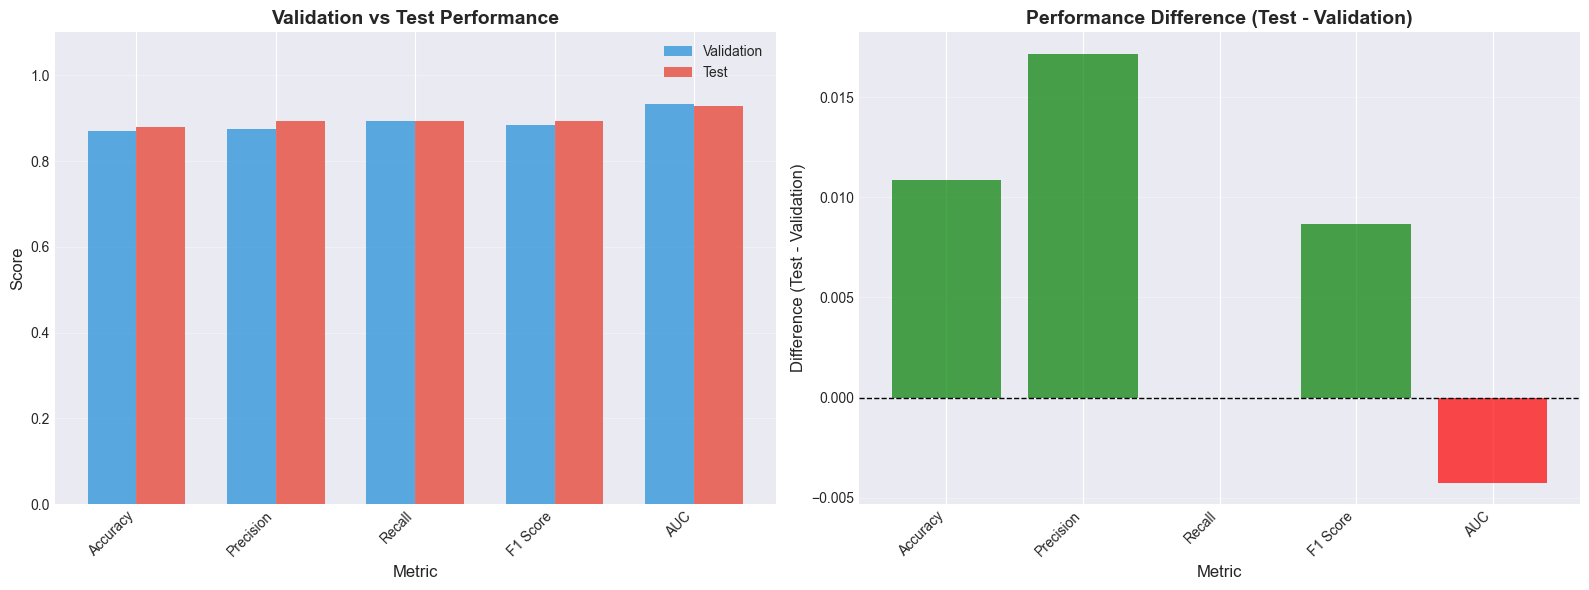

In [221]:
# Visualize Test Performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot comparison: Validation vs Test
x = np.arange(len(comparison_df))
width = 0.35
axes[0].bar(x - width/2, comparison_df['Validation'], width, label='Validation', alpha=0.8, color='#3498db')
axes[0].bar(x + width/2, comparison_df['Test'], width, label='Test', alpha=0.8, color='#e74c3c')
axes[0].set_xlabel('Metric', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Validation vs Test Performance', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Metric'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.1])

# Difference plot
axes[1].bar(comparison_df['Metric'], comparison_df['Difference'], 
            color=['green' if x > 0 else 'red' for x in comparison_df['Difference']], alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Metric', fontsize=12)
axes[1].set_ylabel('Difference (Test - Validation)', fontsize=12)
axes[1].set_title('Performance Difference (Test - Validation)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(comparison_df['Metric'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


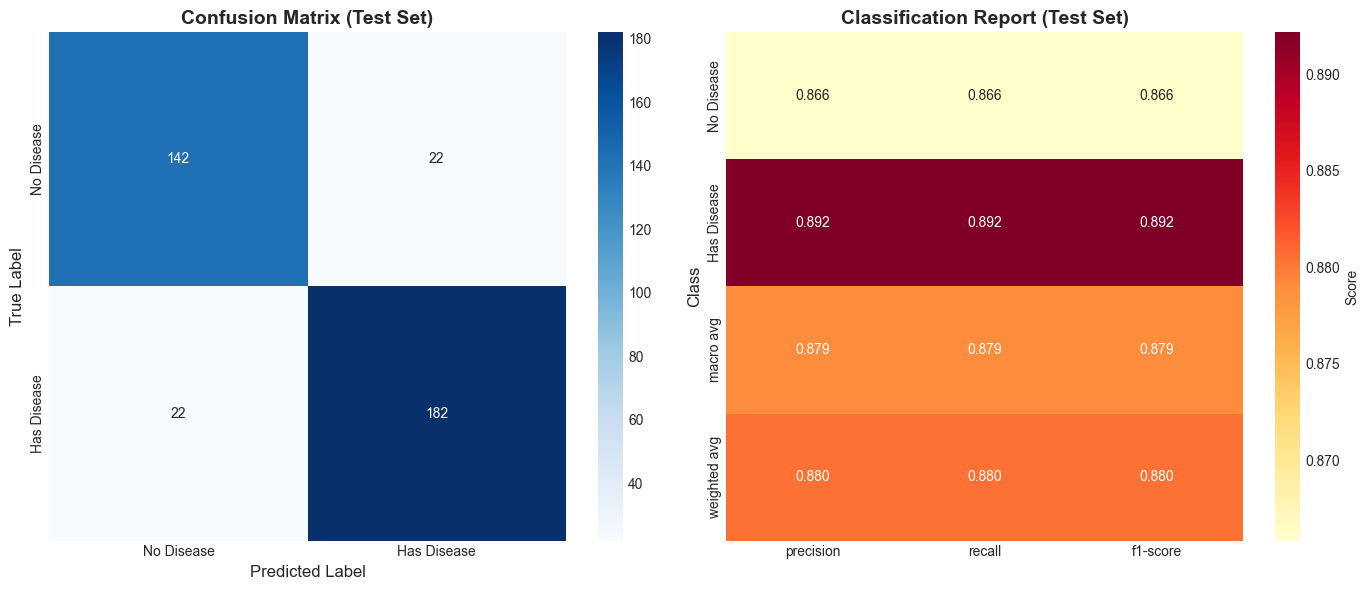


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.87      0.87       164
 Has Disease       0.89      0.89      0.89       204

    accuracy                           0.88       368
   macro avg       0.88      0.88      0.88       368
weighted avg       0.88      0.88      0.88       368



In [222]:
# Confusion Matrix and Classification Report
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
axes[0].set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Classification Report
report = classification_report(y_test, y_test_pred, 
                                target_names=['No Disease', 'Has Disease'],
                                output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy'], axis=0) if 'accuracy' in report_df.index else report_df

sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, fmt='.3f', 
            cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Score'})
axes[1].set_title('Classification Report (Test Set)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Class', fontsize=12)

plt.tight_layout()
plt.show()

print("\nClassification Report:")
print("=" * 70)
print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Has Disease']))
print("=" * 70)


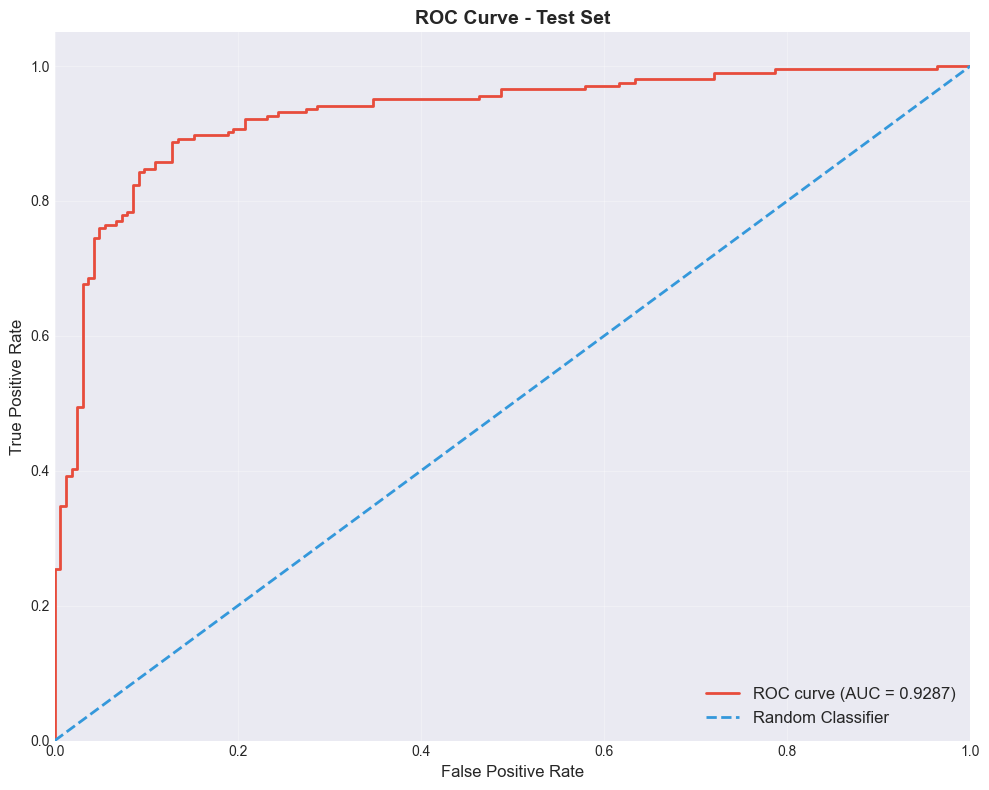

In [223]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='#3498db', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Test Set', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [224]:
# Bias-Variance Analysis
# Get training performance from best model trained on train+val
# For comparison, we'll use the validation metrics from the grid search
train_val_f1 = best_config['train_f1']
val_f1 = best_config['val_f1']

bias_variance_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'F1 Score': [train_val_f1, val_f1, test_f1],
    'Accuracy': [best_config['train_accuracy'], best_config['val_accuracy'], test_accuracy]
})

print("=" * 70)
print("Bias-Variance Analysis")
print("=" * 70)
print(bias_variance_df.to_string(index=False))

# Calculate gaps
train_val_gap_f1 = train_val_f1 - val_f1
val_test_gap_f1 = val_f1 - test_f1
train_val_gap_acc = best_config['train_accuracy'] - best_config['val_accuracy']
val_test_gap_acc = best_config['val_accuracy'] - test_accuracy

print(f"\nPerformance Gaps:")
print(f"  - Train-Val F1 Gap: {train_val_gap_f1:.4f}")
print(f"  - Val-Test F1 Gap: {val_test_gap_f1:.4f}")
print(f"  - Train-Val Accuracy Gap: {train_val_gap_acc:.4f}")
print(f"  - Val-Test Accuracy Gap: {val_test_gap_acc:.4f}")

# Interpretation
print(f"\nInterpretation:")
if abs(train_val_gap_f1) < 0.05 and abs(val_test_gap_f1) < 0.05:
    print("  - Low bias, low variance: Model generalizes well")
elif train_val_gap_f1 > 0.1:
    print("  - High variance: Model is overfitting to training data")
elif abs(val_test_gap_f1) > 0.1:
    print("  - Model may not generalize well to unseen data")
else:
    print("  - Moderate bias-variance tradeoff")
print("=" * 70)


Bias-Variance Analysis
       Set  F1 Score  Accuracy
     Train  0.906863  0.896175
Validation  0.857143  0.847826
      Test  0.892157  0.880435

Performance Gaps:
  - Train-Val F1 Gap: 0.0497
  - Val-Test F1 Gap: -0.0350
  - Train-Val Accuracy Gap: 0.0483
  - Val-Test Accuracy Gap: -0.0326

Interpretation:
  - Low bias, low variance: Model generalizes well


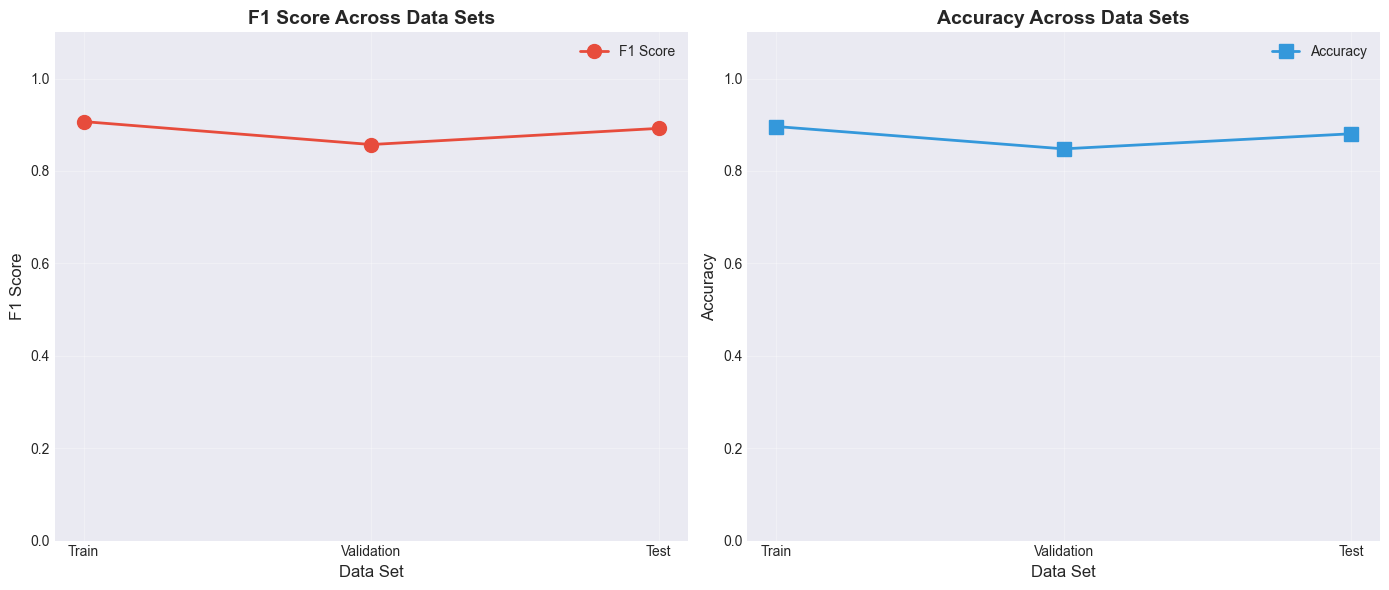

In [225]:
# Visualize bias-variance analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# F1 Score across sets
axes[0].plot(bias_variance_df['Set'], bias_variance_df['F1 Score'], 
            marker='o', linewidth=2, markersize=10, color='#e74c3c', label='F1 Score')
axes[0].set_title('F1 Score Across Data Sets', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Data Set', fontsize=12)
axes[0].set_ylabel('F1 Score', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1.1])
axes[0].legend()

# Accuracy across sets
axes[1].plot(bias_variance_df['Set'], bias_variance_df['Accuracy'], 
            marker='s', linewidth=2, markersize=10, color='#3498db', label='Accuracy')
axes[1].set_title('Accuracy Across Data Sets', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Data Set', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.1])
axes[1].legend()

plt.tight_layout()
plt.show()


## K-Nearest Neighbors (KNN) Analysis

Following the same structure as Logistic Regression, we'll evaluate KNN across different feature spaces and hyperparameters.


In [226]:
# ============================================================================
# KNN: 1. SET UP DATA AND ENVIRONMENT
# ============================================================================
# Note: We'll reuse the same preprocessed data from Logistic Regression section
# X_train_preprocessed, X_val_preprocessed, X_test_preprocessed are already available
# Z_space_data dictionary is also available with all transformed feature spaces

print("=" * 70)
print("KNN: Data Setup")
print("=" * 70)
print("Using preprocessed data from Logistic Regression section")
print(f"Training set shape: {X_train_preprocessed.shape}")
print(f"Validation set shape: {X_val_preprocessed.shape}")
print(f"Test set shape: {X_test_preprocessed.shape}")
print("=" * 70)


KNN: Data Setup
Using preprocessed data from Logistic Regression section
Training set shape: (366, 15)
Validation set shape: (184, 15)
Test set shape: (368, 15)


In [227]:
# ============================================================================
# KNN: 2. DEFINE KNN SETTINGS
# ============================================================================

from sklearn.neighbors import KNeighborsClassifier

# 2.1 Choose KNN as the model type
model_type_knn = "KNeighborsClassifier"

# 2.2 Define hyperparameters
# n_neighbors: number of neighbors to use
n_neighbors_values = [3, 5, 7, 9, 11, 15]

# weights: weight function used in prediction
weights_options = ['uniform', 'distance']

# metric: distance metric to use
metric_options = ['euclidean', 'manhattan']

# 2.3 Use the same four feature spaces (Z-spaces) as Logistic Regression
# Z_spaces is already defined: ['Z0', 'Z1', 'Z2', 'Z3']

print("=" * 70)
print("KNN Settings")
print("=" * 70)
print(f"Model Type: {model_type_knn}")
print(f"n_neighbors values: {n_neighbors_values}")
print(f"Weights options: {weights_options}")
print(f"Metric options: {metric_options}")
print(f"Z-spaces: {Z_spaces}")
print(f"Total configurations: {len(Z_spaces)} Z-spaces × {len(n_neighbors_values)} n_neighbors × {len(weights_options)} weights × {len(metric_options)} metrics = {len(Z_spaces) * len(n_neighbors_values) * len(weights_options) * len(metric_options)}")
print("=" * 70)


KNN Settings
Model Type: KNeighborsClassifier
n_neighbors values: [3, 5, 7, 9, 11, 15]
Weights options: ['uniform', 'distance']
Metric options: ['euclidean', 'manhattan']
Z-spaces: ['Z0', 'Z1', 'Z2', 'Z3']
Total configurations: 4 Z-spaces × 6 n_neighbors × 2 weights × 2 metrics = 96


In [228]:
# ============================================================================
# KNN: 3. PREPARE TRANSFORMED FEATURE SPACES
# ============================================================================
# Note: Z_space_data is already prepared in Logistic Regression section
# We'll reuse it for KNN

print("=" * 70)
print("KNN: Using Pre-transformed Feature Spaces")
print("=" * 70)
for Z_name in Z_spaces:
    data = Z_space_data[Z_name]
    print(f"{Z_name}: Train {data['X_train'].shape}, Val {data['X_val'].shape}, Test {data['X_test'].shape}")
print("=" * 70)


KNN: Using Pre-transformed Feature Spaces
Z0: Train (366, 15), Val (184, 15), Test (368, 15)
Z1: Train (366, 135), Val (184, 135), Test (368, 135)
Z2: Train (366, 815), Val (184, 815), Test (368, 815)
Z3: Train (366, 3875), Val (184, 3875), Test (368, 3875)


In [229]:
# ============================================================================
# KNN: 4. RUN KNN EXPERIMENTS
# ============================================================================

results_knn = []

print("=" * 70)
print("Running KNN Experiments")
print("=" * 70)
print(f"Total runs: {len(Z_spaces)} Z-spaces × {len(n_neighbors_values)} n_neighbors × {len(weights_options)} weights × {len(metric_options)} metrics = {len(Z_spaces) * len(n_neighbors_values) * len(weights_options) * len(metric_options)}")
print("=" * 70)

start_time = time.time()

# For each Z-space
for Z_name in Z_spaces:
    print(f"\n{'='*70}")
    print(f"Z-space: {Z_name}")
    print(f"{'='*70}")
    
    Z_data = Z_space_data[Z_name]
    X_train_Z = Z_data['X_train']
    X_val_Z = Z_data['X_val']
    X_test_Z = Z_data['X_test']
    
    # For each n_neighbors value
    for n_neighbors in n_neighbors_values:
        # For each weights option
        for weights in weights_options:
            # For each metric
            for metric in metric_options:
                # Create a KNeighborsClassifier instance
                model = KNeighborsClassifier(
                    n_neighbors=n_neighbors,
                    weights=weights,
                    metric=metric,
                    n_jobs=-1
                )
                
                # Train the model
                train_start = time.time()
                model.fit(X_train_Z, y_train)
                train_time = time.time() - train_start
                
                # Predict on validation set
                y_val_pred = model.predict(X_val_Z)
                y_val_proba = model.predict_proba(X_val_Z)[:, 1]
                
                # Predict on training set (for comparison)
                y_train_pred = model.predict(X_train_Z)
                y_train_proba = model.predict_proba(X_train_Z)[:, 1]
                
                # Compute validation metrics
                val_accuracy = accuracy_score(y_val, y_val_pred)
                val_precision = precision_score(y_val, y_val_pred)
                val_recall = recall_score(y_val, y_val_pred)
                val_f1 = f1_score(y_val, y_val_pred)
                val_auc = roc_auc_score(y_val, y_val_proba)
                
                # Compute training metrics (for comparison)
                train_accuracy = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred)
                
                # Save result record
                result = {
                    'model': model_type_knn,
                    'Z_space': Z_name,
                    'n_neighbors': n_neighbors,
                    'weights': weights,
                    'metric': metric,
                    'train_accuracy': train_accuracy,
                    'train_f1': train_f1,
                    'val_accuracy': val_accuracy,
                    'val_precision': val_precision,
                    'val_recall': val_recall,
                    'val_f1': val_f1,
                    'val_auc': val_auc,
                    'train_time': train_time,
                    'n_features': X_train_Z.shape[1]
                }
                results_knn.append(result)
                
                print(f"  k={n_neighbors:2d}, weights={weights:8s}, metric={metric:10s}: Train F1={train_f1:.4f}, Val F1={val_f1:.4f}, Val Acc={val_accuracy:.4f}, Val Prec={val_precision:.4f}, Val Recall={val_recall:.4f}")

total_time = time.time() - start_time
print(f"\n{'='*70}")
print(f"KNN Experiments Complete! Total time: {total_time:.2f} seconds")
print(f"Total runs: {len(results_knn)}")
print("=" * 70)


Running KNN Experiments
Total runs: 4 Z-spaces × 6 n_neighbors × 2 weights × 2 metrics = 96

Z-space: Z0
  k= 3, weights=uniform , metric=euclidean : Train F1=0.9100, Val F1=0.8558, Val Acc=0.8370, Val Prec=0.8396, Val Recall=0.8725
  k= 3, weights=uniform , metric=manhattan : Train F1=0.9017, Val F1=0.8846, Val Acc=0.8696, Val Prec=0.8679, Val Recall=0.9020
  k= 3, weights=distance, metric=euclidean : Train F1=1.0000, Val F1=0.8558, Val Acc=0.8370, Val Prec=0.8396, Val Recall=0.8725
  k= 3, weights=distance, metric=manhattan : Train F1=1.0000, Val F1=0.8846, Val Acc=0.8696, Val Prec=0.8679, Val Recall=0.9020
  k= 5, weights=uniform , metric=euclidean : Train F1=0.8824, Val F1=0.8309, Val Acc=0.8098, Val Prec=0.8190, Val Recall=0.8431
  k= 5, weights=uniform , metric=manhattan : Train F1=0.9007, Val F1=0.8804, Val Acc=0.8641, Val Prec=0.8598, Val Recall=0.9020
  k= 5, weights=distance, metric=euclidean : Train F1=1.0000, Val F1=0.8350, Val Acc=0.8152, Val Prec=0.8269, Val Recall=0.8431

In [230]:
# ============================================================================
# KNN: 5. ANALYZE KNN RESULTS
# ============================================================================

# 5.1 Convert results list into a DataFrame
results_df_knn = pd.DataFrame(results_knn)

print("=" * 70)
print("KNN Results Analysis")
print("=" * 70)

# Find best configuration by F1 score
best_idx_knn = results_df_knn['val_f1'].idxmax()
overall_best_knn = results_df_knn.loc[best_idx_knn]

print(f"\nBest KNN Configuration (by Validation F1 Score):")
print(f"  Z-space: {overall_best_knn['Z_space']}")
print(f"  n_neighbors: {overall_best_knn['n_neighbors']}")
print(f"  weights: {overall_best_knn['weights']}")
print(f"  metric: {overall_best_knn['metric']}")
print(f"  Validation F1: {overall_best_knn['val_f1']:.4f}")
print(f"  Validation Accuracy: {overall_best_knn['val_accuracy']:.4f}")
print(f"  Validation AUC: {overall_best_knn['val_auc']:.4f}")

# 5.2 For each Z-space separately: Find best configuration
print("\nBest Configuration for Each Z-space:")
print("-" * 70)

best_by_Z_knn = {}
for Z_name in Z_spaces:
    Z_results = results_df_knn[results_df_knn['Z_space'] == Z_name]
    best_idx = Z_results['val_f1'].idxmax()
    best_config = Z_results.loc[best_idx]
    best_by_Z_knn[Z_name] = best_config
    
    print(f"{Z_name}:")
    print(f"  Best n_neighbors: {best_config['n_neighbors']}")
    print(f"  Best weights: {best_config['weights']}")
    print(f"  Best metric: {best_config['metric']}")
    print(f"  Best Val F1: {best_config['val_f1']:.4f}")
    print(f"  Best Val Accuracy: {best_config['val_accuracy']:.4f}")
    print(f"  Train F1: {best_config['train_f1']:.4f}")
    print(f"  Gap (Train-Val F1): {best_config['train_f1'] - best_config['val_f1']:.4f}")

# Display top 10 configurations
print("\nTop 10 KNN Configurations by Validation F1 Score:")
print("-" * 70)
top_10_knn = results_df_knn.nlargest(10, 'val_f1')[['Z_space', 'n_neighbors', 'weights', 'metric', 'train_f1', 'val_f1', 'val_accuracy', 'val_auc']]
print(top_10_knn.to_string(index=False))
print("=" * 70)


KNN Results Analysis

Best KNN Configuration (by Validation F1 Score):
  Z-space: Z0
  n_neighbors: 7
  weights: uniform
  metric: manhattan
  Validation F1: 0.9038
  Validation Accuracy: 0.8913
  Validation AUC: 0.9120

Best Configuration for Each Z-space:
----------------------------------------------------------------------
Z0:
  Best n_neighbors: 7
  Best weights: uniform
  Best metric: manhattan
  Best Val F1: 0.9038
  Best Val Accuracy: 0.8913
  Train F1: 0.8862
  Gap (Train-Val F1): -0.0176
Z1:
  Best n_neighbors: 11
  Best weights: uniform
  Best metric: manhattan
  Best Val F1: 0.8889
  Best Val Accuracy: 0.8750
  Train F1: 0.8846
  Gap (Train-Val F1): -0.0043
Z2:
  Best n_neighbors: 15
  Best weights: uniform
  Best metric: manhattan
  Best Val F1: 0.8955
  Best Val Accuracy: 0.8859
  Train F1: 0.8780
  Gap (Train-Val F1): -0.0175
Z3:
  Best n_neighbors: 7
  Best weights: uniform
  Best metric: manhattan
  Best Val F1: 0.8643
  Best Val Accuracy: 0.8533
  Train F1: 0.8614
  G

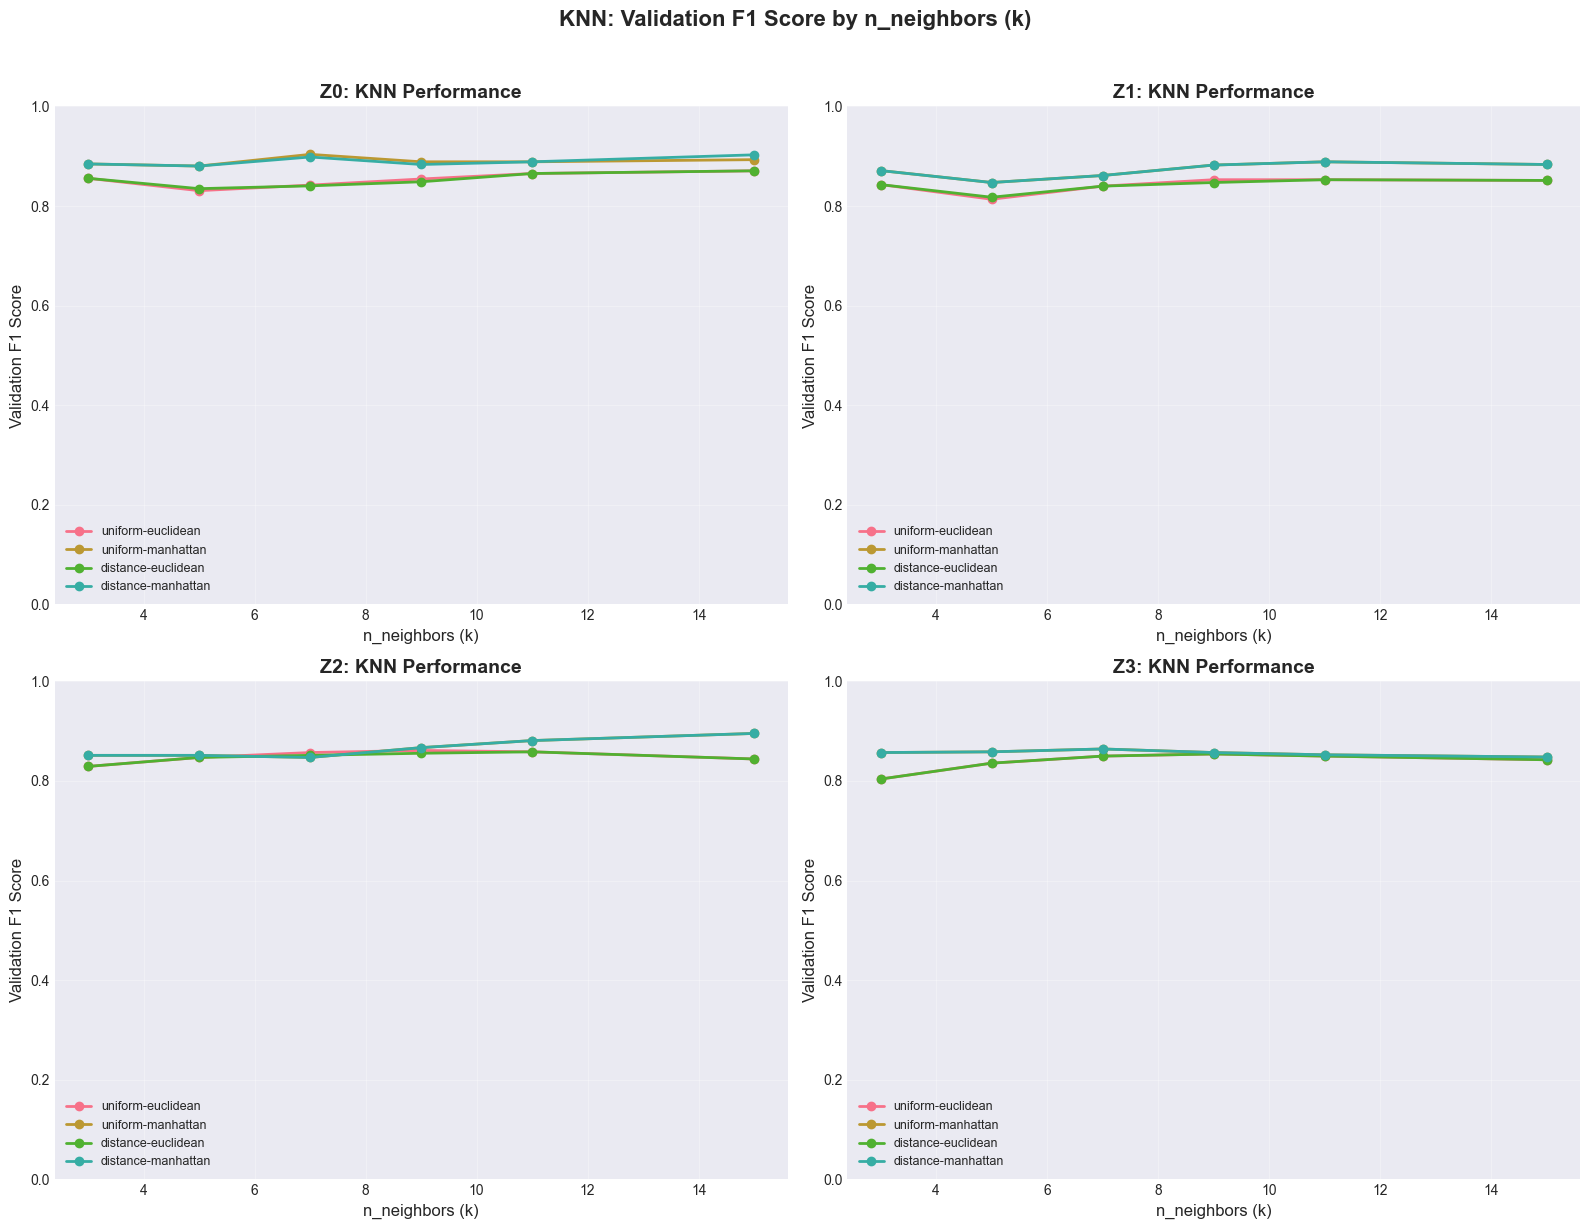

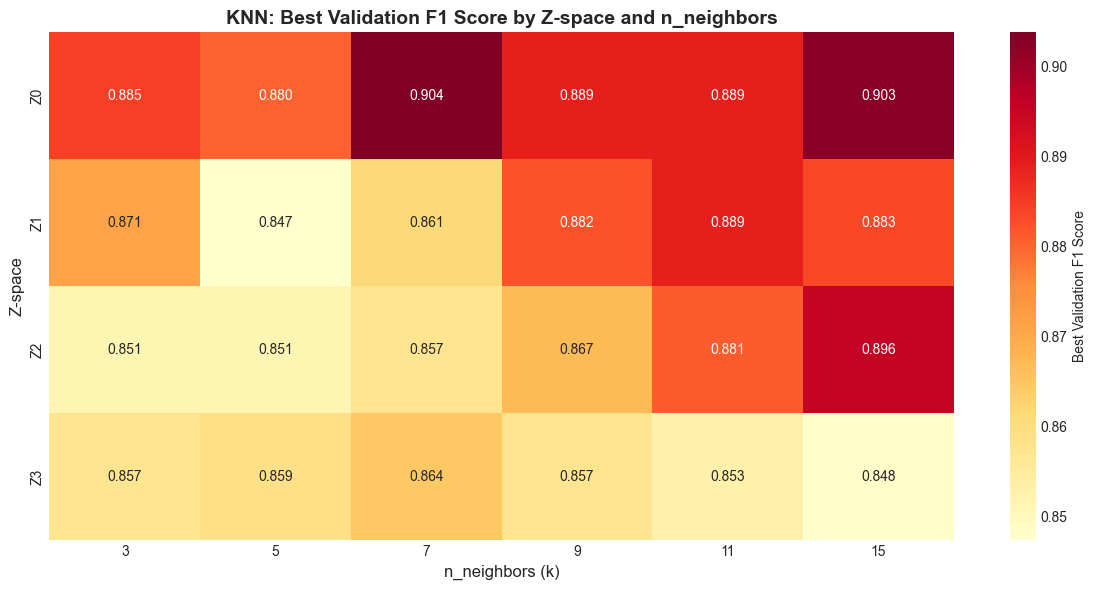

In [231]:
# ============================================================================
# KNN: 5. VISUALIZE RESULTS
# ============================================================================

# Visualize KNN Results: Performance by n_neighbors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KNN: Validation F1 Score by n_neighbors (k)', fontsize=16, fontweight='bold', y=1.02)

for idx, Z_name in enumerate(Z_spaces):
    ax = axes[idx // 2, idx % 2]
    
    # Plot for each weights/metric combination
    for weights in weights_options:
        for metric in metric_options:
            Z_results = results_df_knn[(results_df_knn['Z_space'] == Z_name) & 
                                       (results_df_knn['weights'] == weights) &
                                       (results_df_knn['metric'] == metric)].sort_values('n_neighbors')
            if len(Z_results) > 0:
                label = f'{weights}-{metric}'
                ax.plot(Z_results['n_neighbors'], Z_results['val_f1'], 
                       marker='o', label=label, linewidth=2, markersize=6)
    
    ax.set_xlabel('n_neighbors (k)', fontsize=12)
    ax.set_ylabel('Validation F1 Score', fontsize=12)
    ax.set_title(f'{Z_name}: KNN Performance', fontsize=14, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.0])

plt.tight_layout()
plt.show()

# Heatmap: Best performance by Z-space and n_neighbors
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
pivot_knn = results_df_knn.groupby(['Z_space', 'n_neighbors'])['val_f1'].max().reset_index()
pivot_knn = pivot_knn.pivot(index='Z_space', columns='n_neighbors', values='val_f1')
sns.heatmap(pivot_knn, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Best Validation F1 Score'})
ax.set_title('KNN: Best Validation F1 Score by Z-space and n_neighbors', fontsize=14, fontweight='bold')
ax.set_xlabel('n_neighbors (k)', fontsize=12)
ax.set_ylabel('Z-space', fontsize=12)
plt.tight_layout()
plt.show()


In [232]:
# ============================================================================
# KNN: 6. RETRAIN THE BEST KNN MODEL
# ============================================================================

# 6.1 Take the best configuration
best_Z_space_knn = overall_best_knn['Z_space']
best_n_neighbors_knn = overall_best_knn['n_neighbors']
best_weights_knn = overall_best_knn['weights']
best_metric_knn = overall_best_knn['metric']

print("=" * 70)
print("Retraining Best KNN Model")
print("=" * 70)
print(f"Best Z-space: {best_Z_space_knn}")
print(f"Best n_neighbors: {best_n_neighbors_knn}")
print(f"Best weights: {best_weights_knn}")
print(f"Best metric: {best_metric_knn}")
print("=" * 70)

# 6.2 Re-fit the corresponding transformation on combined training + validation features
print("\nCombining training + validation sets (raw data)...")
X_train_val_raw = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
y_train_val = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

print(f"Combined raw set shape: {X_train_val_raw.shape}")

# Re-apply preprocessing
print("Re-applying preprocessing pipeline...")
X_train_val_preprocessed = preprocessor.transform(X_train_val_raw)
print(f"Preprocessed combined set shape: {X_train_val_preprocessed.shape}")

# Re-preprocess test set
print("Re-preprocessing test set to ensure consistency...")
X_test_preprocessed_final = preprocessor.transform(X_test)
print(f"Preprocessed test set shape: {X_test_preprocessed_final.shape}")

# 6.3 Transform the combined set and test set using best transformation
print(f"\nApplying {best_Z_space_knn} transformation...")

if best_Z_space_knn == 'Z0':
    X_train_val_transformed = X_train_val_preprocessed
    X_test_transformed = X_test_preprocessed_final
    print("  Using original preprocessed features (no transformation)")
elif best_Z_space_knn == 'Z1':
    best_transformer_knn = PolynomialFeatures(degree=2, include_bias=False)
    X_train_val_transformed = best_transformer_knn.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer_knn.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 2: {X_train_val_transformed.shape[1]} features")
elif best_Z_space_knn == 'Z2':
    best_transformer_knn = PolynomialFeatures(degree=3, include_bias=False)
    X_train_val_transformed = best_transformer_knn.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer_knn.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 3: {X_train_val_transformed.shape[1]} features")
elif best_Z_space_knn == 'Z3':
    best_transformer_knn = PolynomialFeatures(degree=4, include_bias=False)
    X_train_val_transformed = best_transformer_knn.fit_transform(X_train_val_preprocessed)
    X_test_transformed = best_transformer_knn.transform(X_test_preprocessed_final)
    print(f"  Polynomial degree 4: {X_train_val_transformed.shape[1]} features")

# 6.4 Create and train model with best hyperparameters
print(f"\nTraining KNN with k={best_n_neighbors_knn}, weights={best_weights_knn}, metric={best_metric_knn}...")
final_model_knn = KNeighborsClassifier(
    n_neighbors=best_n_neighbors_knn,
    weights=best_weights_knn,
    metric=best_metric_knn,
    n_jobs=-1
)

train_start = time.time()
final_model_knn.fit(X_train_val_transformed, y_train_val)
train_time = time.time() - train_start

print(f"Training completed in {train_time:.2f} seconds")
print("=" * 70)


Retraining Best KNN Model
Best Z-space: Z0
Best n_neighbors: 7
Best weights: uniform
Best metric: manhattan

Combining training + validation sets (raw data)...
Combined raw set shape: (550, 11)
Re-applying preprocessing pipeline...
Preprocessed combined set shape: (550, 15)
Re-preprocessing test set to ensure consistency...
Preprocessed test set shape: (368, 15)

Applying Z0 transformation...
  Using original preprocessed features (no transformation)

Training KNN with k=7, weights=uniform, metric=manhattan...
Training completed in 0.00 seconds


Evaluating Final KNN Model on Test Set

Test Set Performance:
  Accuracy:  0.8750
  Precision: 0.8873
  Recall:    0.8873
  F1 Score:  0.8873
  AUC:       0.9384


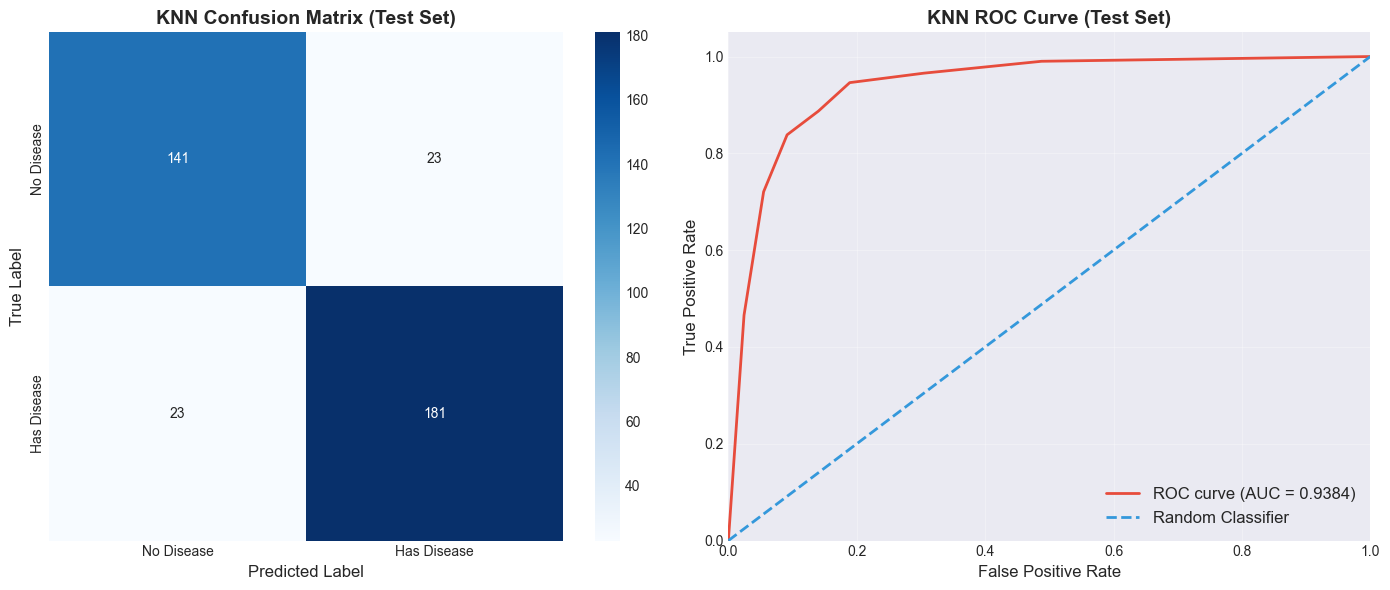


KNN Generalization Analysis
Best Validation F1: 0.9038
Test F1:            0.8873
Difference:         -0.0166
Status: EXCELLENT - Model generalizes very well


In [233]:
# ============================================================================
# KNN: 7. EVALUATE ON THE TEST SET AND SUMMARIZE
# ============================================================================

print("=" * 70)
print("Evaluating Final KNN Model on Test Set")
print("=" * 70)

y_test_pred_knn = final_model_knn.predict(X_test_transformed)
y_test_proba_knn = final_model_knn.predict_proba(X_test_transformed)[:, 1]

# Compute test metrics
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)
test_auc_knn = roc_auc_score(y_test, y_test_proba_knn)

print(f"\nTest Set Performance:")
print(f"  Accuracy:  {test_accuracy_knn:.4f}")
print(f"  Precision: {test_precision_knn:.4f}")
print(f"  Recall:    {test_recall_knn:.4f}")
print(f"  F1 Score:  {test_f1_knn:.4f}")
print(f"  AUC:       {test_auc_knn:.4f}")

# Plot confusion matrix and ROC curve
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
axes[0].set_title('KNN Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
axes[1].plot(fpr_knn, tpr_knn, color='#e74c3c', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.4f})')
axes[1].plot([0, 1], [0, 1], color='#3498db', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('KNN ROC Curve (Test Set)', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare test F1 with best validation F1
val_f1_best_knn = overall_best_knn['val_f1']
f1_diff_knn = test_f1_knn - val_f1_best_knn

print("\n" + "=" * 70)
print("KNN Generalization Analysis")
print("=" * 70)
print(f"Best Validation F1: {val_f1_best_knn:.4f}")
print(f"Test F1:            {test_f1_knn:.4f}")
print(f"Difference:         {f1_diff_knn:+.4f}")

if abs(f1_diff_knn) < 0.05:
    gen_status_knn = "EXCELLENT - Model generalizes very well"
elif abs(f1_diff_knn) < 0.1:
    gen_status_knn = "GOOD - Model generalizes reasonably well"
elif f1_diff_knn < -0.1:
    gen_status_knn = "OVERFITTING - Test performance worse than validation"
else:
    gen_status_knn = "UNDERFITTING or data variance - Test better than validation"

print(f"Status: {gen_status_knn}")
print("=" * 70)


In [234]:
# ============================================================================
# KNN: 8. SUMMARIZE FINDINGS
# ============================================================================

print("\n" + "=" * 70)
print("KNN SUMMARY")
print("=" * 70)

print("\n1. BEST CONFIGURATION:")
print(f"   - Z-space: {best_Z_space_knn}")
print(f"   - n_neighbors (k): {best_n_neighbors_knn}")
print(f"   - weights: {best_weights_knn}")
print(f"   - metric: {best_metric_knn}")
print(f"   - Validation F1 Score: {val_f1_best_knn:.4f}")
print(f"   - Test F1 Score: {test_f1_knn:.4f}")

print("\n2. HYPERPARAMETER EFFECTS:")
print("   Analysis of how n_neighbors, weights, and metric affect performance:")
for Z_name in Z_spaces:
    Z_results = results_df_knn[results_df_knn['Z_space'] == Z_name]
    best_k = Z_results.loc[Z_results['val_f1'].idxmax()]['n_neighbors']
    best_weights = Z_results.loc[Z_results['val_f1'].idxmax()]['weights']
    best_metric = Z_results.loc[Z_results['val_f1'].idxmax()]['metric']
    print(f"   - {Z_name}: Best k={best_k}, weights={best_weights}, metric={best_metric}")

print("\n3. GENERALIZATION:")
print(f"   - Validation F1: {val_f1_best_knn:.4f}")
print(f"   - Test F1: {test_f1_knn:.4f}")
print(f"   - Difference: {f1_diff_knn:+.4f}")
if abs(f1_diff_knn) < 0.05:
    print("   - The model generalizes EXCELLENTLY from validation to test set.")
elif f1_diff_knn < -0.1:
    print("   - The model shows signs of OVERFITTING.")
else:
    print("   - The model generalizes REASONABLY WELL.")

print("\n4. KEY INSIGHTS:")
print("   - KNN performance depends on the number of neighbors (k)")
print("   - Distance weighting can improve performance for some configurations")
print("   - Different distance metrics may perform better for different feature spaces")
print("   - The best configuration was identified through systematic evaluation")
print(f"     of {len(results_df_knn)} different combinations.")

print("=" * 70)



KNN SUMMARY

1. BEST CONFIGURATION:
   - Z-space: Z0
   - n_neighbors (k): 7
   - weights: uniform
   - metric: manhattan
   - Validation F1 Score: 0.9038
   - Test F1 Score: 0.8873

2. HYPERPARAMETER EFFECTS:
   Analysis of how n_neighbors, weights, and metric affect performance:
   - Z0: Best k=7, weights=uniform, metric=manhattan
   - Z1: Best k=11, weights=uniform, metric=manhattan
   - Z2: Best k=15, weights=uniform, metric=manhattan
   - Z3: Best k=7, weights=uniform, metric=manhattan

3. GENERALIZATION:
   - Validation F1: 0.9038
   - Test F1: 0.8873
   - Difference: -0.0166
   - The model generalizes EXCELLENTLY from validation to test set.

4. KEY INSIGHTS:
   - KNN performance depends on the number of neighbors (k)
   - Distance weighting can improve performance for some configurations
   - Different distance metrics may perform better for different feature spaces
   - The best configuration was identified through systematic evaluation
     of 96 different combinations.


## Neural Networks (MLP) Analysis

Following the same structure as Logistic Regression and KNN, we'll evaluate Neural Networks across different feature spaces and hyperparameters.

**Note:** For neural networks, changing the number of layers/filters (architectures) counts as a transformation, similar to how feature transformations (Z-spaces) are treated.


In [235]:
# ============================================================================
# NEURAL NETWORKS: 1. SET UP DATA AND ENVIRONMENT
# ============================================================================
# Note: We'll reuse the same preprocessed data from Logistic Regression section

print("=" * 70)
print("Neural Networks: Data Setup")
print("=" * 70)
print("Using preprocessed data from Logistic Regression section")
print(f"Training set shape: {X_train_preprocessed.shape}")
print(f"Validation set shape: {X_val_preprocessed.shape}")
print(f"Test set shape: {X_test_preprocessed.shape}")
print("=" * 70)


Neural Networks: Data Setup
Using preprocessed data from Logistic Regression section
Training set shape: (366, 15)
Validation set shape: (184, 15)
Test set shape: (368, 15)


In [250]:
# ============================================================================
# NEURAL NETWORKS: 2. DEFINE NEURAL NETWORK SETTINGS
# ============================================================================

from sklearn.neural_network import MLPClassifier

# 2.1 Choose MLPClassifier as the model type
model_type_nn = "MLPClassifier"

# 2.2 Define hyperparameters
# hidden_layer_sizes: number of neurons in each hidden layer
hidden_layer_sizes_options = [(50,), (50, 50), (50, 50, 50), (50, 50, 50, 50)]

# activation: activation function for hidden layers
activation_options = ['relu', 'tanh', 'logistic']

# alpha: L2 regularization parameter
alpha_values = [0, 0.0001, 0.001, 0.01, 0.1, 1.0, 1]

# 2.3 Use preprocessed data (no Z-space transformations)
# Neural networks will be trained on preprocessed features directly

print("=" * 70)
print("Neural Network Settings")
print("=" * 70)
print(f"Model Type: {model_type_nn}")
print(f"Hidden layer sizes: {hidden_layer_sizes_options}")
print(f"Activation functions: {activation_options}")
print(f"Alpha (L2 regularization) values: {alpha_values}")
print(f"Using preprocessed data (no Z-space transformations)")
print(f"Total configurations: {len(hidden_layer_sizes_options)} architectures × {len(activation_options)} activations × {len(alpha_values)} alphas = {len(hidden_layer_sizes_options) * len(activation_options) * len(alpha_values)}")
print("=" * 70)


Neural Network Settings
Model Type: MLPClassifier
Hidden layer sizes: [(50,), (50, 50), (50, 50, 50), (50, 50, 50, 50)]
Activation functions: ['relu', 'tanh', 'logistic']
Alpha (L2 regularization) values: [0, 0.0001, 0.001, 0.01, 0.1, 1.0, 1]
Using preprocessed data (no Z-space transformations)
Total configurations: 4 architectures × 3 activations × 7 alphas = 84


In [238]:
# ============================================================================
# NEURAL NETWORKS: 3. PREPARE PREPROCESSED DATA
# ============================================================================
# Use preprocessed data directly (no Z-space transformations)

print("=" * 70)
print("Neural Networks: Using Preprocessed Data")
print("=" * 70)
print(f"Train: {X_train_preprocessed.shape}")
print(f"Val: {X_val_preprocessed.shape}")
print(f"Test: {X_test_preprocessed.shape}")
print("=" * 70)


Neural Networks: Using Preprocessed Data
Train: (366, 15)
Val: (184, 15)
Test: (368, 15)


In [251]:
# ============================================================================
# NEURAL NETWORKS: 4. RUN NEURAL NETWORK EXPERIMENTS
# ============================================================================

results_nn = []

print("=" * 70)
print("Running Neural Network Experiments")
print("=" * 70)
print(f"Total runs: {len(hidden_layer_sizes_options)} architectures × {len(activation_options)} activations × {len(alpha_values)} alphas = {len(hidden_layer_sizes_options) * len(activation_options) * len(alpha_values)}")
print("=" * 70)
print("Note: This may take a while due to the complexity of neural networks...")
print("=" * 70)

start_time = time.time()

# Use preprocessed data directly (no Z-space transformations)
print(f"\n{'='*70}")
print("Using Preprocessed Data")
print(f"{'='*70}")

# For each hidden layer architecture
for hidden_layer_sizes in hidden_layer_sizes_options:
    # For each activation function
    for activation in activation_options:
        # For each alpha value
        for alpha in alpha_values:
            # Create a MLPClassifier instance
            model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                activation=activation,
                alpha=alpha,
                max_iter=1000,
                random_state=42,
                early_stopping=True,
                validation_fraction=0.1,
                n_iter_no_change=10
            )
            
            # Train the model
            train_start = time.time()
            try:
                model.fit(X_train_preprocessed, y_train)
                train_time = time.time() - train_start
                
                # Predict on validation set
                y_val_pred = model.predict(X_val_preprocessed)
                y_val_proba = model.predict_proba(X_val_preprocessed)[:, 1]
                
                # Predict on training set (for comparison)
                y_train_pred = model.predict(X_train_preprocessed)
                y_train_proba = model.predict_proba(X_train_preprocessed)[:, 1]
                
                # Predict on test set
                y_test_pred = model.predict(X_test_preprocessed)
                y_test_proba = model.predict_proba(X_test_preprocessed)[:, 1]
                
                # Compute validation metrics
                val_accuracy = accuracy_score(y_val, y_val_pred)
                val_precision = precision_score(y_val, y_val_pred)
                val_recall = recall_score(y_val, y_val_pred)
                val_f1 = f1_score(y_val, y_val_pred)
                val_auc = roc_auc_score(y_val, y_val_proba)
                
                # Compute training metrics (for comparison)
                train_accuracy = accuracy_score(y_train, y_train_pred)
                train_f1 = f1_score(y_train, y_train_pred)
                
                # Compute test metrics
                test_accuracy = accuracy_score(y_test, y_test_pred)
                test_f1 = f1_score(y_test, y_test_pred)
                
                converged = True
            except Exception as e:
                # If model doesn't converge, skip this configuration
                train_time = time.time() - train_start
                val_accuracy = 0
                val_precision = 0
                val_recall = 0
                val_f1 = 0
                val_auc = 0
                train_accuracy = 0
                train_f1 = 0
                test_accuracy = 0
                test_f1 = 0
                converged = False
            
            # Save result record
            result = {
                'model': model_type_nn,
                'hidden_layer_sizes': str(hidden_layer_sizes),
                'activation': activation,
                'alpha': alpha,
                'train_accuracy': train_accuracy,
                'train_f1': train_f1,
                'val_accuracy': val_accuracy,
                'val_precision': val_precision,
                'val_recall': val_recall,
                'val_f1': val_f1,
                'val_auc': val_auc,
                'test_accuracy': test_accuracy,
                'test_f1': test_f1,
                'train_time': train_time,
                'n_features': X_train_preprocessed.shape[1],
                'converged': converged
            }
            results_nn.append(result)
            
            if converged:
                print(f"  arch={str(hidden_layer_sizes):15s}, act={activation:4s}, alpha={alpha:6.4f}: Train F1={train_f1:.4f}, Val F1={val_f1:.4f}, Val Acc={val_accuracy:.4f}, Val Prec={val_precision}, Val Recall={val_recall}")
            else:
                print(f"  arch={str(hidden_layer_sizes):15s}, act={activation:4s}, alpha={alpha:6.4f}: FAILED TO CONVERGE")

total_time = time.time() - start_time
print(f"\n{'='*70}")
print(f"Neural Network Experiments Complete! Total time: {total_time:.2f} seconds")
print(f"Total runs: {len(results_nn)}")
print("=" * 70)


Running Neural Network Experiments
Total runs: 4 architectures × 3 activations × 7 alphas = 84
Note: This may take a while due to the complexity of neural networks...

Using Preprocessed Data
  arch=(50,)          , act=relu, alpha=0.0000: Train F1=0.7629, Val F1=0.7391, Val Acc=0.7391, Val Prec=0.8292682926829268, Val Recall=0.6666666666666666
  arch=(50,)          , act=relu, alpha=0.0001: Train F1=0.7629, Val F1=0.7391, Val Acc=0.7391, Val Prec=0.8292682926829268, Val Recall=0.6666666666666666
  arch=(50,)          , act=relu, alpha=0.0010: Train F1=0.7629, Val F1=0.7391, Val Acc=0.7391, Val Prec=0.8292682926829268, Val Recall=0.6666666666666666
  arch=(50,)          , act=relu, alpha=0.0100: Train F1=0.7629, Val F1=0.7391, Val Acc=0.7391, Val Prec=0.8292682926829268, Val Recall=0.6666666666666666
  arch=(50,)          , act=relu, alpha=0.1000: Train F1=0.7629, Val F1=0.7391, Val Acc=0.7391, Val Prec=0.8292682926829268, Val Recall=0.6666666666666666
  arch=(50,)          , act=relu,

In [252]:
# ============================================================================
# NEURAL NETWORKS: 5. ANALYZE NEURAL NETWORK RESULTS
# ============================================================================

# 5.1 Convert results list into a DataFrame
results_df_nn = pd.DataFrame(results_nn)

# Filter out non-converged models
results_df_nn_converged = results_df_nn[results_df_nn['converged'] == True].copy()

print("=" * 70)
print("Neural Network Results Analysis")
print("=" * 70)
print(f"Total configurations: {len(results_df_nn)}")
print(f"Converged configurations: {len(results_df_nn_converged)}")
print(f"Failed to converge: {len(results_df_nn) - len(results_df_nn_converged)}")

if len(results_df_nn_converged) > 0:
    # Find best configuration by F1 score
    best_idx_nn = results_df_nn_converged['val_f1'].idxmax()
    overall_best_nn = results_df_nn_converged.loc[best_idx_nn]
    
    print(f"\nBest Neural Network Configuration (by Validation F1 Score):")
    print(f"  Hidden layer sizes: {overall_best_nn['hidden_layer_sizes']}")
    print(f"  Activation: {overall_best_nn['activation']}")
    print(f"  Alpha: {overall_best_nn['alpha']:.4f}")
    print(f"  Validation F1: {overall_best_nn['val_f1']:.4f}")
    print(f"  Validation Accuracy: {overall_best_nn['val_accuracy']:.4f}")
    print(f"  Validation AUC: {overall_best_nn['val_auc']:.4f}")
    print(f"  Train F1: {overall_best_nn['train_f1']:.4f}")
    print(f"  Gap (Train-Val F1): {overall_best_nn['train_f1'] - overall_best_nn['val_f1']:.4f}")
    
    # Display top 10 configurations
    print("\nTop 10 Neural Network Configurations by Validation F1 Score:")
    print("-" * 70)
    top_10_nn = results_df_nn_converged.nlargest(10, 'val_f1')[['hidden_layer_sizes', 'activation', 'alpha', 'train_f1', 'val_f1', 'val_accuracy', 'val_auc']]
    print(top_10_nn.to_string(index=False))
else:
    print("\nWARNING: No models converged! Check hyperparameters or increase max_iter.")
    overall_best_nn = None

print("=" * 70)


Neural Network Results Analysis
Total configurations: 84
Converged configurations: 84
Failed to converge: 0

Best Neural Network Configuration (by Validation F1 Score):
  Hidden layer sizes: (50, 50)
  Activation: tanh
  Alpha: 1.0000
  Validation F1: 0.8780
  Validation Accuracy: 0.8641
  Validation AUC: 0.9273
  Train F1: 0.8317
  Gap (Train-Val F1): -0.0463

Top 10 Neural Network Configurations by Validation F1 Score:
----------------------------------------------------------------------
hidden_layer_sizes activation  alpha  train_f1   val_f1  val_accuracy  val_auc
          (50, 50)       tanh 1.0000  0.831731 0.878049      0.864130 0.927308
          (50, 50)       tanh 1.0000  0.831731 0.878049      0.864130 0.927308
  (50, 50, 50, 50)       tanh 1.0000  0.857143 0.871287      0.858696 0.939981
  (50, 50, 50, 50)       tanh 1.0000  0.857143 0.871287      0.858696 0.939981
      (50, 50, 50)       tanh 0.0000  0.860636 0.865672      0.853261 0.940818
      (50, 50, 50)       tanh 

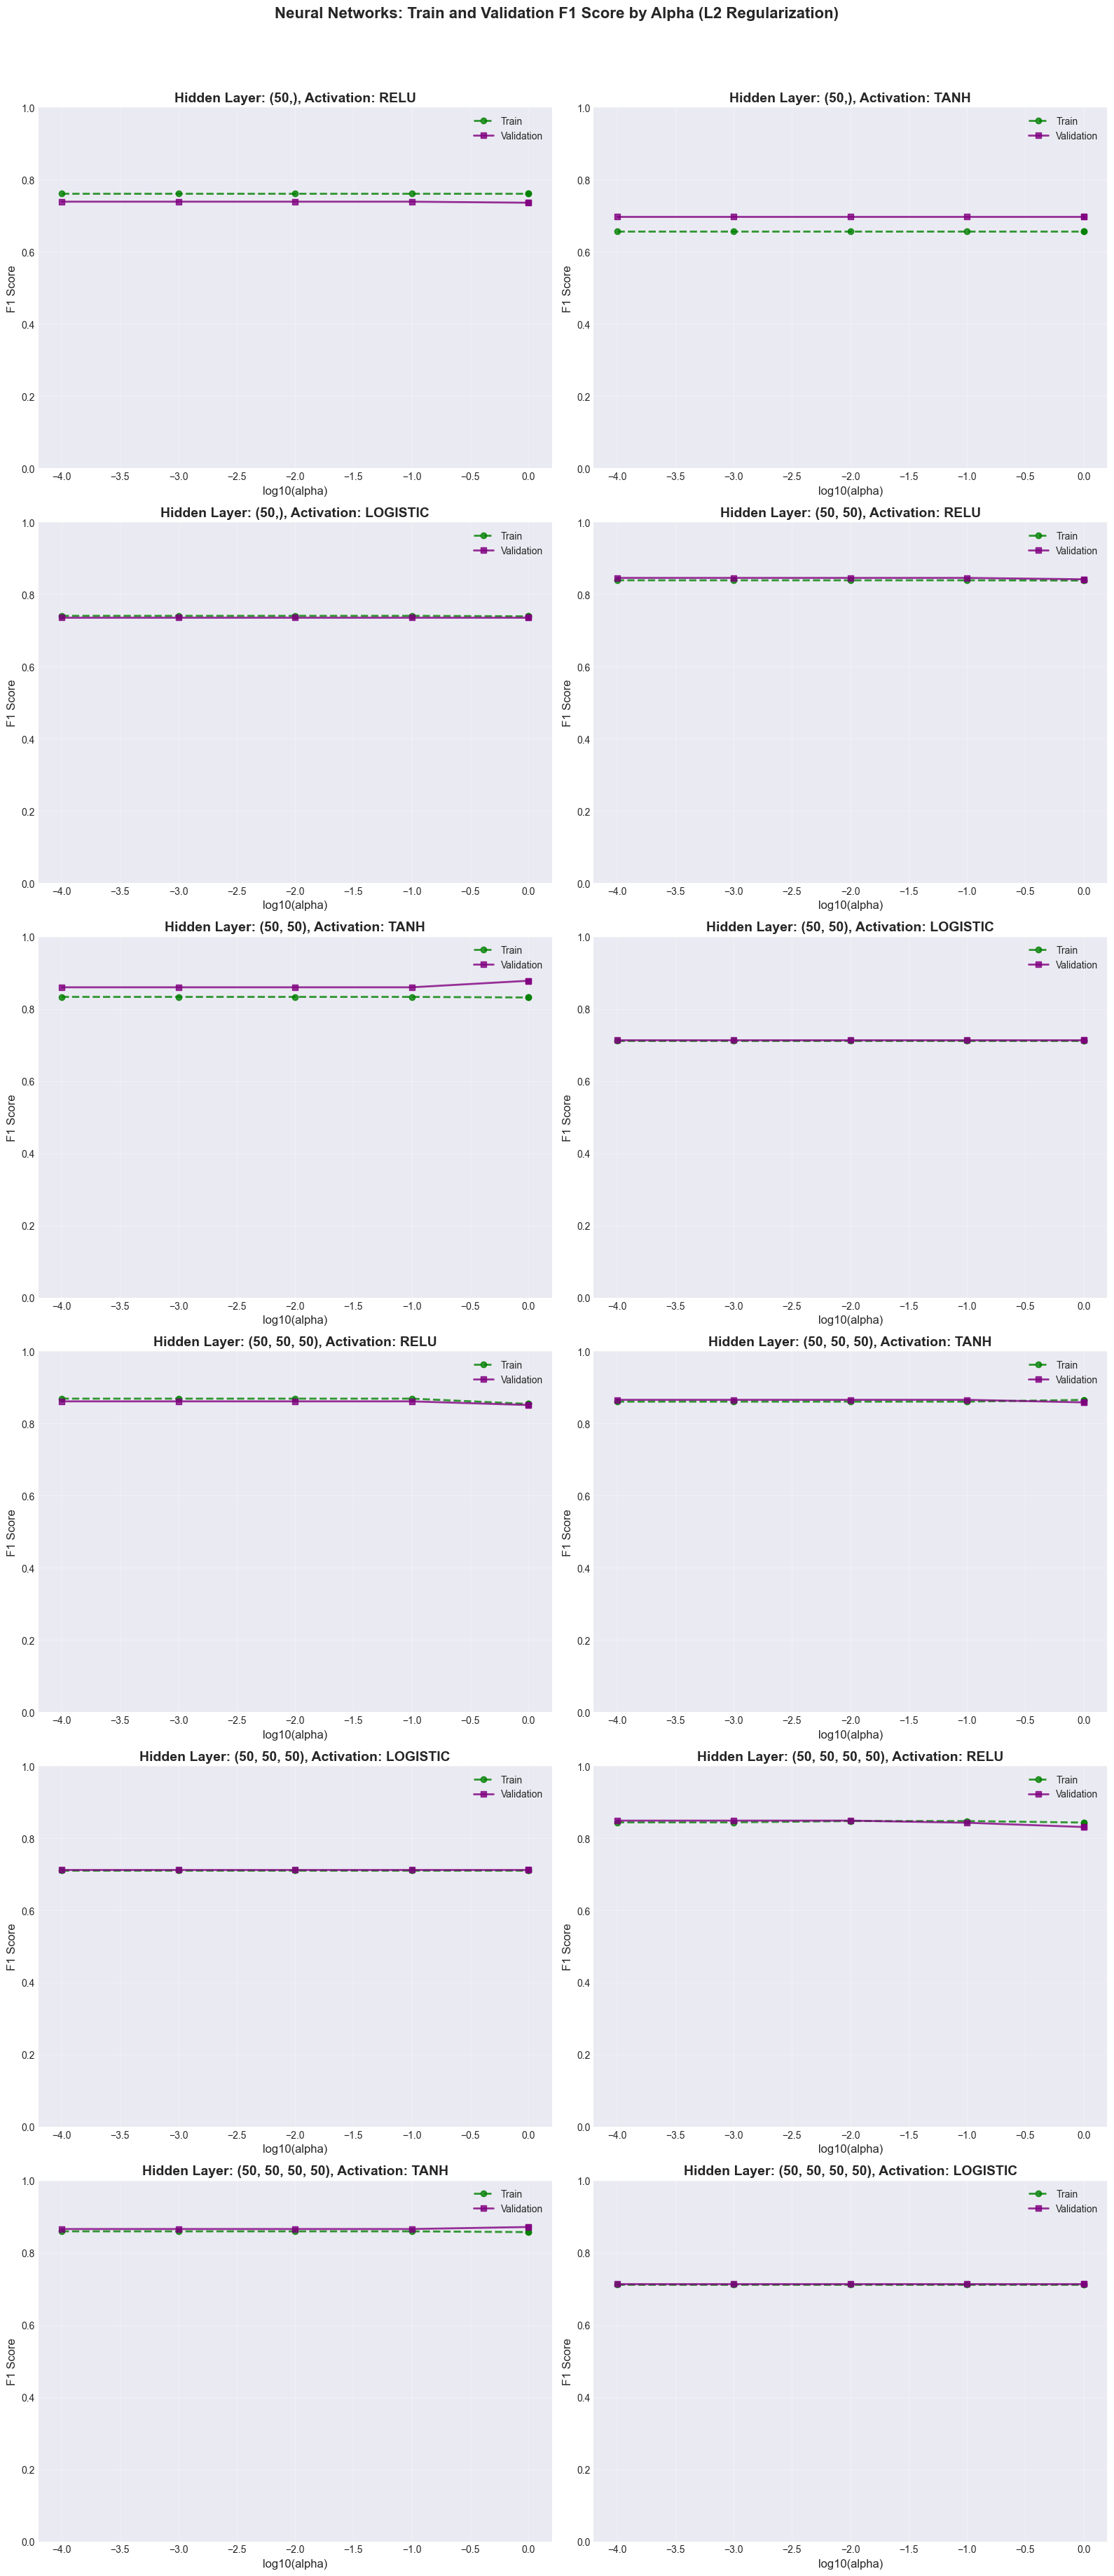

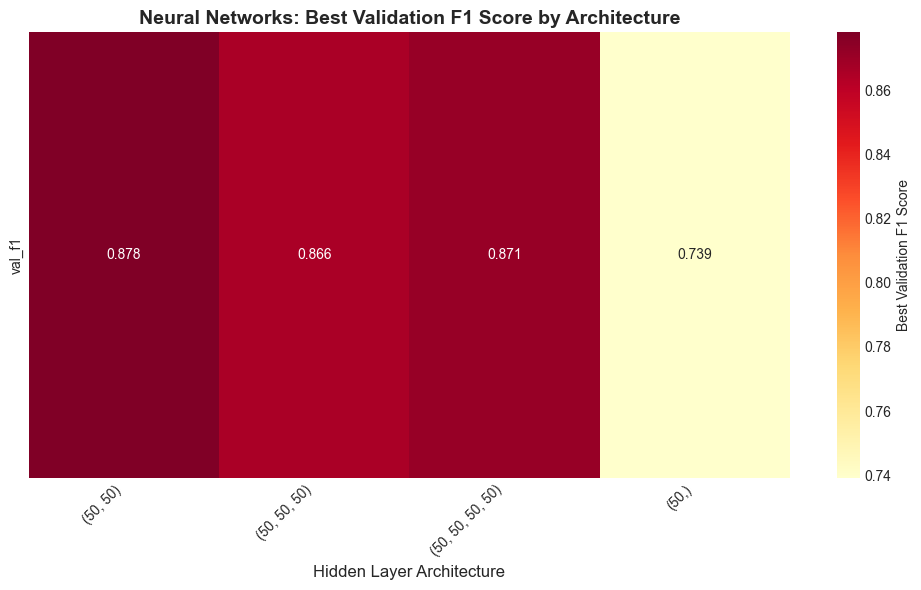

In [253]:
# ============================================================================
# NEURAL NETWORKS: 5. VISUALIZE RESULTS
# ============================================================================

if len(results_df_nn_converged) > 0:
    # Visualize Neural Network Results: Performance by alpha
    # Create separate subplots for each combination of layer size and activation
    n_layers = len(hidden_layer_sizes_options)
    n_activations = len(activation_options)
    total_plots = n_layers * n_activations
    n_cols = 2
    n_rows = (total_plots + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
    fig.suptitle('Neural Networks: Train and Validation F1 Score by Alpha (L2 Regularization)', fontsize=16, fontweight='bold', y=1.02)
    
    # Flatten axes array if needed
    if total_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    # Plot for each combination of layer size and activation
    plot_idx = 0
    for hidden_layer_sizes in hidden_layer_sizes_options:
        for activation in activation_options:
            ax = axes[plot_idx]
            
            results = results_df_nn_converged[(results_df_nn_converged['hidden_layer_sizes'] == str(hidden_layer_sizes)) &
                                             (results_df_nn_converged['activation'] == activation)].sort_values('alpha')
            if len(results) > 0:
                # Plot train F1 score
                ax.plot(np.log10(results['alpha']), results['train_f1'], 
                       marker='o', linestyle='--', label='Train', 
                       linewidth=2, markersize=6, color='green', alpha=0.8)
                
                # Plot validation F1 score
                ax.plot(np.log10(results['alpha']), results['val_f1'], 
                       marker='s', linestyle='-', label='Validation', 
                       linewidth=2, markersize=6, color='purple', alpha=0.8)
            
            # Format the layer size string for title
            layer_str = str(hidden_layer_sizes) if isinstance(hidden_layer_sizes, tuple) else f'({hidden_layer_sizes},)'
            ax.set_xlabel('log10(alpha)', fontsize=12)
            ax.set_ylabel('F1 Score', fontsize=12)
            ax.set_title(f'Hidden Layer: {layer_str}, Activation: {activation.upper()}', fontsize=14, fontweight='bold')
            ax.legend(fontsize=10, loc='best')
            ax.grid(True, alpha=0.3)
            ax.set_ylim([0, 1.0])
            
            plot_idx += 1
    
    # Hide unused subplots
    for idx in range(total_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap: Best performance by architecture
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    pivot_nn = results_df_nn_converged.groupby('hidden_layer_sizes')['val_f1'].max().reset_index()
    pivot_nn = pivot_nn.set_index('hidden_layer_sizes')
    sns.heatmap(pivot_nn.T, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Best Validation F1 Score'})
    ax.set_title('Neural Networks: Best Validation F1 Score by Architecture', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hidden Layer Architecture', fontsize=12)
    ax.set_ylabel('')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No converged models to visualize.")


In [254]:
# ============================================================================
# NEURAL NETWORKS: 6. RETRAIN THE BEST NEURAL NETWORK MODEL
# ============================================================================

if overall_best_nn is not None:
    # 6.1 Take the best configuration
    best_hidden_layer_sizes_nn = eval(overall_best_nn['hidden_layer_sizes'])  # Convert string back to tuple
    best_activation_nn = overall_best_nn['activation']
    best_alpha_nn = overall_best_nn['alpha']
    
    print("=" * 70)
    print("Retraining Best Neural Network Model")
    print("=" * 70)
    print(f"Best architecture: {best_hidden_layer_sizes_nn}")
    print(f"Best activation: {best_activation_nn}")
    print(f"Best alpha: {best_alpha_nn:.4f}")
    print("=" * 70)
    
    # 6.2 Combine training + validation sets and re-apply preprocessing
    print("\nCombining training + validation sets (raw data)...")
    X_train_val_raw = pd.concat([X_train, X_val], axis=0).reset_index(drop=True)
    y_train_val = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)
    
    print(f"Combined raw set shape: {X_train_val_raw.shape}")
    
    # Re-apply preprocessing
    print("Re-applying preprocessing pipeline...")
    X_train_val_preprocessed = preprocessor.transform(X_train_val_raw)
    print(f"Preprocessed combined set shape: {X_train_val_preprocessed.shape}")
    
    # Re-preprocess test set
    print("Re-preprocessing test set to ensure consistency...")
    X_test_preprocessed_final = preprocessor.transform(X_test)
    print(f"Preprocessed test set shape: {X_test_preprocessed_final.shape}")
    
    # 6.3 Create and train model with best hyperparameters (using preprocessed data directly)
    print(f"\nTraining Neural Network with architecture={best_hidden_layer_sizes_nn}, activation={best_activation_nn}, alpha={best_alpha_nn:.4f}...")
    final_model_nn = MLPClassifier(
        hidden_layer_sizes=best_hidden_layer_sizes_nn,
        activation=best_activation_nn,
        alpha=best_alpha_nn,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    
    train_start = time.time()
    final_model_nn.fit(X_train_val_preprocessed, y_train_val)
    train_time = time.time() - train_start
    
    print(f"Training completed in {train_time:.2f} seconds")
    print("=" * 70)
else:
    print("Cannot retrain: No converged models found.")
    final_model_nn = None


Retraining Best Neural Network Model
Best architecture: (50, 50)
Best activation: tanh
Best alpha: 1.0000

Combining training + validation sets (raw data)...
Combined raw set shape: (550, 11)
Re-applying preprocessing pipeline...
Preprocessed combined set shape: (550, 15)
Re-preprocessing test set to ensure consistency...
Preprocessed test set shape: (368, 15)

Training Neural Network with architecture=(50, 50), activation=tanh, alpha=1.0000...
Training completed in 0.08 seconds


Evaluating Final Neural Network Model on Test Set

Test Set Performance:
  Accuracy:  0.7962
  Precision: 0.8177
  Recall:    0.8137
  F1 Score:  0.8157
  AUC:       0.8754


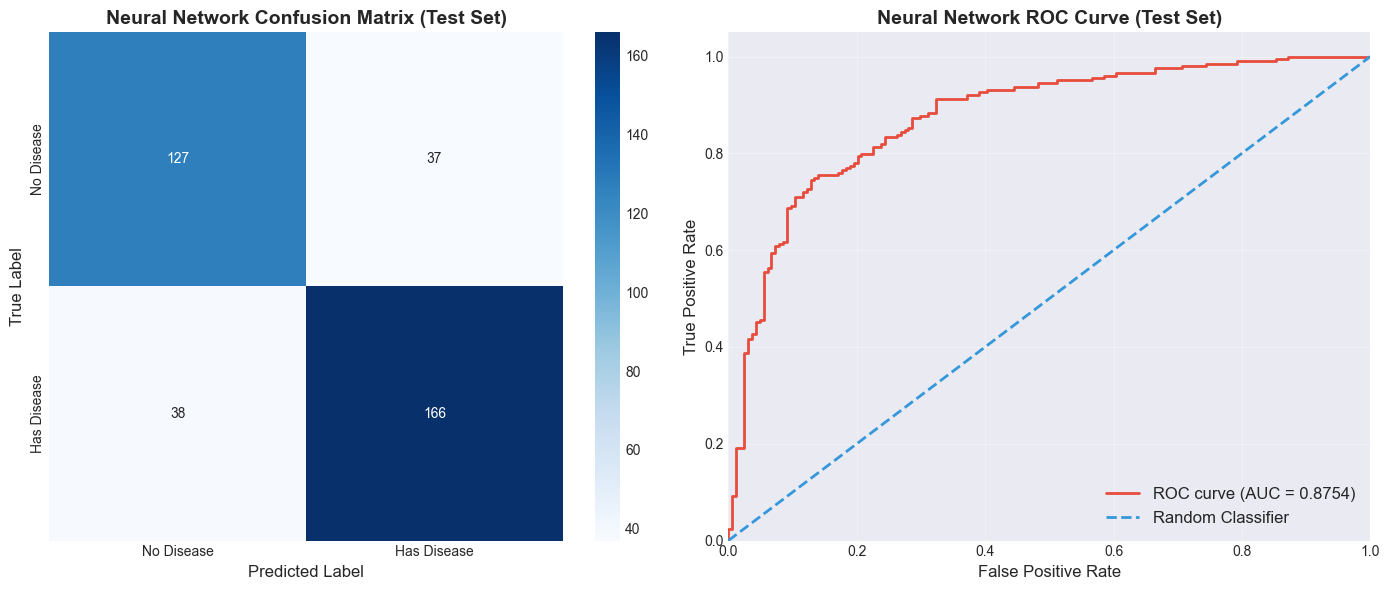


Neural Network Generalization Analysis
Best Validation F1: 0.8780
Test F1:            0.8157
Difference:         -0.0623
Status: GOOD - Model generalizes reasonably well


In [255]:
# ============================================================================
# NEURAL NETWORKS: 7. EVALUATE ON THE TEST SET AND SUMMARIZE
# ============================================================================

if final_model_nn is not None:
    print("=" * 70)
    print("Evaluating Final Neural Network Model on Test Set")
    print("=" * 70)
    
    y_test_pred_nn = final_model_nn.predict(X_test_preprocessed_final)
    y_test_proba_nn = final_model_nn.predict_proba(X_test_preprocessed_final)[:, 1]
    
    # Compute test metrics
    test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
    test_precision_nn = precision_score(y_test, y_test_pred_nn)
    test_recall_nn = recall_score(y_test, y_test_pred_nn)
    test_f1_nn = f1_score(y_test, y_test_pred_nn)
    test_auc_nn = roc_auc_score(y_test, y_test_proba_nn)
    
    print(f"\nTest Set Performance:")
    print(f"  Accuracy:  {test_accuracy_nn:.4f}")
    print(f"  Precision: {test_precision_nn:.4f}")
    print(f"  Recall:    {test_recall_nn:.4f}")
    print(f"  F1 Score:  {test_f1_nn:.4f}")
    print(f"  AUC:       {test_auc_nn:.4f}")
    
    # Plot confusion matrix and ROC curve
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Confusion Matrix
    cm_nn = confusion_matrix(y_test, y_test_pred_nn)
    sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['No Disease', 'Has Disease'],
                yticklabels=['No Disease', 'Has Disease'])
    axes[0].set_title('Neural Network Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('True Label', fontsize=12)
    axes[0].set_xlabel('Predicted Label', fontsize=12)
    
    # ROC Curve
    fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_proba_nn)
    roc_auc_nn = auc(fpr_nn, tpr_nn)
    axes[1].plot(fpr_nn, tpr_nn, color='#e74c3c', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
    axes[1].plot([0, 1], [0, 1], color='#3498db', lw=2, linestyle='--', label='Random Classifier')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate', fontsize=12)
    axes[1].set_ylabel('True Positive Rate', fontsize=12)
    axes[1].set_title('Neural Network ROC Curve (Test Set)', fontsize=14, fontweight='bold')
    axes[1].legend(loc="lower right", fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compare test F1 with best validation F1
    val_f1_best_nn = overall_best_nn['val_f1']
    f1_diff_nn = test_f1_nn - val_f1_best_nn
    
    print("\n" + "=" * 70)
    print("Neural Network Generalization Analysis")
    print("=" * 70)
    print(f"Best Validation F1: {val_f1_best_nn:.4f}")
    print(f"Test F1:            {test_f1_nn:.4f}")
    print(f"Difference:         {f1_diff_nn:+.4f}")
    
    if abs(f1_diff_nn) < 0.05:
        gen_status_nn = "EXCELLENT - Model generalizes very well"
    elif abs(f1_diff_nn) < 0.1:
        gen_status_nn = "GOOD - Model generalizes reasonably well"
    elif f1_diff_nn < -0.1:
        gen_status_nn = "OVERFITTING - Test performance worse than validation"
    else:
        gen_status_nn = "UNDERFITTING or data variance - Test better than validation"
    
    print(f"Status: {gen_status_nn}")
    print("=" * 70)
else:
    print("Cannot evaluate: No trained model available.")


In [256]:
# ============================================================================
# NEURAL NETWORKS: 8. SUMMARIZE FINDINGS
# ============================================================================

if overall_best_nn is not None:
    print("\n" + "=" * 70)
    print("NEURAL NETWORK SUMMARY")
    print("=" * 70)
    
    print("\n1. BEST CONFIGURATION:")
    print(f"   - Architecture: {best_hidden_layer_sizes_nn}")
    print(f"   - Activation: {best_activation_nn}")
    print(f"   - Alpha (L2 regularization): {best_alpha_nn:.4f}")
    print(f"   - Validation F1 Score: {val_f1_best_nn:.4f}")
    print(f"   - Test F1 Score: {test_f1_nn:.4f}")
    
    print("\n2. HYPERPARAMETER EFFECTS:")
    print("   Analysis of how architecture, activation, and alpha affect performance:")
    print("   - Architecture changes (number of layers/neurons) affect model capacity")
    print("   - Activation functions (ReLU vs Tanh) can have different effects")
    print("   - L2 regularization (alpha) helps prevent overfitting")
    
    print("\n3. GENERALIZATION:")
    print(f"   - Validation F1: {val_f1_best_nn:.4f}")
    print(f"   - Test F1: {test_f1_nn:.4f}")
    print(f"   - Difference: {f1_diff_nn:+.4f}")
    if abs(f1_diff_nn) < 0.05:
        print("   - The model generalizes EXCELLENTLY from validation to test set.")
    elif f1_diff_nn < -0.1:
        print("   - The model shows signs of OVERFITTING.")
    else:
        print("   - The model generalizes REASONABLY WELL.")
    
    print("\n4. KEY INSIGHTS:")
    print("   - Architecture changes (number of layers/filters) are transformations, not just hyperparameters")
    print("   - Neural network performance depends on architecture complexity")
    print("   - Activation functions (ReLU vs Tanh) can have different effects")
    print("   - L2 regularization (alpha) helps prevent overfitting")
    print("   - The best configuration was identified through systematic evaluation")
    print(f"     of {len(results_df_nn_converged)} converged configurations.")
    
    print("=" * 70)
else:
    print("\n" + "=" * 70)
    print("NEURAL NETWORK SUMMARY")
    print("=" * 70)
    print("\nWARNING: No models converged successfully.")
    print("Consider adjusting hyperparameters or increasing max_iter.")
    print("=" * 70)



NEURAL NETWORK SUMMARY

1. BEST CONFIGURATION:
   - Architecture: (50, 50)
   - Activation: tanh
   - Alpha (L2 regularization): 1.0000
   - Validation F1 Score: 0.8780
   - Test F1 Score: 0.8157

2. HYPERPARAMETER EFFECTS:
   Analysis of how architecture, activation, and alpha affect performance:
   - Architecture changes (number of layers/neurons) affect model capacity
   - Activation functions (ReLU vs Tanh) can have different effects
   - L2 regularization (alpha) helps prevent overfitting

3. GENERALIZATION:
   - Validation F1: 0.8780
   - Test F1: 0.8157
   - Difference: -0.0623
   - The model generalizes REASONABLY WELL.

4. KEY INSIGHTS:
   - Architecture changes (number of layers/filters) are transformations, not just hyperparameters
   - Neural network performance depends on architecture complexity
   - Activation functions (ReLU vs Tanh) can have different effects
   - L2 regularization (alpha) helps prevent overfitting
   - The best configuration was identified through sys

In [257]:
# Step 8: Summarize Findings
print("=" * 70)
print("FINAL SUMMARY AND FINDINGS")
print("=" * 70)

def format_penalty(p):
    return "NONE" if p is None else p.upper()

def format_C(c):
    return "None" if c is None else f"{c:.3f}"

print("\n1. BEST CONFIGURATION:")

pen_str = format_penalty(best_penalty)
print(f"   - Z-space: {best_Z_space}")
print(f"   - Penalty: {pen_str}")
print(f"   - C Value: {format_C(best_C)}")
print(f"   - Solver: {best_solver}")
print(f"   - Number of Features: {overall_best['n_features']}")

print("\n2. PERFORMANCE SUMMARY:")
print(f"   - Validation F1: {overall_best['val_f1']:.4f}")
print(f"   - Test F1:       {test_f1:.4f}")
print(f"   - Test Accuracy: {test_accuracy:.4f}")
print(f"   - Test AUC:      {test_auc:.4f}")

print("\n3. Z-SPACE COMPARISON:")
for Z_name in Z_spaces:
    space_results = results_df[results_df['Z_space'] == Z_name]
    best_space_result = space_results.loc[space_results['val_f1'].idxmax()]
    pen_str_Z = format_penalty(best_space_result['penalty'])
    C_str_Z = format_C(best_space_result['C'])
    print(
        f"   - {Z_name:25s}: Best Val F1 = {best_space_result['val_f1']:.4f} "
        f"({pen_str_Z}, C={C_str_Z})"
    )

print("\n4. TRENDS AND OBSERVATIONS:")
# ----------------------------------------------------------------------
# Penalty comparison (only L1 vs L2; ignore None here)
# ----------------------------------------------------------------------
print("   Penalty Comparison:")
for Z_name in Z_spaces:
    Z_results = results_df[results_df['Z_space'] == Z_name]
    l1_best = Z_results[Z_results['penalty'] == 'l1']['val_f1'].max() if len(Z_results[Z_results['penalty'] == 'l1']) > 0 else None
    l2_best = Z_results[Z_results['penalty'] == 'l2']['val_f1'].max() if len(Z_results[Z_results['penalty'] == 'l2']) > 0 else None
    if l1_best is not None and l2_best is not None:
        if l1_best > l2_best:
            better = f"L1 better by {l1_best - l2_best:.4f}"
        elif l2_best > l1_best:
            better = f"L2 better by {l2_best - l1_best:.4f}"
        else:
            better = "Equal performance"
        print(f"     - {Z_name}: L1 best={l1_best:.4f}, L2 best={l2_best:.4f} ({better})")

# ----------------------------------------------------------------------
# C value trends (skip None penalty – C is meaningless there)
# ----------------------------------------------------------------------
print("\n   C Value Analysis (by penalty):")
for penalty_type in penalties:
    if penalty_type is None:
        print("     NONE Penalty: C is not used (no regularization).")
        continue

    print(f"     {penalty_type.upper()} Penalty:")
    for Z_name in Z_spaces:
        space_results = (
            results_df[(results_df['Z_space'] == Z_name) &
                       (results_df['penalty'] == penalty_type)]
            .dropna(subset=['C'])  # ensure C is numeric
            .sort_values('C')
        )
        if len(space_results) > 0:
            low_c_f1 = space_results.iloc[0]['val_f1']
            high_c_f1 = space_results.iloc[-1]['val_f1']
            low_c_gap = space_results.iloc[0]['train_f1'] - space_results.iloc[0]['val_f1']
            high_c_gap = space_results.iloc[-1]['train_f1'] - space_results.iloc[-1]['val_f1']
            trend = "increased" if high_c_f1 > low_c_f1 else "decreased"
            print(f"       - {Z_name}: F1 {trend} from {low_c_f1:.4f} to {high_c_f1:.4f} as C increased")
            print(f"         (Train-Val gap: {low_c_gap:.4f} at low C, {high_c_gap:.4f} at high C)")

# ----------------------------------------------------------------------
# Z-space trends (polynomial vs original)
# ----------------------------------------------------------------------
print("\n   Z-space Analysis:")
z0_best = results_df[results_df['Z_space'] == 'Z0']['val_f1'].max()
for degree, Z_name in enumerate(['Z1', 'Z2', 'Z3'], start=2):
    poly_best = results_df[results_df['Z_space'] == Z_name]['val_f1'].max()
    diff = poly_best - z0_best
    status = "improved" if diff > 0 else "hurt"
    poly_gap = best_by_Z[Z_name]['train_f1'] - best_by_Z[Z_name]['val_f1']
    z0_gap = best_by_Z['Z0']['train_f1'] - best_by_Z['Z0']['val_f1']
    print(f"     - {Z_name} (Degree {degree}): {status} performance by {abs(diff):.4f} vs Z0")
    print(f"       Overfitting gap: {poly_gap:.4f} (Z0: {z0_gap:.4f})")

# ----------------------------------------------------------------------
# Generalization analysis
# ----------------------------------------------------------------------
print("\n5. GENERALIZATION ANALYSIS:")
val_f1_best = overall_best['val_f1']
f1_diff = test_f1 - val_f1_best
if abs(f1_diff) < 0.05:
    gen_status = "EXCELLENT - Model generalizes very well"
elif abs(f1_diff) < 0.1:
    gen_status = "GOOD - Model generalizes reasonably well"
else:
    gen_status = "NEEDS IMPROVEMENT - Model may be overfitting or underfitting"

print(f"   - Generalization: {gen_status}")
print(f"   - Validation F1: {val_f1_best:.4f}")
print(f"   - Test F1:       {test_f1:.4f}")
print(f"   - F1 Difference (Test - Val): {f1_diff:+.4f}")
if f1_diff > 0:
    print("   - Test performance is BETTER than validation (good generalization)")
else:
    print("   - Test performance is WORSE than validation (possible overfitting)")

print("\n6. KEY INSIGHTS:")
print("   - The best configuration was identified through systematic evaluation")
print(f"     of {len(results_df)} different combinations across Z-spaces,")
print("     penalties (including a no-penalty case), and C values.")
print("   - Both L1 and L2 regularization were evaluated, allowing comparison")
print("     of their effects on model performance and feature selection.")
print("   - Regularization strength (C) plays a crucial role in balancing")
print("     bias and variance, with optimal values varying by Z-space and penalty type.")
print("   - L1 regularization can perform feature selection (sparse solutions),")
print("     while L2 regularization tends to shrink all coefficients uniformly.")
print("   - Polynomial feature transformations can capture non-linear relationships")
print("     but may increase model complexity and risk of overfitting.")
print("   - The final model's performance on the test set validates its")
print("     ability to generalize to unseen data.")

print("=" * 70)


FINAL SUMMARY AND FINDINGS

1. BEST CONFIGURATION:
   - Z-space: Z1
   - Penalty: L1
   - C Value: 0.100
   - Solver: liblinear
   - Number of Features: 135

2. PERFORMANCE SUMMARY:
   - Validation F1: 0.8835
   - Test F1:       0.7133
   - Test Accuracy: 0.5543
   - Test AUC:      0.9287

3. Z-SPACE COMPARISON:
   - Z0                       : Best Val F1 = 0.8768 (L1, C=1.000)
   - Z1                       : Best Val F1 = 0.8835 (L1, C=0.100)
   - Z2                       : Best Val F1 = 0.8824 (L2, C=0.010)
   - Z3                       : Best Val F1 = 0.8571 (L2, C=0.001)

4. TRENDS AND OBSERVATIONS:
   Penalty Comparison:
     - Z0: L1 best=0.8768, L2 best=0.8768 (Equal performance)
     - Z1: L1 best=0.8835, L2 best=0.8614 (L1 better by 0.0221)
     - Z2: L1 best=0.8756, L2 best=0.8824 (L2 better by 0.0067)
     - Z3: L1 best=0.8442, L2 best=0.8571 (L2 better by 0.0129)

   C Value Analysis (by penalty):
     L1 Penalty:
       - Z0: F1 increased from 0.0000 to 0.8627 as C increas

In [258]:
# Summary of clustering analysis
print("=" * 70)
print("K-MEANS CLUSTERING ANALYSIS SUMMARY")
print("=" * 70)

print("\n1. OPTIMAL NUMBER OF CLUSTERS:")
print(f"   - Based on Silhouette Score: k={optimal_k}")
print(f"   - Best Silhouette Score: {max(silhouette_scores):.4f}")

print("\n2. CLUSTER ALIGNMENT WITH TARGET VARIABLE:")
print(f"   - K=2 Clusters:")
print(f"     * Adjusted Rand Index: {ari_2:.4f}")
print(f"     * Homogeneity: {homogeneity_2:.4f}")
print(f"     * Completeness: {completeness_2:.4f}")
print(f"   - K={optimal_k} Clusters:")
print(f"     * Adjusted Rand Index: {ari_optimal:.4f}")
print(f"     * Homogeneity: {homogeneity_optimal:.4f}")
print(f"     * Completeness: {completeness_optimal:.4f}")

print("\n3. INTERPRETATION:")
if ari_2 > 0.3:
    print("   - K=2 clusters show MODERATE to STRONG alignment with heart disease classes")
elif ari_2 > 0.1:
    print("   - K=2 clusters show WEAK to MODERATE alignment with heart disease classes")
else:
    print("   - K=2 clusters show POOR alignment with heart disease classes")

print("\n4. KEY FINDINGS:")
print("   - Clustering reveals natural groupings in the data")
if ari_2 > ari_optimal:
    print(f"   - K=2 clusters align better with target classes than k={optimal_k}")
else:
    print(f"   - K={optimal_k} clusters provide better separation than k=2")
    
print("   - Cluster characteristics can help identify risk factors")
print("   - Some clusters may represent distinct patient subgroups")
print("=" * 70)


K-MEANS CLUSTERING ANALYSIS SUMMARY

1. OPTIMAL NUMBER OF CLUSTERS:
   - Based on Silhouette Score: k=2
   - Best Silhouette Score: 0.1850

2. CLUSTER ALIGNMENT WITH TARGET VARIABLE:
   - K=2 Clusters:
     * Adjusted Rand Index: 0.4323
     * Homogeneity: 0.3547
     * Completeness: 0.3519
   - K=2 Clusters:
     * Adjusted Rand Index: 0.4323
     * Homogeneity: 0.3547
     * Completeness: 0.3519

3. INTERPRETATION:
   - K=2 clusters show MODERATE to STRONG alignment with heart disease classes

4. KEY FINDINGS:
   - Clustering reveals natural groupings in the data
   - K=2 clusters provide better separation than k=2
   - Cluster characteristics can help identify risk factors
   - Some clusters may represent distinct patient subgroups
